This notebook produces all figures from de Sá, Rocha et al. (2024) except for 13 and 14 (merger rate curves).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.cm import ScalarMappable
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib.transforms as transforms

from pathlib import Path

from astropy.cosmology import WMAP9 as cosmo

In [2]:
plt.style.use('./plotstyle.mplstyle')
FIGURE_FOLDER = Path('./figures')

In [3]:
cm_cubehelix = sns.cubehelix_palette(as_cmap=True)

In [4]:
# by unutbu at https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Data

In [5]:
mhistplot_jars = Path('.', 'mhistplot_jars')
merger_jar = Path('.', 'merger_jar')

In [7]:
import pickle as pkl
sample_starforming_mass_dict_1222_path = merger_jar/'2222_sample_starforming_mass_dict.pkl'
with open(sample_starforming_mass_dict_1222_path, 'rb') as f:
    sample_sf_mass_dict_1222 = pkl.load(f)

In [8]:
import pickle as pkl
sample_starforming_mass_dict_2122_path = merger_jar/'1122_sample_starforming_mass_dict.pkl'
with open(sample_starforming_mass_dict_2122_path, 'rb') as f:
    sample_sf_mass_dict_2122 = pkl.load(f)

In [9]:
igimf_bhbh_df = pd.read_hdf(mhistplot_jars/'1222_bhbh.h5')
igimf_bhns_df = pd.read_hdf(mhistplot_jars/'1222_bhns.h5')
igimf_nsbh_df = pd.read_hdf(mhistplot_jars/'1222_nsbh.h5')
igimf_nsns_df = pd.read_hdf(mhistplot_jars/'1222_nsns.h5')

canon_bhbh_df = pd.read_hdf(mhistplot_jars/'2122_bhbh.h5')
canon_bhns_df = pd.read_hdf(mhistplot_jars/'2122_bhns.h5')
canon_nsbh_df = pd.read_hdf(mhistplot_jars/'2122_nsbh.h5')
canon_nsns_df = pd.read_hdf(mhistplot_jars/'2122_nsns.h5')

In [10]:
igimf_bhbh_df['q'] = igimf_bhbh_df['mco2']/igimf_bhbh_df['mco1']
igimf_bhns_df['q'] = igimf_bhns_df['mco2']/igimf_bhns_df['mco1']
igimf_nsbh_df['q'] = igimf_nsbh_df['mco2']/igimf_nsbh_df['mco1']
igimf_nsns_df['q'] = igimf_nsns_df['mco2']/igimf_nsns_df['mco1']

canon_bhbh_df['q'] = canon_bhbh_df['mco2']/canon_bhbh_df['mco1']
canon_bhns_df['q'] = canon_bhns_df['mco2']/canon_bhns_df['mco1']
canon_nsbh_df['q'] = canon_nsbh_df['mco2']/canon_nsbh_df['mco1']
canon_nsns_df['q'] = canon_nsns_df['mco2']/canon_nsns_df['mco1']

In [11]:
samplesize_1222 = len(igimf_bhbh_df) + len(igimf_bhns_df) + len(igimf_nsbh_df) + len(igimf_nsns_df)
print(f'In the 2222 (igimf, Varying) model, there are {len(igimf_bhbh_df)} BHBHs, {len(igimf_bhns_df)} BHNSs, {len(igimf_nsbh_df)} NSBHs and {len(igimf_nsns_df)} NSNSs')
print(f'The 2222 (igimf, Varying) model is composed of {len(igimf_bhbh_df)/samplesize_1222*100:.2f}% BHBHs, {len(igimf_bhns_df)/samplesize_1222*100:.2f}% BHNSs, {len(igimf_nsbh_df)/samplesize_1222*100:.2f}% NSBHs and {len(igimf_nsns_df)/samplesize_1222*100:.2f}% NSNSs')

In the 2222 (igimf, Varying) model, there are 190265 BHBHs, 48258 BHNSs, 515 NSBHs and 3331 NSNSs
The 2222 (igimf, Varying) model is composed of 78.50% BHBHs, 19.91% BHNSs, 0.21% NSBHs and 1.37% NSNSs


In [12]:
samplesize_1222 = len(canon_bhbh_df) + len(canon_bhns_df) + len(canon_nsbh_df) + len(canon_nsns_df)
print(f'In the 1122 (canon, Canonical) model, there are {len(canon_bhbh_df)} BHBHs, {len(canon_bhns_df)} BHNSs, {len(canon_nsbh_df)} NSBHs and {len(canon_nsns_df)} NSNSs')
print(f'The 1122 (canon, Canonical) model is composed of {len(canon_bhbh_df)/samplesize_1222*100:.2f}% BHBHs, {len(canon_bhns_df)/samplesize_1222*100:.2f}% BHNSs, {len(canon_nsbh_df)/samplesize_1222*100:.2f}% NSBHs and {len(canon_nsns_df)/samplesize_1222*100:.2f}% NSNSs')

In the 1122 (canon, Canonical) model, there are 11982 BHBHs, 2171 BHNSs, 135 NSBHs and 1769 NSNSs
The 1122 (canon, Canonical) model is composed of 74.62% BHBHs, 13.52% BHNSs, 0.84% NSBHs and 11.02% NSNSs


<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_49304/3226136445.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$z_\mathrm{ZAMS}$')


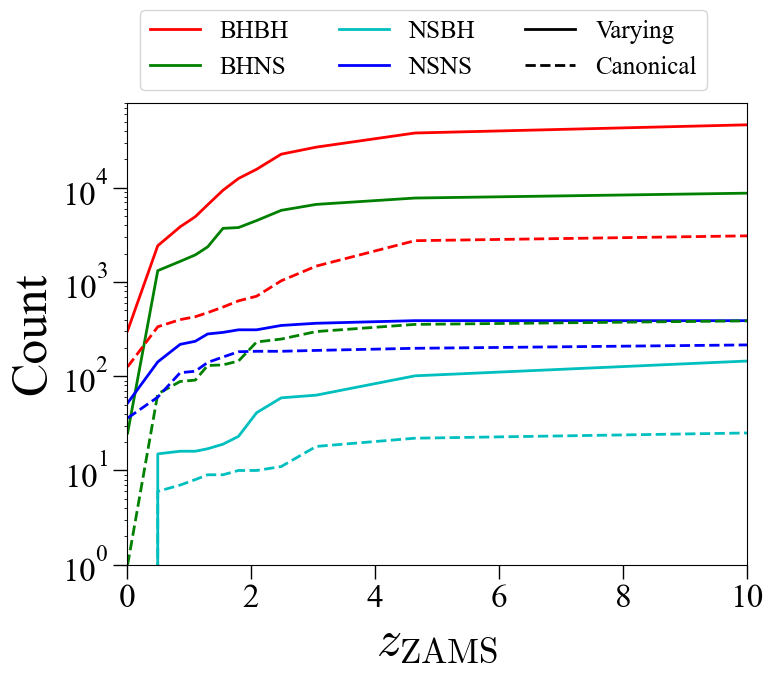

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

igimf_zzams = np.sort(igimf_bhbh_df.Redshift_ZAMS.unique())
canon_zzams = np.sort(canon_bhbh_df.Redshift_ZAMS.unique())

zzams_arr = igimf_zzams
df = igimf_bhbh_df
igimf_bhbh_counts = np.sort([len(df[df.Redshift_ZAMS == zzams]) for zzams in zzams_arr])
df = igimf_bhns_df
igimf_bhns_counts = np.sort([len(df[df.Redshift_ZAMS == zzams]) for zzams in zzams_arr])
df = igimf_nsbh_df
igimf_nsbh_counts = np.sort([len(df[df.Redshift_ZAMS == zzams]) for zzams in zzams_arr])
df = igimf_nsns_df
igimf_nsns_counts = np.sort([len(df[df.Redshift_ZAMS == zzams]) for zzams in zzams_arr])

zzams_arr = canon_zzams
df = canon_bhbh_df
canon_bhbh_counts = np.sort([len(df[df.Redshift_ZAMS == zzams]) for zzams in zzams_arr])
df = canon_bhns_df
canon_bhns_counts = np.sort([len(df[df.Redshift_ZAMS == zzams]) for zzams in zzams_arr])
df = canon_nsbh_df
canon_nsbh_counts = np.sort([len(df[df.Redshift_ZAMS == zzams]) for zzams in zzams_arr])
df = canon_nsns_df
canon_nsns_counts = np.sort([len(df[df.Redshift_ZAMS == zzams]) for zzams in zzams_arr])

ax.plot(igimf_zzams, igimf_bhbh_counts, 'r-')
ax.plot(igimf_zzams, igimf_bhns_counts, 'g-')
ax.plot(igimf_zzams, igimf_nsbh_counts, 'c-')
ax.plot(igimf_zzams, igimf_nsns_counts, 'b-')

ax.plot(canon_zzams, canon_bhbh_counts, 'r--')
ax.plot(canon_zzams, canon_bhns_counts, 'g--')
ax.plot(canon_zzams, canon_nsbh_counts, 'c--')
ax.plot(canon_zzams, canon_nsns_counts, 'b--')

ax.set_ylabel('Count')
ax.set_ylim(1, 8e4)
ax.set_yscale('log')

ax.set_xlabel('$z_\mathrm{ZAMS}$')
ax.set_xlim(0, 10)


handles = []
handles.append(Line2D([11], [1], linestyle='-', color='r', label='BHBH'))
handles.append(Line2D([11], [1], linestyle='-', color='g', label='BHNS'))
handles.append(Line2D([11], [1], linestyle='-', color='c', label='NSBH'))
handles.append(Line2D([11], [1], linestyle='-', color='b', label='NSNS'))
handles.append(Line2D([11], [1], linestyle='-', color='k', label='Varying'))
handles.append(Line2D([11], [1], linestyle='--', color='k', label='Canonical'))

ax.legend(handles=handles, ncol=3, loc='lower left', bbox_to_anchor=(0,1), fontsize=18)

In [14]:
# The below limits for zmerger bins are defined so that each bin contains three zzams
# and starts at the highest one.
zmerger_lims = [0, 0.86, 1.55, 2.49, 10]

In [15]:
def set_zmerger_bins(df):
    zmerger_bins = []
    for row in df.iterrows():
        range_no = np.searchsorted(zmerger_lims, row[1].Redshift_Merger, side='left')-1
        zmerger_bins.append(range_no)
    df['zmerger_bin'] = zmerger_bins
    df.zmerger_bin = df.zmerger_bin.astype('category')
    return df

In [16]:
df = igimf_bhbh_df
df = set_zmerger_bins(df)

df = igimf_bhns_df
df = set_zmerger_bins(df)

df = igimf_nsbh_df
df = set_zmerger_bins(df)

df = igimf_nsns_df
df = set_zmerger_bins(df)

df = canon_bhbh_df
df = set_zmerger_bins(df)

df = canon_bhns_df
df = set_zmerger_bins(df)

df = canon_nsbh_df
df = set_zmerger_bins(df)

df = canon_nsns_df
df = set_zmerger_bins(df)

In [17]:
rename_dict = {
    'Mass_PostSN1' : 'm_psn1',
    'Mass_PostSN2' : 'm_psn2',
    'Mass_ZAMS1_Found' : 'mzams1', 
    'Mass_ZAMS2_Found' : 'mzams2', 
    'LogOrbitalPeriod_ZAMS': 'logp_zams', 
    'Eccentricity_ZAMS': 'e_zams'
}

In [18]:
igimf_bhbh_df.rename(columns=rename_dict, inplace=True)
igimf_bhns_df.rename(columns=rename_dict, inplace=True)
igimf_nsbh_df.rename(columns=rename_dict, inplace=True)
igimf_nsns_df.rename(columns=rename_dict, inplace=True)

canon_bhbh_df.rename(columns=rename_dict, inplace=True)
canon_bhns_df.rename(columns=rename_dict, inplace=True)
canon_nsbh_df.rename(columns=rename_dict, inplace=True)
canon_nsns_df.rename(columns=rename_dict, inplace=True)

In [19]:
df = igimf_bhbh_df
df['qzams'] = df.mzams2/df.mzams1
df['logtc'] = np.log10(df.Coalescence_Time)

df = igimf_bhns_df
df['qzams'] = df.mzams2/df.mzams1
df['logtc'] = np.log10(df.Coalescence_Time)

df = igimf_nsbh_df
df['qzams'] = df.mzams2/df.mzams1
df['logtc'] = np.log10(df.Coalescence_Time)

df = igimf_nsns_df
df['qzams'] = df.mzams2/df.mzams1
df['logtc'] = np.log10(df.Coalescence_Time)


df = canon_bhbh_df
df['qzams'] = df.mzams2/df.mzams1
df['logtc'] = np.log10(df.Coalescence_Time)

df = canon_bhns_df
df['qzams'] = df.mzams2/df.mzams1
df['logtc'] = np.log10(df.Coalescence_Time)

df = canon_nsbh_df
df['qzams'] = df.mzams2/df.mzams1
df['logtc'] = np.log10(df.Coalescence_Time)

df = canon_nsns_df
df['qzams'] = df.mzams2/df.mzams1
df['logtc'] = np.log10(df.Coalescence_Time)

In [20]:
igimf_bhbh_count_dict = pkl.load(open(merger_jar/'2222_bhbh_count_dict.pkl', 'rb'))
igimf_bhns_count_dict = pkl.load(open(merger_jar/'2222_bhns_count_dict.pkl', 'rb'))
igimf_nsns_count_dict = pkl.load(open(merger_jar/'2222_nsns_count_dict.pkl', 'rb'))

canon_bhbh_count_dict = pkl.load(open(merger_jar/'1122_bhbh_count_dict.pkl', 'rb'))
canon_bhns_count_dict = pkl.load(open(merger_jar/'1122_bhns_count_dict.pkl', 'rb'))
canon_nsns_count_dict = pkl.load(open(merger_jar/'1122_nsns_count_dict.pkl', 'rb'))

In [21]:
def get_formation_efficiency_dict(count_dict, sample_sf_mass_dict):
    eta_dict = {}
    for z64 in count_dict:
        z32 = np.float32(z64)
        z_mass_dict = sample_sf_mass_dict[z32]
        z_count_dict = count_dict[z64]
        if z32 not in eta_dict.keys():
            eta_dict[z32] = {}
        for feh64 in z_count_dict:
            feh32 = np.float32(feh64)
            sfmass = z_mass_dict[feh32]
            count = z_count_dict[feh64][0]
            eta_dict[z32][feh32] = count/sfmass
    return eta_dict

In [22]:
def get_redshift_formation_efficiency_dict(count_dict, sample_sf_mass_dict):
    eta_dict = {}
    for z64 in count_dict:
        sfmass = 0
        count = 0
        z32 = np.float32(z64)
        z_mass_dict = sample_sf_mass_dict[z32]
        z_count_dict = count_dict[z64]
        for feh64 in z_count_dict:
            feh32 = np.float32(feh64)
            sfmass += z_mass_dict[feh32]
            count += z_count_dict[feh64][0]
        eta_dict[z32] = count/sfmass
    return eta_dict

In [23]:
igimf_bhbh_eta_dict = get_formation_efficiency_dict(igimf_bhbh_count_dict, sample_sf_mass_dict_1222)
igimf_bhns_eta_dict = get_formation_efficiency_dict(igimf_bhns_count_dict, sample_sf_mass_dict_1222)
igimf_nsns_eta_dict = get_formation_efficiency_dict(igimf_nsns_count_dict, sample_sf_mass_dict_1222)

canon_bhbh_eta_dict = get_formation_efficiency_dict(canon_bhbh_count_dict, sample_sf_mass_dict_2122)
canon_bhns_eta_dict = get_formation_efficiency_dict(canon_bhns_count_dict, sample_sf_mass_dict_2122)
canon_nsns_eta_dict = get_formation_efficiency_dict(canon_nsns_count_dict, sample_sf_mass_dict_2122)

In [24]:
igimf_bhbh_z_eta_dict = get_redshift_formation_efficiency_dict(igimf_bhbh_count_dict, sample_sf_mass_dict_1222)
igimf_bhns_z_eta_dict = get_redshift_formation_efficiency_dict(igimf_bhns_count_dict, sample_sf_mass_dict_1222)
igimf_nsns_z_eta_dict = get_redshift_formation_efficiency_dict(igimf_nsns_count_dict, sample_sf_mass_dict_1222)

canon_bhbh_z_eta_dict = get_redshift_formation_efficiency_dict(canon_bhbh_count_dict, sample_sf_mass_dict_2122)
canon_bhns_z_eta_dict = get_redshift_formation_efficiency_dict(canon_bhns_count_dict, sample_sf_mass_dict_2122)
canon_nsns_z_eta_dict = get_redshift_formation_efficiency_dict(canon_nsns_count_dict, sample_sf_mass_dict_2122)

In [25]:
igimf_zzams_4list = np.sort(np.unique(igimf_bhbh_df.Redshift_ZAMS))[[1, 7, 10, 11]]
canon_zzams_4list = np.sort(np.unique(canon_bhbh_df.Redshift_ZAMS))[[1, 7, 10, 11]]

In [26]:
for z in np.sort(igimf_bhbh_df.Redshift_ZAMS.unique()):
    print(z, np.sort(igimf_bhbh_df[igimf_bhbh_df.Redshift_ZAMS == z].FeH.unique()), len(igimf_bhbh_df[igimf_bhbh_df.Redshift_ZAMS == z].FeH.unique()))

0.009999999776482582 [-1.755  0.014  0.19   0.323  0.358  0.407  0.426  0.447] 8
0.4959999918937683 [-1.815 -0.168  0.059  0.174  0.248  0.301  0.342  0.377  0.408  0.444] 10
0.8569999933242798 [-1.899 -0.28  -0.035  0.094  0.179  0.242  0.293  0.336  0.376  0.423] 10
1.1009999513626099 [-1.974 -0.356 -0.102  0.035  0.127  0.196  0.251  0.299  0.345  0.398] 10
1.2999999523162842 [-2.044 -0.423 -0.161 -0.018  0.079  0.152  0.212  0.264  0.314  0.372] 10
1.5479999780654907 [-2.14  -0.522 -0.246 -0.093  0.011  0.09   0.155  0.212  0.266  0.331] 10
1.7979999780654907 [-2.245 -0.649 -0.35  -0.184 -0.071  0.016  0.086  0.149  0.208  0.279] 10
2.0899999141693115 [-2.374 -0.852 -0.51  -0.32  -0.19  -0.092 -0.012  0.058  0.125  0.203] 10
2.486999988555908 [-2.548 -1.128 -0.822 -0.577 -0.411 -0.287 -0.187 -0.101 -0.022  0.068] 10
3.052000045776367 [-2.76  -1.461 -1.209 -1.044 -0.851 -0.671 -0.528 -0.41  -0.304 -0.195] 10
4.644000053405762 [-3.166 -1.955 -1.722 -1.587 -1.489 -1.398 -1.311 -1.228 

In [27]:
df = igimf_bhbh_df
df['feh_dev'] = np.abs((df.FeH-df.CompasFeH.astype('float'))/df.FeH)
df = igimf_bhns_df
df['feh_dev'] = np.abs((df.FeH-df.CompasFeH.astype('float'))/df.FeH)
df = igimf_nsbh_df
df['feh_dev'] = np.abs((df.FeH-df.CompasFeH.astype('float'))/df.FeH)
df = igimf_nsns_df
df['feh_dev'] = np.abs((df.FeH-df.CompasFeH.astype('float'))/df.FeH)

df = canon_bhbh_df
df['feh_dev'] = np.abs((df.FeH-df.CompasFeH.astype('float'))/df.FeH)
df = canon_bhns_df
df['feh_dev'] = np.abs((df.FeH-df.CompasFeH.astype('float'))/df.FeH)
df = canon_nsbh_df
df['feh_dev'] = np.abs((df.FeH-df.CompasFeH.astype('float'))/df.FeH)
df = canon_nsns_df
df['feh_dev'] = np.abs((df.FeH-df.CompasFeH.astype('float'))/df.FeH)

In [28]:
igimf_bhbh_df.feh_dev.describe()

count    1.902650e+05
mean     1.445458e-02
std      3.668083e-02
min      3.455342e-09
25%      7.627685e-04
50%      1.669487e-03
75%      9.901025e-03
max      2.857143e-01
Name: feh_dev, dtype: float64

In [29]:
feh_dev = []
feh_dev.append(igimf_bhbh_df.feh_dev.to_numpy())
feh_dev.append(igimf_bhns_df.feh_dev.to_numpy())
feh_dev.append(igimf_nsbh_df.feh_dev.to_numpy())
feh_dev.append(igimf_nsns_df.feh_dev.to_numpy())
feh_dev.append(canon_bhbh_df.feh_dev.to_numpy())
feh_dev.append(canon_bhns_df.feh_dev.to_numpy())
feh_dev.append(canon_nsbh_df.feh_dev.to_numpy())
feh_dev.append(canon_nsns_df.feh_dev.to_numpy())
feh_dev = np.concatenate(feh_dev)

In [30]:
feh_dev.mean(), feh_dev.std()

(0.014759473183810988, 0.03585289821751673)

# Formation efficiency over redshift and metallicity

In [31]:
def eta_plot(ax, dict_, ls):
    plot_redshifts = list(dict_.keys())
    i = 0
    for redshift in dict_:
        color = cmap((redshift-min(plot_redshifts))/(max(plot_redshifts)-min(plot_redshifts)))
        color = cmap(i/len(plot_redshifts))
        i += 1
        redshift_dict = dict_[redshift]
        fehs = list(redshift_dict.keys())
        etas = []
        for feh in fehs:
            etas.append(dict_[redshift][feh])
        ax.plot(fehs, etas, ls=ls, c=color, lw=2)

In [32]:
def eta_plot2(ax, dict_, m):
    plot_redshifts = list(dict_.keys())
    i = 0
    for redshift in dict_:
        color = cmap((redshift-min(plot_redshifts))/(max(plot_redshifts)-min(plot_redshifts)))
        color = cmap(i/len(plot_redshifts))
        i += 1
        redshift_dict = dict_[redshift]
        fehs = list(redshift_dict.keys())
        etas = []
        for feh in fehs:
            etas.append(dict_[redshift][feh])
        ax.plot(fehs, etas, marker=m, ls='', c=color, lw=2)

In [33]:
def redshift_eta_plot(ax, dict_, ls, color, marker):
    plot_redshifts = sorted(list(dict_.keys()))
    etas = []
    for redshift in plot_redshifts:
        eta = dict_[redshift]
        etas.append(eta)
    ax.plot(plot_redshifts, etas, ls=ls, c=color, lw=3, marker=marker, markersize=10)

Figure 1 of the paper.

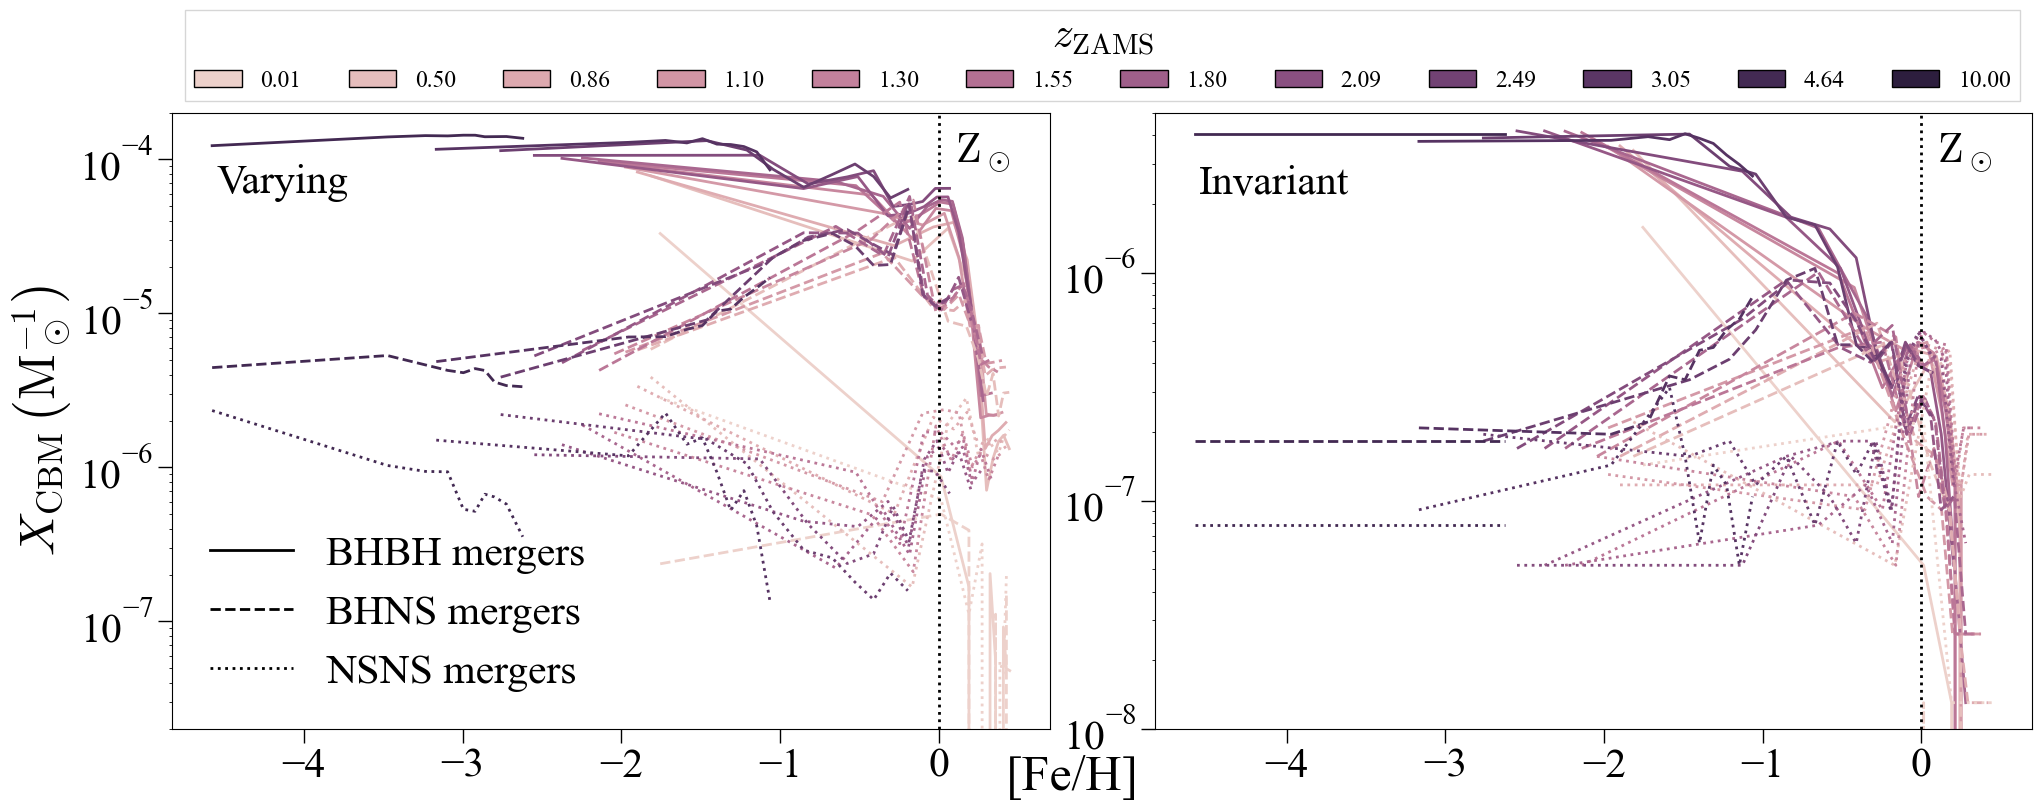

In [34]:
fig, [ax_1222, ax_2122] = plt.subplots(1,2, figsize=(24, 8), sharey=False)
cmap = cm_cubehelix
fig.subplots_adjust(hspace=0.05, wspace=0.12)
rect = fig.patch
rect.set_facecolor('white')

### IGIMF ###
ax = ax_1222

# BHBH
dict_ = igimf_bhbh_eta_dict
ls = '-'
eta_plot(ax=ax, dict_=dict_, ls=ls)
    
# BHNS
dict_ = igimf_bhns_eta_dict
ls = '--'
eta_plot(ax=ax, dict_=dict_, ls=ls)
    
# NSNS
dict_ = igimf_nsns_eta_dict
ls = ':'
eta_plot(ax=ax, dict_=dict_, ls=ls)
    
ax_1222.set_ylabel(r'$X_\mathrm{CBM}\,\left(\mathrm{M}_\odot^{-1}\right)$', fontsize=36)
ax_1222.set_yscale('log')
ax_1222.set_ylim(2e-8, 2e-4)

###  CANONICAL ###
ax = ax_2122

# BHBH
dict_ = canon_bhbh_eta_dict
ls = '-'
eta_plot(ax=ax, dict_=dict_, ls=ls)
    
# BHNS
dict_ = canon_bhns_eta_dict
ls = '--'
eta_plot(ax=ax, dict_=dict_, ls=ls)
    
# NSNS
dict_ = canon_nsns_eta_dict
ls = ':'
eta_plot(ax=ax, dict_=dict_, ls=ls)
    
ax_2122.set_yscale('log')
ax_2122.set_ylim(1e-8, 5e-6)

### Decoration ###

fig.text(0.5, 0.02, '[Fe/H]', ha='center', va='bottom', fontsize=36)

handles, labels = ax_1222.get_legend_handles_labels()
point1 = Line2D([0], [0], label='BHBH mergers', linestyle='-', color='k', linewidth=2)
point2 = Line2D([0], [0], label='BHNS mergers', linestyle='--', color='k', linewidth=2)
point3 = Line2D([0], [0], label='NSNS mergers', linestyle=':', color='k', linewidth=2)
handles.extend([point1, point2, point3])

ax_1222.legend(handles=handles, frameon=False, loc='lower left', bbox_to_anchor=(0,0))

ax_1222.vlines(0, 2e-8, 2e-4, color='k', linestyle=':')
ax_2122.vlines(0, 1e-8, 2e-4, color='k', linestyle=':')
ax_1222.text(0.1, 0.9, '$\\mathrm{Z}_\\odot$', ha='left', va='bottom', 
             transform=transforms.blended_transform_factory(ax_1222.transData, ax_1222.transAxes))
ax_2122.text(0.1, 0.9, '$\\mathrm{Z}_\\odot$', ha='left', va='bottom',
             transform=transforms.blended_transform_factory(ax_2122.transData, ax_2122.transAxes))

hue_order = sorted(np.unique(igimf_bhbh_df.Redshift_ZAMS))
palette = cm_cubehelix(np.linspace(0, 1, len(hue_order)))
handles = []
for zzams, color in zip(hue_order, palette):
    handle = Patch(facecolor=color, edgecolor='k', fill=True, label=f'{zzams:.2f}')
    handles.append(handle)
ax_2122.legend(handles=handles,
                    title='$z_\\mathrm{ZAMS}$',
                    loc='lower right',
                    bbox_to_anchor=(1,1),
                    frameon=True,
                    fancybox=False,
                    ncol=12,
                    fontsize=17)

ax_1222.tick_params(labelsize=30)
ax_2122.tick_params(labelsize=30)

ax_1222.text(0.05, 0.87, 'Varying', transform=ax_1222.transAxes)
ax_2122.text(0.05, 0.87, 'Invariant', transform=ax_2122.transAxes)

fig.savefig(FIGURE_FOLDER/'formation_efficiency_metallicity.pdf', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'formation_efficiency_metallicity.png', bbox_inches='tight')

<>:64: SyntaxWarning: invalid escape sequence '\m'
<>:66: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
<>:64: SyntaxWarning: invalid escape sequence '\m'
<>:66: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_49304/2114411104.py:64: SyntaxWarning: invalid escape sequence '\m'
  ax_1222.text(0.1, 0.9, '$\mathrm{Z}_\odot$', ha='left', va='bottom',
/tmp/ipykernel_49304/2114411104.py:66: SyntaxWarning: invalid escape sequence '\m'
  ax_2122.text(0.1, 0.9, '$\mathrm{Z}_\odot$', ha='left', va='bottom',
/tmp/ipykernel_49304/2114411104.py:76: SyntaxWarning: invalid escape sequence '\m'
  title='$z_\mathrm{ZAMS}$',


Text(0.05, 0.87, 'Invariant')

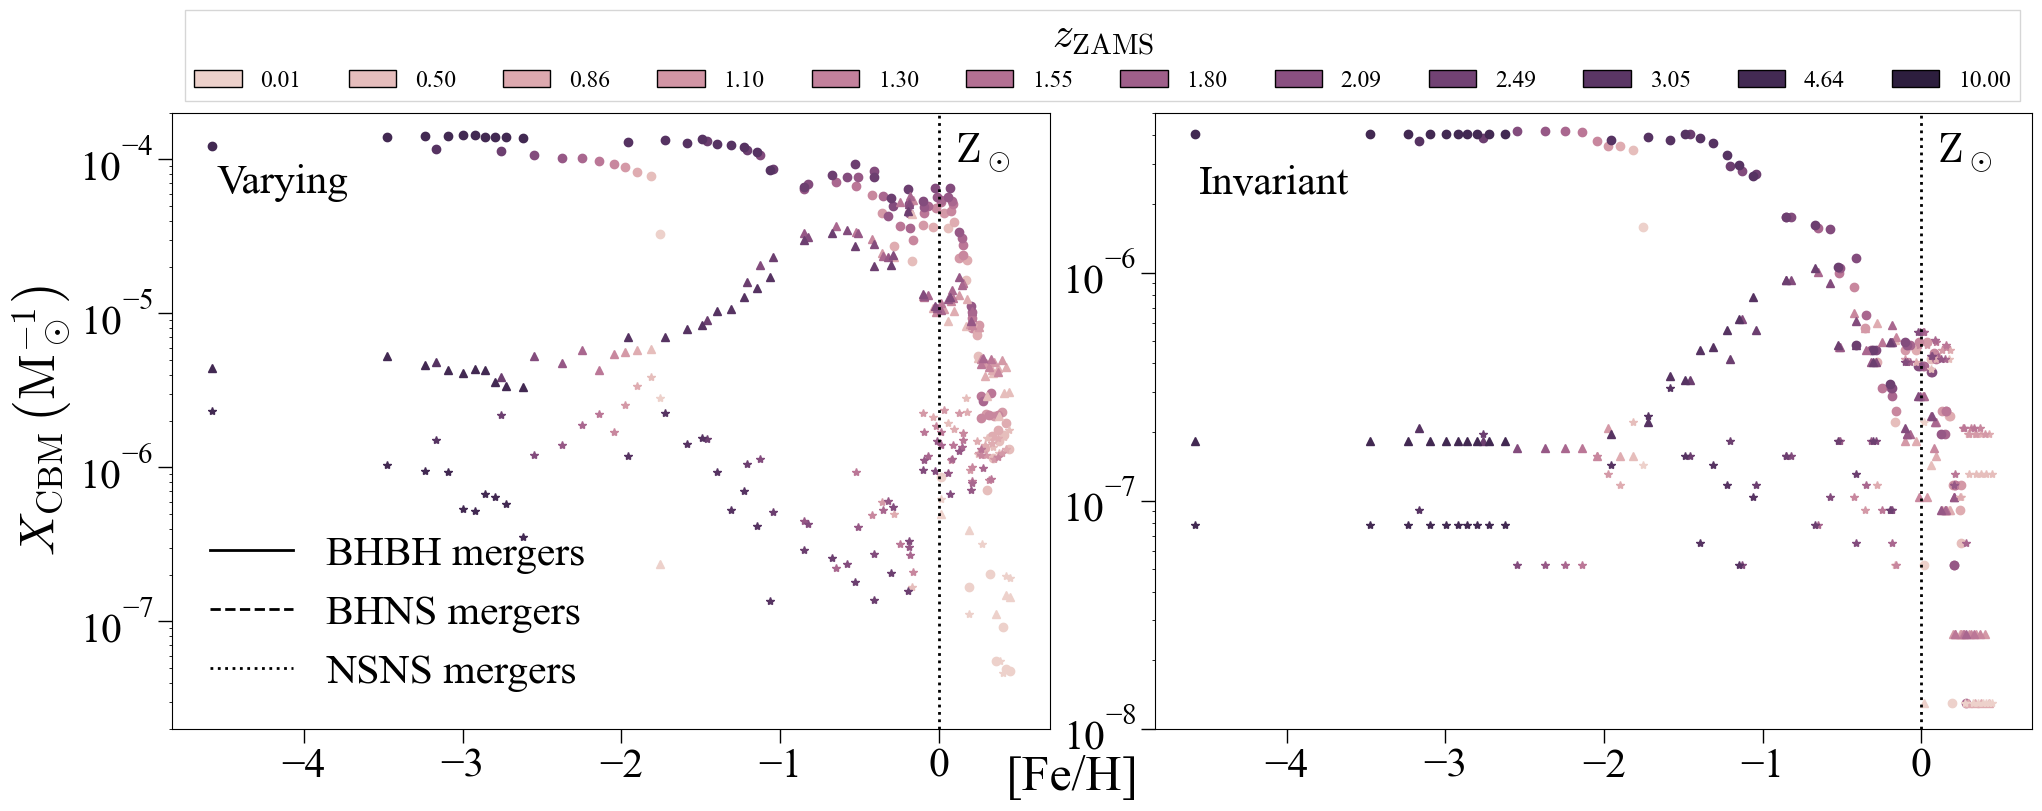

In [35]:
fig, [ax_1222, ax_2122] = plt.subplots(1,2, figsize=(24, 8), sharey=False)
cmap = cm_cubehelix
fig.subplots_adjust(hspace=0.05, wspace=0.12)
rect = fig.patch
rect.set_facecolor('white')

### IGIMF ###
ax = ax_1222

# BHBH
dict_ = igimf_bhbh_eta_dict
ls = '-'
eta_plot2(ax=ax, dict_=dict_, m='o')
    
# BHNS
dict_ = igimf_bhns_eta_dict
ls = '--'
eta_plot2(ax=ax, dict_=dict_, m='^')
    
# NSNS
dict_ = igimf_nsns_eta_dict
ls = ':'
eta_plot2(ax=ax, dict_=dict_, m='*')
    
ax_1222.set_ylabel(r'$X_\mathrm{CBM}\,\left(\mathrm{M}_\odot^{-1}\right)$', fontsize=36)
ax_1222.set_yscale('log')
ax_1222.set_ylim(2e-8, 2e-4)

###  CANONICAL ###
ax = ax_2122

# BHBH
dict_ = canon_bhbh_eta_dict
ls = '-'
eta_plot2(ax=ax, dict_=dict_, m='o')
    
# BHNS
dict_ = canon_bhns_eta_dict
ls = '--'
eta_plot2(ax=ax, dict_=dict_, m='^')
    
# NSNS
dict_ = canon_nsns_eta_dict
ls = ':'
eta_plot2(ax=ax, dict_=dict_, m='*')
    
ax_2122.set_yscale('log')
ax_2122.set_ylim(1e-8, 5e-6)

### Decoration ###

fig.text(0.5, 0.02, '[Fe/H]', ha='center', va='bottom', fontsize=36)

handles, labels = ax_1222.get_legend_handles_labels()
point1 = Line2D([0], [0], label='BHBH mergers', linestyle='-', color='k', linewidth=2)
point2 = Line2D([0], [0], label='BHNS mergers', linestyle='--', color='k', linewidth=2)
point3 = Line2D([0], [0], label='NSNS mergers', linestyle=':', color='k', linewidth=2)
handles.extend([point1, point2, point3])

ax_1222.legend(handles=handles, frameon=False, loc='lower left', bbox_to_anchor=(0,0))

ax_1222.vlines(0, 2e-8, 2e-4, color='k', linestyle=':')
ax_2122.vlines(0, 1e-8, 2e-4, color='k', linestyle=':')
ax_1222.text(0.1, 0.9, '$\mathrm{Z}_\odot$', ha='left', va='bottom', 
             transform=transforms.blended_transform_factory(ax_1222.transData, ax_1222.transAxes))
ax_2122.text(0.1, 0.9, '$\mathrm{Z}_\odot$', ha='left', va='bottom',
             transform=transforms.blended_transform_factory(ax_2122.transData, ax_2122.transAxes))

hue_order = sorted(np.unique(igimf_bhbh_df.Redshift_ZAMS))
palette = cm_cubehelix(np.linspace(0, 1, len(hue_order)))
handles = []
for zzams, color in zip(hue_order, palette):
    handle = Patch(facecolor=color, edgecolor='k', fill=True, label=f'{zzams:.2f}')
    handles.append(handle)
ax_2122.legend(handles=handles,
                    title='$z_\mathrm{ZAMS}$',
                    loc='lower right',
                    bbox_to_anchor=(1,1),
                    frameon=True,
                    fancybox=False,
                    ncol=12,
                    fontsize=17)

ax_1222.tick_params(labelsize=30)
ax_2122.tick_params(labelsize=30)

ax_1222.text(0.05, 0.87, 'Varying', transform=ax_1222.transAxes)
ax_2122.text(0.05, 0.87, 'Invariant', transform=ax_2122.transAxes)

#fig.savefig(FIGURE_FOLDER/'formation_efficiency_metallicity.pdf', bbox_inches='tight')
#fig.savefig(FIGURE_FOLDER/'formation_efficiency_metallicity.png', bbox_inches='tight')

Figure 2 of the paper.

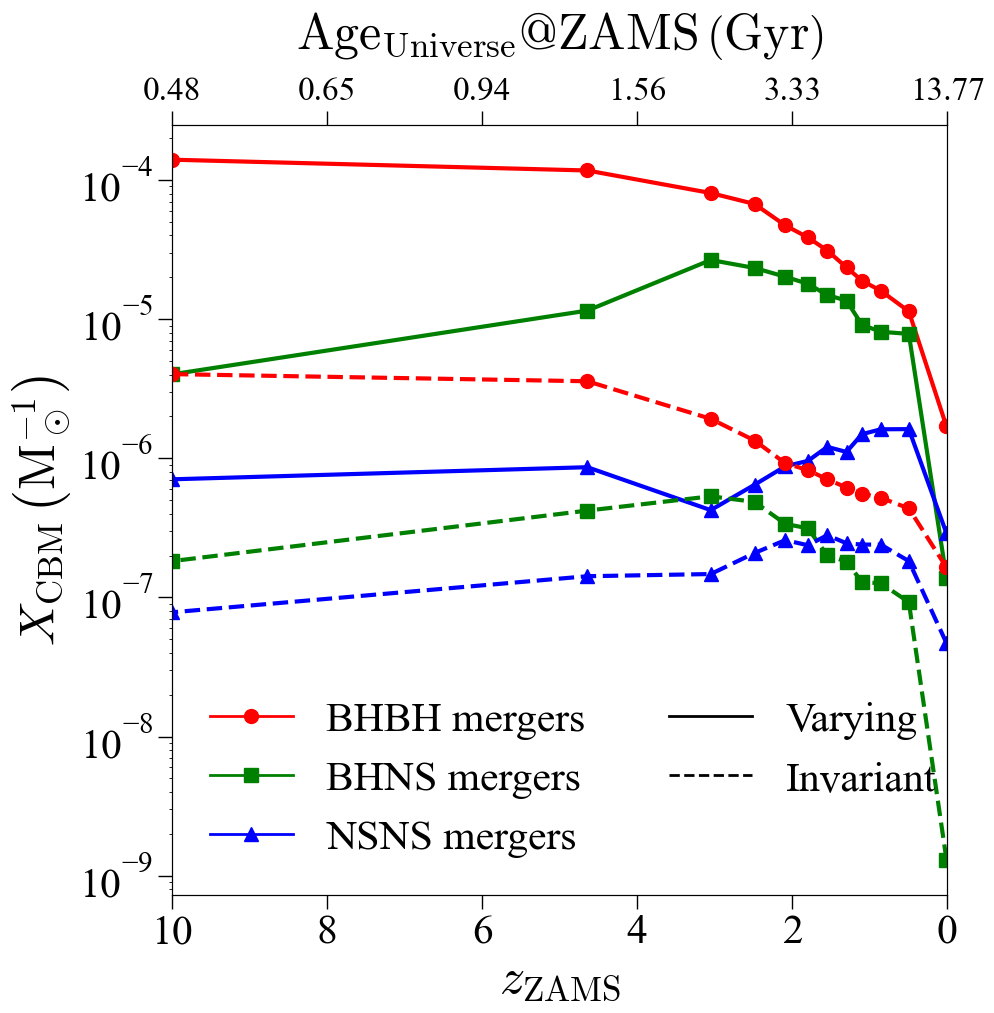

In [36]:
fig, ax_ = plt.subplots(figsize=(10, 10), sharey=True)
cmap = cm_cubehelix
fig.subplots_adjust(hspace=0.05, wspace=0)
rect = fig.patch
rect.set_facecolor('white')

### IGIMF ###
ax = ax_

# BHBH
dict_ = igimf_bhbh_z_eta_dict
ls = '-'
redshift_eta_plot(ax=ax, dict_=dict_, ls='-', color='red', marker='o')
    
# BHNS
dict_ = igimf_bhns_z_eta_dict
ls = '--'
redshift_eta_plot(ax=ax, dict_=dict_, ls='-', color='green', marker='s')
    
# NSNS
dict_ = igimf_nsns_z_eta_dict
ls = ':'
redshift_eta_plot(ax=ax, dict_=dict_, ls='-', color='blue', marker='^')
    
ax_.set_ylabel(r'$X_\mathrm{CBM}\,\left(\mathrm{M}_\odot^{-1}\right)$', fontsize=36)

###  CANONICAL ###
ax = ax_

# BHBH
dict_ = canon_bhbh_z_eta_dict
ls = '-'
redshift_eta_plot(ax=ax, dict_=dict_, ls='--', color='red', marker='o')
    
# BHNS
dict_ = canon_bhns_z_eta_dict
ls = '--'
redshift_eta_plot(ax=ax, dict_=dict_, ls='--', color='green', marker='s')
    
# NSNS
dict_ = canon_nsns_z_eta_dict
ls = ':'
redshift_eta_plot(ax=ax, dict_=dict_, ls='--', color='blue', marker='^')
    
ax_.set_yscale('log')
#ax_2122.set_ylim(2e-8, 2e-4)

### Decoration ###

ax_.set_xlabel(r'$z_\mathrm{ZAMS}$', fontsize=36)

handles, labels = ax_1222.get_legend_handles_labels()
point1 = Line2D([0], [0], label='BHBH mergers', linestyle='-', color='r', linewidth=2, marker='o', markersize=10)
point2 = Line2D([0], [0], label='BHNS mergers', linestyle='-', color='g', linewidth=2, marker='s', markersize=10)
point3 = Line2D([0], [0], label='NSNS mergers', linestyle='-', color='b', linewidth=2, marker='^', markersize=10)
point4 = Line2D([0], [0], label='Varying', linestyle='-', color='k', linewidth=2)
point5 = Line2D([0], [0], label='Invariant', linestyle='--', color='k', linewidth=2)
handles.extend([point1, point2, point3, point4, point5])

ax_.legend(handles=handles, frameon=False, loc='lower left', bbox_to_anchor=(0,0), ncol=2)

ax_.tick_params(labelsize=30)

ax_.invert_xaxis()
ax_.set_xlim(10,0)

ax_x2 = ax_.twiny()
ax_x2.set_xlim(10,0)
ax_x2.set_xticks(np.arange(0,12,2)[::-1])
ax_x2.set_xticklabels([f'{cosmo.age(z).value:.2f}' for z in np.arange(0,12,2)[::-1]])
ax_x2.set_xlabel(r'$\mathrm{Age}_\mathrm{Universe}@\mathrm{ZAMS}\,\left(\mathrm{Gyr}\right)$', labelpad=20, fontsize=36)

fig.savefig(FIGURE_FOLDER/'formation_efficiency_redshift.pdf', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'formation_efficiency_redshift.eps', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'formation_efficiency_redshift.png', bbox_inches='tight')

# Mass and coalescence times over redshift distributions

## Main histogram+KDE plots

Because we already show the histograms, we do not seek to any fine structure with the KDEs, but instead employ them as simple visual aids that get around the superposition of the histograms and allow for following the redshif evolution of the distributions. We set adequate bandwidths for this purpose according to the size of the sample.

In [37]:
bhbh_kde_bw = 0.2
bhns_kde_bw = 0.3
nsns_kde_bw = 0.4
nsbh_kde_bw = 0.5

### $z_\mathrm{ZAMS}$

Figure 3 of the paper.

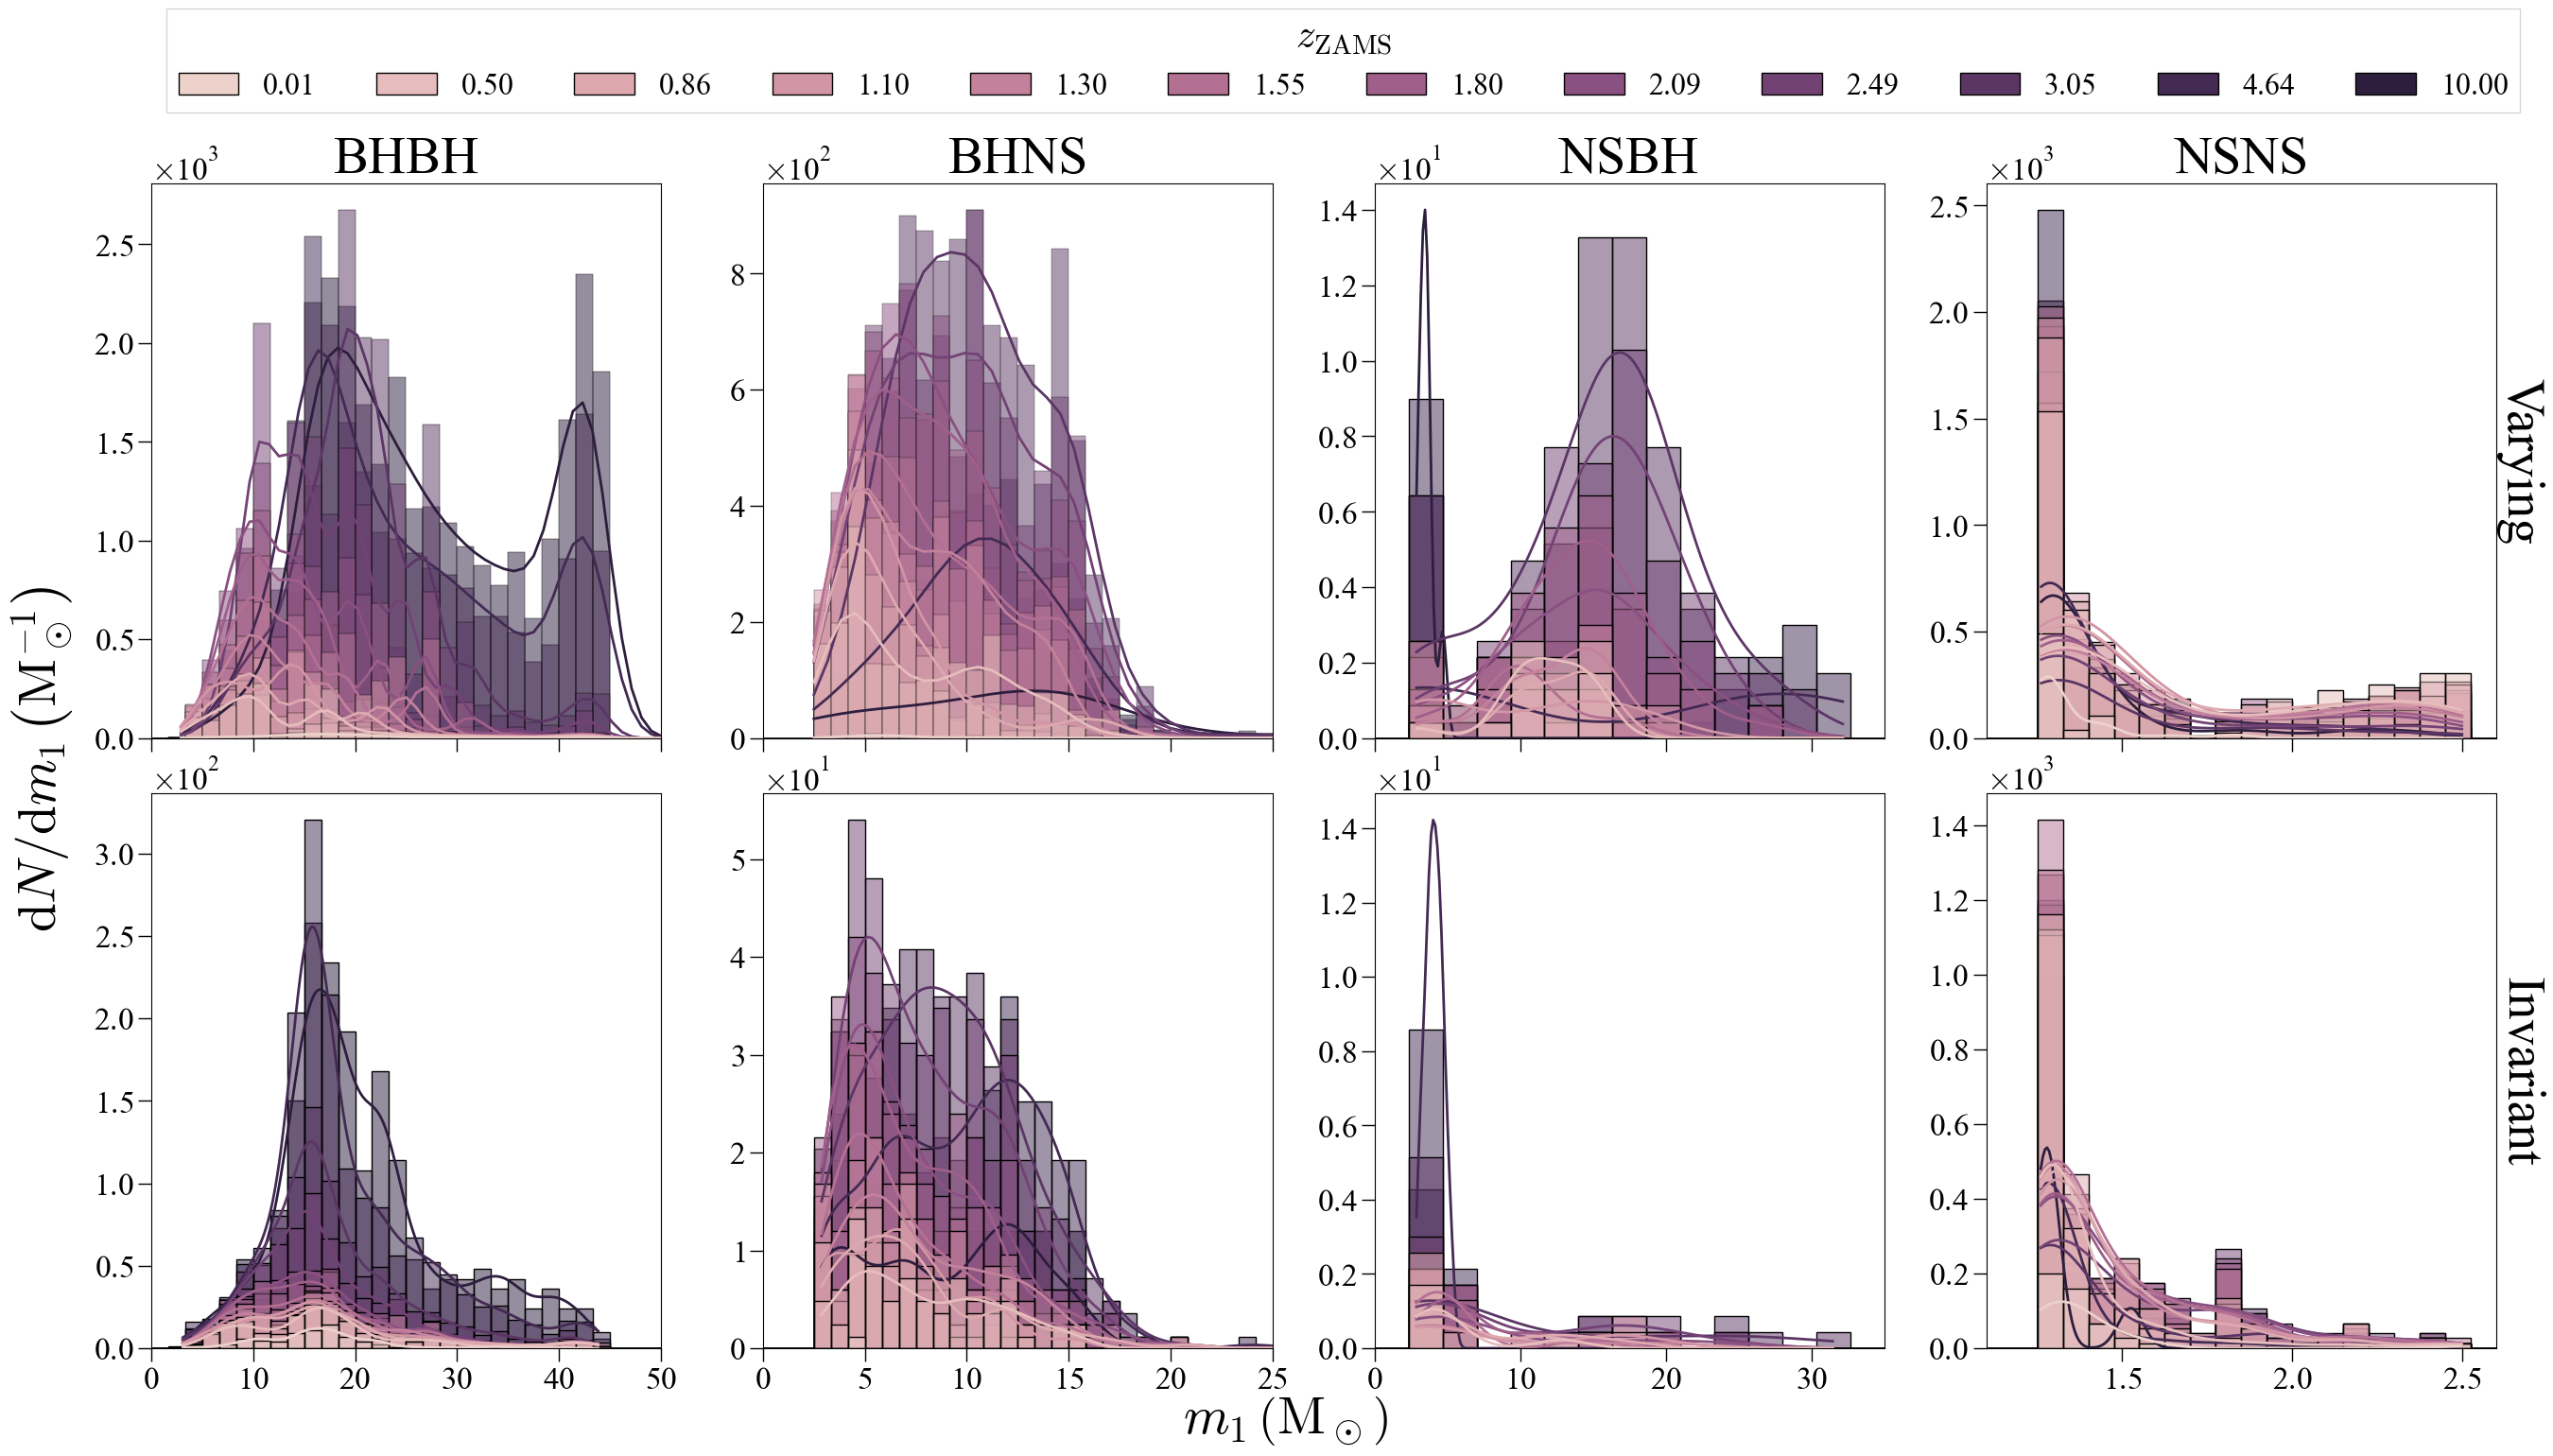

In [40]:
x='mco1'
hue='Redshift_ZAMS'

fig, axes = plt.subplots(2, 4, figsize=(32, 16), sharex='col')
fig.subplots_adjust(hspace=0.1, wspace=0.2)
rect = fig.patch
rect.set_facecolor('white')
[[igimf_bhbh_ax, igimf_bhns_ax, igimf_nsbh_ax, igimf_nsns_ax],
 [canon_bhbh_ax, canon_bhns_ax, canon_nsbh_ax, canon_nsns_ax]] = axes
 
min_mbhbh = 0
max_mbhbh = 50
nbin_bhbh = 31

min_mbhns = 0
max_mbhns = 25
nbin_bhns = 31

min_mnsbh = 0
max_mnsbh = 35
nbin_nsbh = 16

min_mnsns = 1.1
max_mnsns = 2.6
nbin_nsns = 21

hue_order = list(sorted(np.unique(igimf_bhbh_df.Redshift_ZAMS)))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))

histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False, 
                     'common_norm': False}

### IGIMF PLOTS ####

sns.histplot(igimf_bhbh_df,
             bins=np.linspace(min_mbhbh, max_mbhbh, nbin_bhbh),
             ax=igimf_bhbh_ax,
             kde_kws= {'bw_method': bhbh_kde_bw},
             **histplot_settings)
igimf_bhbh_ax.set_xlim(min_mbhbh, max_mbhbh)

sns.histplot(igimf_bhns_df,
             bins=np.linspace(min_mbhns, max_mbhns, nbin_bhns),
             ax=igimf_bhns_ax,
             kde_kws= {'bw_method': bhns_kde_bw},
             **histplot_settings)
igimf_bhns_ax.set_xlim(min_mbhns, max_mbhns)

sns.histplot(igimf_nsbh_df,
             bins=np.linspace(min_mnsbh, max_mnsbh, nbin_nsbh),
             ax=igimf_nsbh_ax,
             kde_kws= {'bw_method': nsbh_kde_bw},
             **histplot_settings)
igimf_nsbh_ax.set_xlim(min_mnsbh, max_mnsbh)

sns.histplot(igimf_nsns_df,
             bins=np.linspace(min_mnsns, max_mnsns, nbin_nsns),
             ax=igimf_nsns_ax,
             kde_kws= {'bw_method': nsns_kde_bw},
             **histplot_settings)
igimf_nsns_ax.set_xlim(min_mnsns, max_mnsns)

### CANON PLOTS ###
hue_order = sorted(np.unique(canon_bhbh_df.Redshift_ZAMS))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))
histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False, 
                     'common_norm': False}

sns.histplot(canon_bhbh_df,
             bins=np.linspace(min_mbhbh, max_mbhbh, nbin_bhbh),
             ax=canon_bhbh_ax,
             kde_kws= {'bw_method': bhbh_kde_bw},
             **histplot_settings)
canon_bhbh_ax.set_xlim(min_mbhbh, max_mbhbh)

sns.histplot(canon_bhns_df,
             bins=np.linspace(min_mbhns, max_mbhns, nbin_bhns),
             ax=canon_bhns_ax,
             kde_kws= {'bw_method': bhns_kde_bw},
             **histplot_settings)
canon_bhns_ax.set_xlim(min_mbhns, max_mbhns)

sns.histplot(canon_nsbh_df,
             bins=np.linspace(min_mnsbh, max_mnsbh, nbin_nsbh),
             ax=canon_nsbh_ax,
             kde_kws= {'bw_method': nsbh_kde_bw},
             **histplot_settings)
canon_nsbh_ax.set_xlim(min_mnsbh, max_mnsbh)

sns.histplot(canon_nsns_df,
             bins=np.linspace(min_mnsns, max_mnsns, nbin_nsns),
             ax=canon_nsns_ax,
             kde_kws= {'bw_method': nsns_kde_bw},
             **histplot_settings)
canon_nsns_ax.set_xlim(min_mnsns, max_mnsns)

### DECORATION ###

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(which='both', axis='both', labelsize=24)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.ticklabel_format(axis='both', useMathText=True)
    
    
handles = []
for zzams, color in zip(hue_order, palette):
    handle = Patch(facecolor=color, edgecolor='k', fill=True, label=f'{zzams:.2f}')
    handles.append(handle)
igimf_bhbh_ax.legend(handles=handles,
                    title='$z_\\mathrm{ZAMS}$',
                    loc='lower left',
                    bbox_to_anchor=(0,1.1),
                    frameon=True,
                    fancybox=False,
                    ncol=12,
                    fontsize=23)

fig.text(0.1, 0.5, '$\\mathrm{d}N/\\mathrm{d}m_1\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$', rotation=90, va='center', ha='right', transform=fig.transFigure, fontsize=40)
fig.text(0.5, 0.08, '$m_1\\,\\left(\\mathrm{M}_\\odot\\right)$', ha='center', va='top', transform=fig.transFigure, fontsize=40)

igimf_bhbh_ax.text(0.5, 1, 'BHBH', ha='center', va='bottom', transform=igimf_bhbh_ax.transAxes, fontsize=40)
igimf_bhns_ax.text(0.5, 1, 'BHNS', ha='center', va='bottom', transform=igimf_bhns_ax.transAxes, fontsize=40)
igimf_nsbh_ax.text(0.5, 1, 'NSBH', ha='center', va='bottom', transform=igimf_nsbh_ax.transAxes, fontsize=40)
igimf_nsns_ax.text(0.5, 1, 'NSNS', ha='center', va='bottom', transform=igimf_nsns_ax.transAxes, fontsize=40)

igimf_nsns_ax.text(1, 0.5, 'Varying', rotation=-90, ha='left', va='center', transform=igimf_nsns_ax.transAxes, fontsize=40)
canon_nsns_ax.text(1, 0.5, 'Invariant', rotation=-90, ha='left', va='center', transform=canon_nsns_ax.transAxes, fontsize=40)

plt.savefig(FIGURE_FOLDER/'zzams_mco1.png', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'zzams_mco1.pdf', bbox_inches='tight')

Figure 4 of the paper.

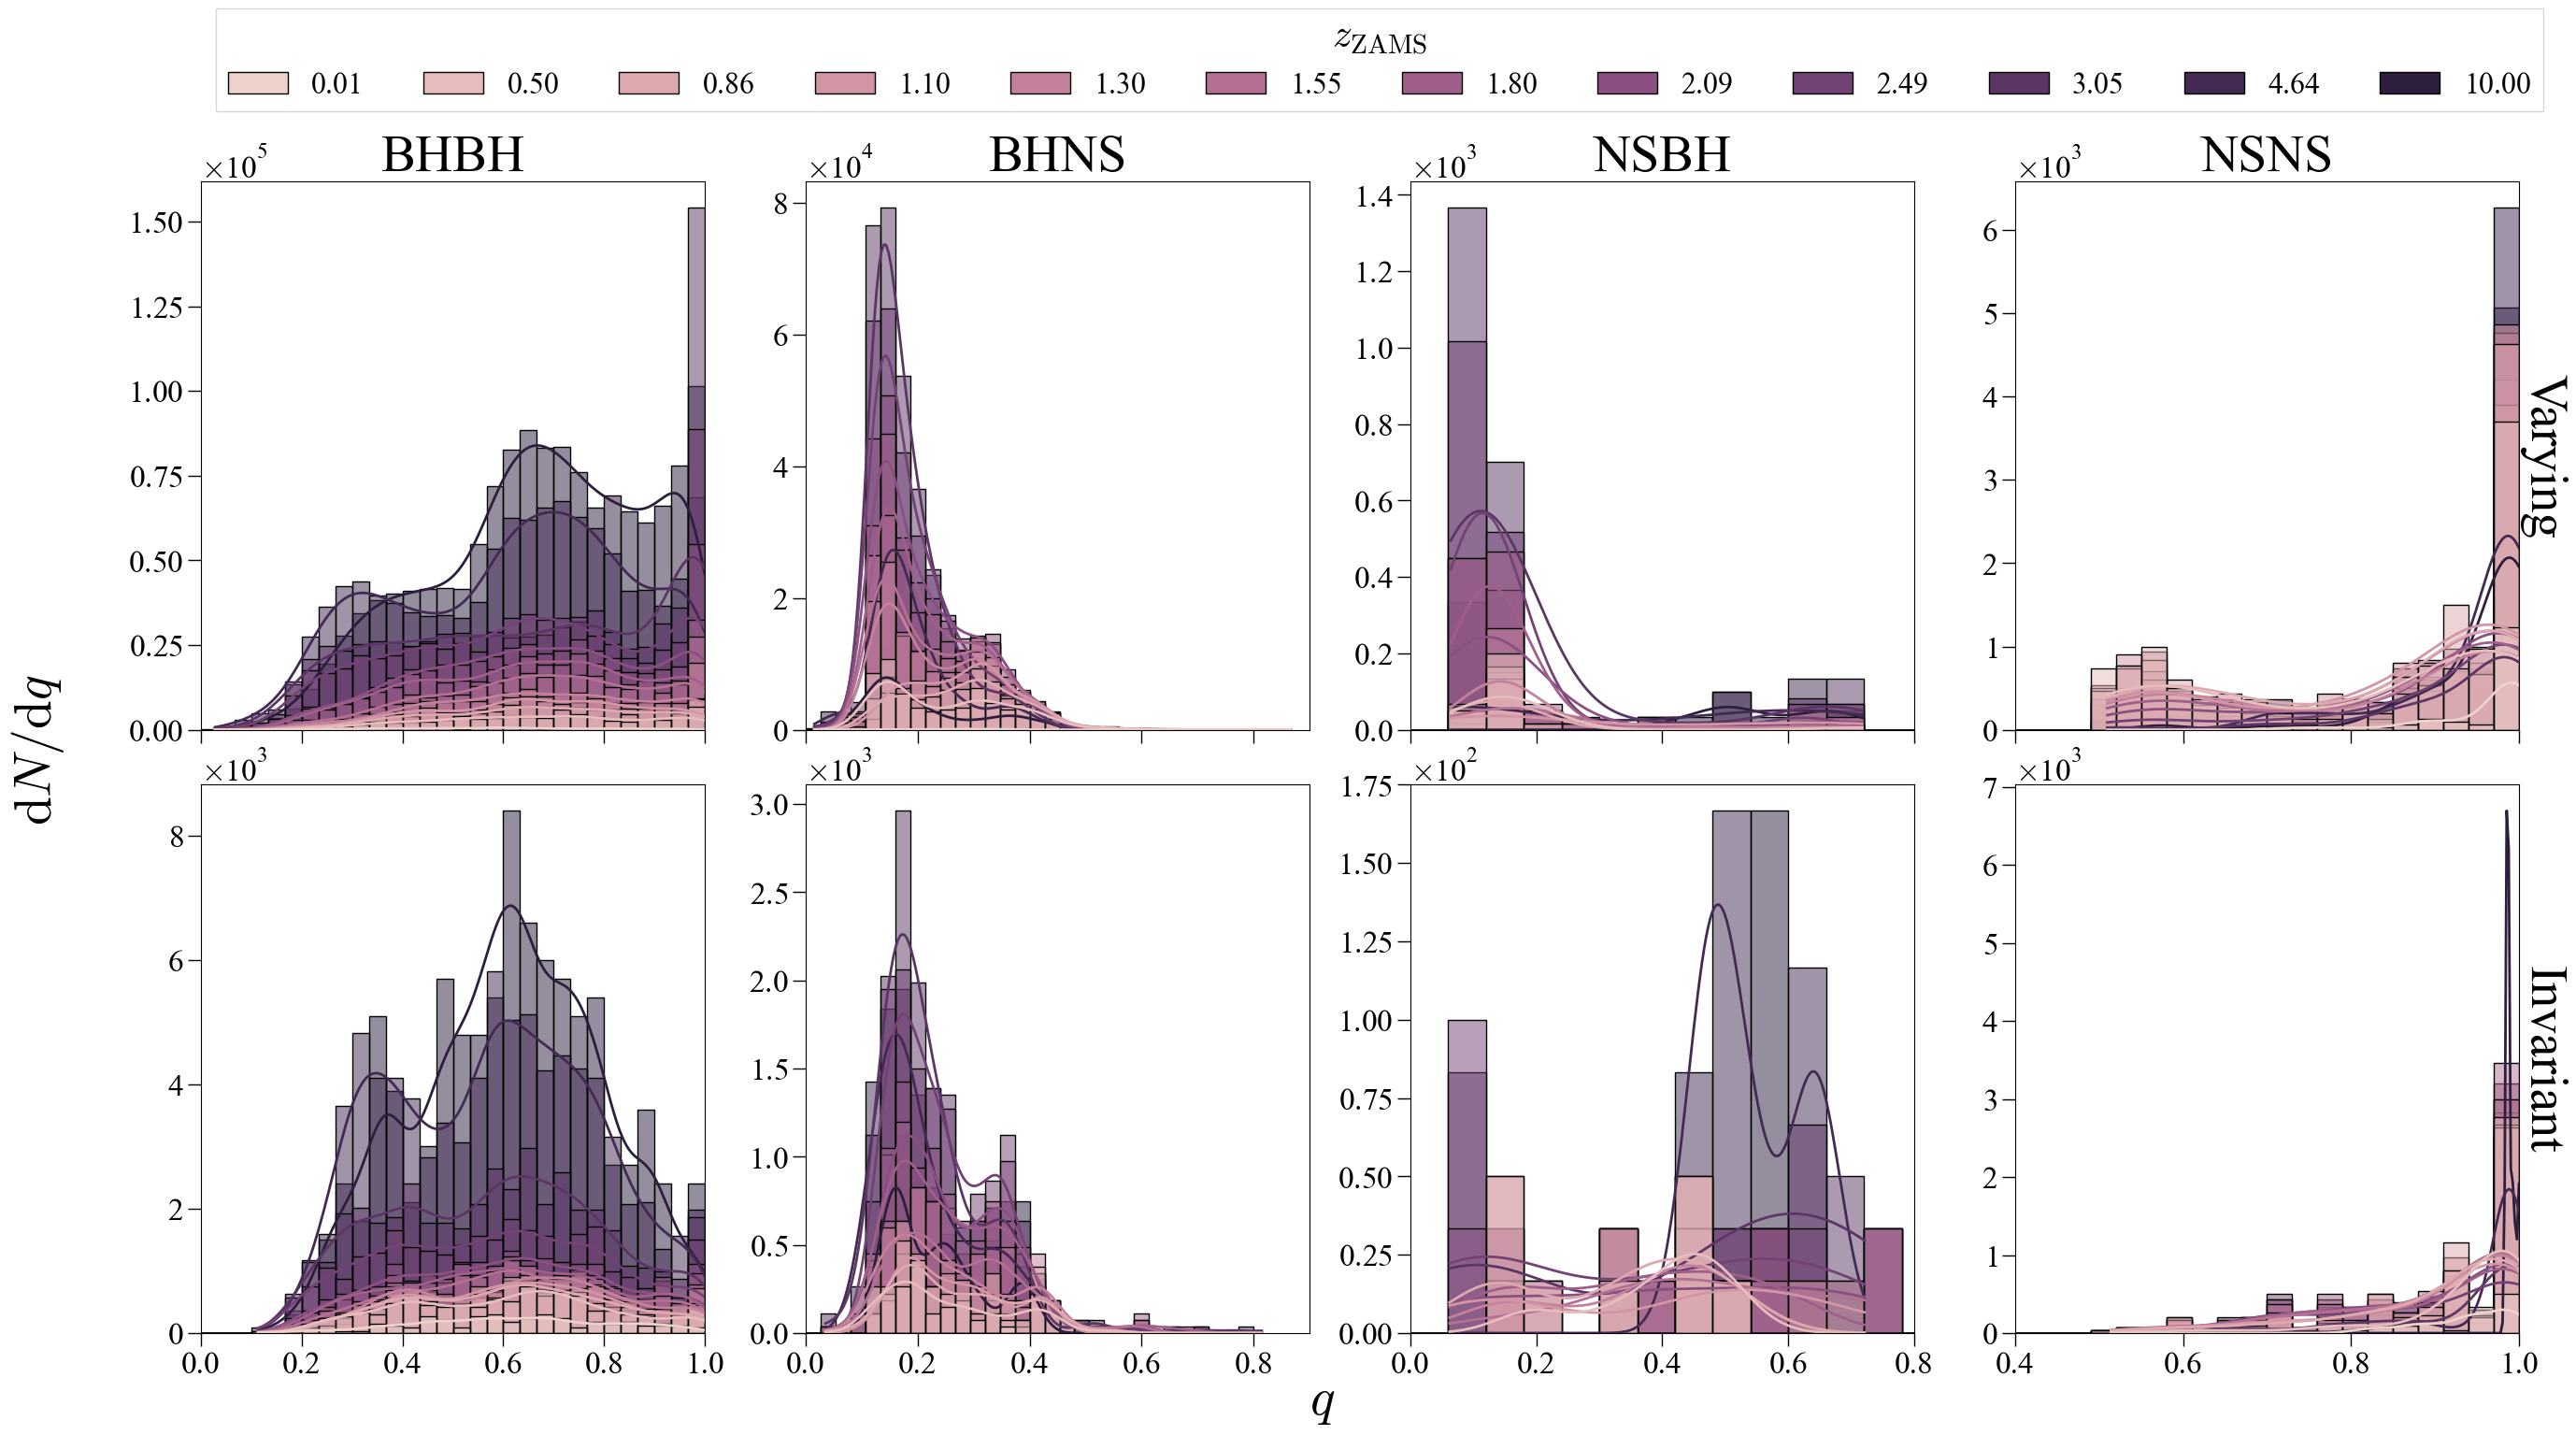

In [41]:
x='q'
hue='Redshift_ZAMS'

fig, axes = plt.subplots(2, 4, figsize=(32, 16), sharex='col')
fig.subplots_adjust(hspace=0.1, wspace=0.2)
rect = fig.patch
rect.set_facecolor('white')
[[igimf_bhbh_ax, igimf_bhns_ax, igimf_nsbh_ax, igimf_nsns_ax],
 [canon_bhbh_ax, canon_bhns_ax, canon_nsbh_ax, canon_nsns_ax]] = axes
 
bhbh_min, bhbh_max = (0, 1)
bhns_min, bhns_max = (0, 0.9)
nsbh_min, nsbh_max = (0, 0.8)
nsns_min, nsns_max = (0.4, 1)

bhbh_bins = np.linspace(bhbh_min, bhbh_max, 31)
nsbh_bins = np.linspace(bhns_min, bhns_max, 16)
bhns_bins = np.linspace(nsbh_min, nsbh_max, 31)
nsns_bins = np.linspace(nsns_min, nsns_max, 21)

for ax in axes[1]:
    ax.set_xticks(np.arange(0, 1.2, 0.2))
    ax.set_xticklabels([f'{x:.1f}' for x in np.arange(0, 1.2, 0.2)])

hue_order = sorted(np.unique(igimf_bhbh_df.Redshift_ZAMS))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))

histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False,
                     'log_scale': (False, False),
                     'common_norm': False}

### IGIMF PLOTS ####

sns.histplot(igimf_bhbh_df,
             bins=bhbh_bins,
             ax=igimf_bhbh_ax,
             kde_kws= {'bw_method': bhbh_kde_bw},
             **histplot_settings)
igimf_bhbh_ax.set_xlim(bhbh_min, bhbh_max)

sns.histplot(igimf_bhns_df,
             bins=bhns_bins,
             kde_kws= {'bw_method': bhns_kde_bw},
             ax=igimf_bhns_ax,
             **histplot_settings)
igimf_bhns_ax.set_xlim(bhns_min, bhns_max)

sns.histplot(igimf_nsbh_df,
             bins=nsbh_bins,
             ax=igimf_nsbh_ax,
             kde_kws= {'bw_method': nsbh_kde_bw},
             **histplot_settings)
igimf_nsbh_ax.set_xlim(nsbh_min, nsbh_max)

sns.histplot(igimf_nsns_df,
             bins=nsns_bins,
             ax=igimf_nsns_ax,
             kde_kws= {'bw_method': nsns_kde_bw},
             **histplot_settings)
igimf_nsns_ax.set_xlim(nsns_min, nsns_max)

### CANON PLOTS ###
hue_order = sorted(np.unique(canon_bhbh_df.Redshift_ZAMS))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))
histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False, 
                     'common_norm': False}

sns.histplot(canon_bhbh_df,
             bins=bhbh_bins,
             ax=canon_bhbh_ax,
             kde_kws= {'bw_method': bhbh_kde_bw},
             **histplot_settings)
canon_bhbh_ax.set_xlim(bhbh_min, bhbh_max)

sns.histplot(canon_bhns_df,
             bins=bhns_bins,
             ax=canon_bhns_ax,
             kde_kws= {'bw_method': bhns_kde_bw},
             **histplot_settings)
canon_bhns_ax.set_xlim(bhns_min, bhns_max)

sns.histplot(canon_nsbh_df,
             bins=nsbh_bins,
             ax=canon_nsbh_ax,
             kde_kws= {'bw_method': nsbh_kde_bw},
             **histplot_settings)
canon_nsbh_ax.set_xlim(nsbh_min, nsbh_max)

sns.histplot(canon_nsns_df,
             bins=nsns_bins,
             ax=canon_nsns_ax,
             kde_kws= {'bw_method': nsns_kde_bw},
             **histplot_settings)
canon_nsns_ax.set_xlim(nsns_min, nsns_max)

### DECORATION ###

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.tick_params(which='both', axis='both', labelsize=24)
    ax.ticklabel_format(axis='y', useMathText=True)   
        
handles = []
for zzams, color in zip(hue_order, palette):
    handle = Patch(facecolor=color, edgecolor='k', fill=True, label=f'{zzams:.2f}')
    handles.append(handle)
igimf_bhbh_ax.legend(handles=handles,
                    title='$z_\\mathrm{ZAMS}$',
                    loc='lower left',
                    bbox_to_anchor=(0,1.1),
                    frameon=True,
                    fancybox=False,
                    ncol=12,
                    fontsize=23)

fig.text(0.08, 0.5, '$\\mathrm{d}N/\\mathrm{d}q$', rotation=90, va='center', ha='right', transform=fig.transFigure, fontsize=40)
fig.text(0.5, 0.08, '$q$', ha='center', va='top', transform=fig.transFigure, fontsize=40)

igimf_bhbh_ax.text(0.5, 1, 'BHBH', ha='center', va='bottom', transform=igimf_bhbh_ax.transAxes, fontsize=40)
igimf_bhns_ax.text(0.5, 1, 'BHNS', ha='center', va='bottom', transform=igimf_bhns_ax.transAxes, fontsize=40)
igimf_nsbh_ax.text(0.5, 1, 'NSBH', ha='center', va='bottom', transform=igimf_nsbh_ax.transAxes, fontsize=40)
igimf_nsns_ax.text(0.5, 1, 'NSNS', ha='center', va='bottom', transform=igimf_nsns_ax.transAxes, fontsize=40)

igimf_nsns_ax.text(1, 0.5, 'Varying', rotation=-90, ha='left', va='center', transform=igimf_nsns_ax.transAxes, fontsize=40)
canon_nsns_ax.text(1, 0.5, 'Invariant', rotation=-90, ha='left', va='center', transform=canon_nsns_ax.transAxes, fontsize=40)

plt.savefig(FIGURE_FOLDER/'zzams_q.png', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'zzams_q.pdf', bbox_inches='tight')

Figure 10 of the paper.

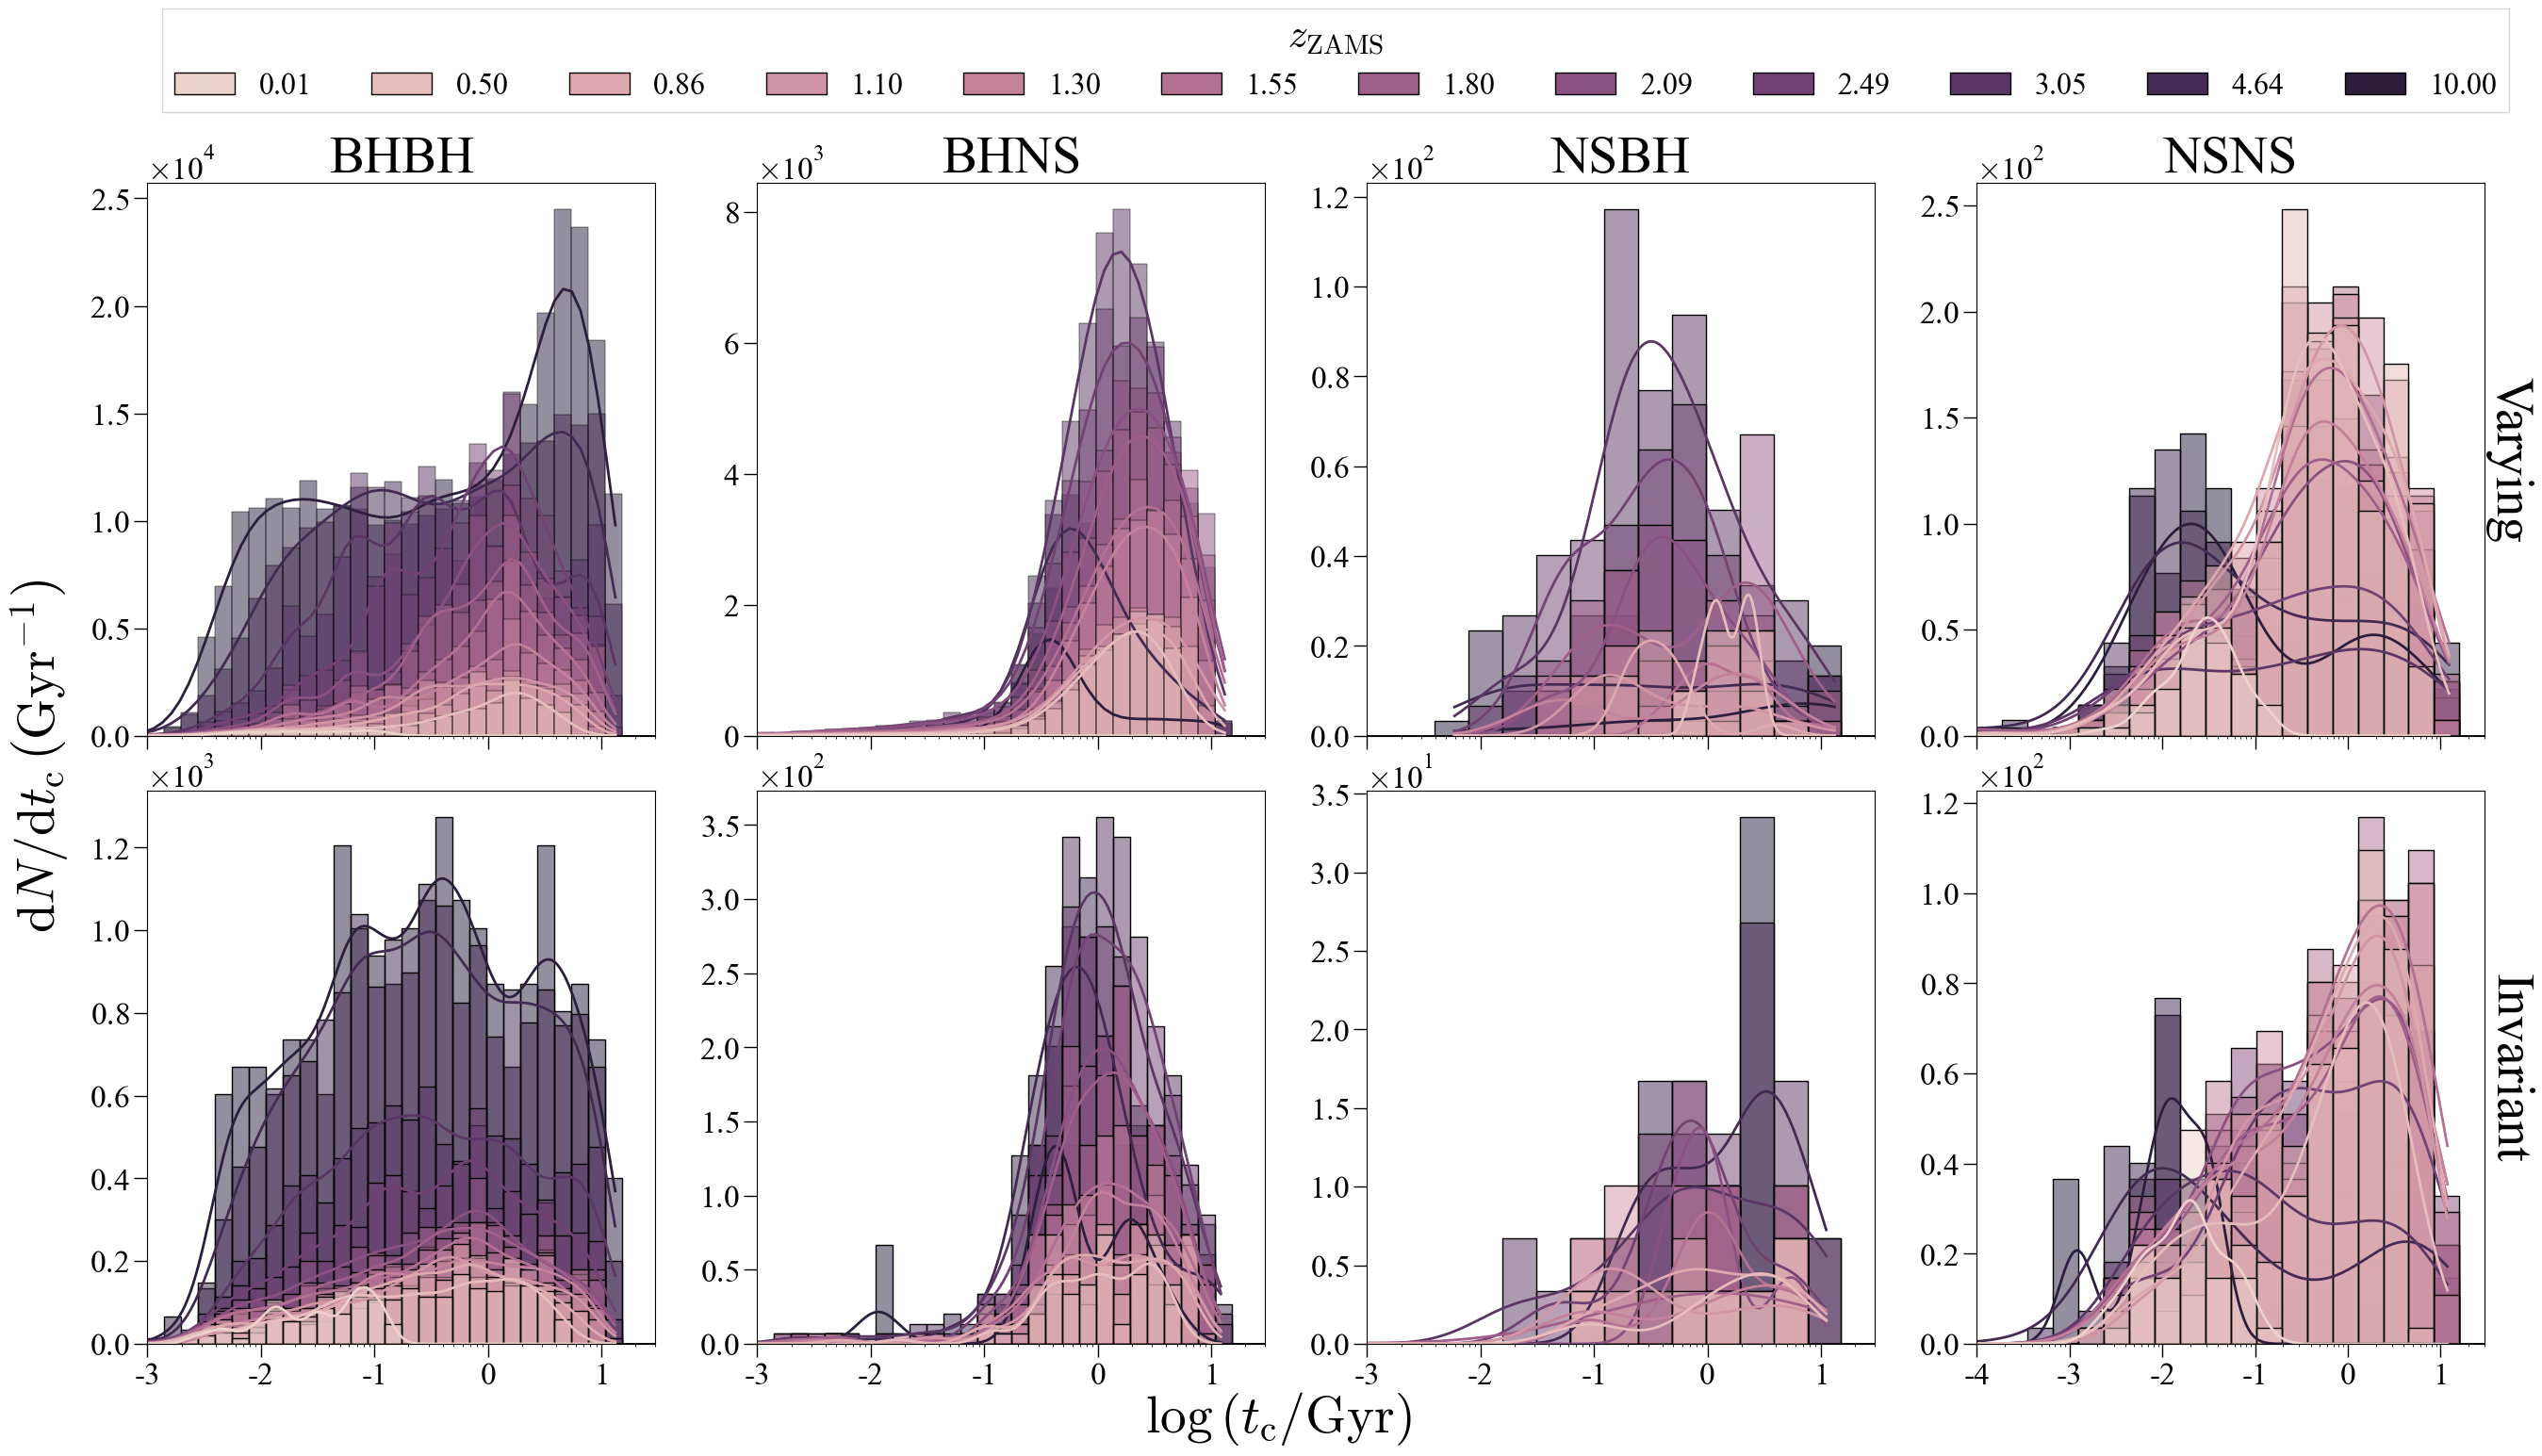

In [43]:
x='Coalescence_Time'
hue='Redshift_ZAMS'

fig, axes = plt.subplots(2, 4, figsize=(32, 16), sharex='col')
fig.subplots_adjust(hspace=0.1, wspace=0.2)
rect = fig.patch
rect.set_facecolor('white')
[[igimf_bhbh_ax, igimf_bhns_ax, igimf_nsbh_ax, igimf_nsns_ax],
 [canon_bhbh_ax, canon_bhns_ax, canon_nsbh_ax, canon_nsns_ax]] = axes
 
bh_bins = np.linspace(-3, np.log10(3e1), 31)
bhns_bins = np.linspace(-3, np.log10(3e1), 31)
ns_bins = np.linspace(-4, np.log10(3e1), 21)
nsbh_bins = np.linspace(-3, np.log10(3e1), 16)
min_logt = 1e-3
max_logt= 3e1

hue_order = sorted(np.unique(igimf_bhbh_df.Redshift_ZAMS))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))

histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False,
                     'log_scale': (True,False),
                     'common_norm': False}

### IGIMF PLOTS ####

sns.histplot(igimf_bhbh_df,
             bins=bh_bins,
             ax=igimf_bhbh_ax,
             kde_kws= {'bw_method': bhbh_kde_bw},
             **histplot_settings)
igimf_bhbh_ax.set_xlim(min_logt, max_logt)

sns.histplot(igimf_bhns_df,
             bins=bhns_bins,
             ax=igimf_bhns_ax,
             kde_kws= {'bw_method': bhns_kde_bw},
             **histplot_settings)
igimf_bhns_ax.set_xlim(min_logt, max_logt)

sns.histplot(igimf_nsbh_df,
             bins=nsbh_bins,
             ax=igimf_nsbh_ax,
             kde_kws= {'bw_method': nsbh_kde_bw},
             **histplot_settings)
igimf_nsbh_ax.set_xlim(min_logt, max_logt)

sns.histplot(igimf_nsns_df,
             bins=ns_bins,
             ax=igimf_nsns_ax,
             kde_kws= {'bw_method': nsns_kde_bw},
             **histplot_settings)
igimf_nsns_ax.set_xlim(1e-4, max_logt)

### CANON PLOTS ###
hue_order = sorted(np.unique(canon_bhbh_df.Redshift_ZAMS))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))
histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False, 
                     'common_norm': False}

sns.histplot(canon_bhbh_df,
             bins=bh_bins,
             ax=canon_bhbh_ax,
             kde_kws= {'bw_method': bhbh_kde_bw},
             **histplot_settings)
canon_bhbh_ax.set_xlim(min_logt, max_logt)

sns.histplot(canon_bhns_df,
             bins=bhns_bins,
             ax=canon_bhns_ax,
             kde_kws= {'bw_method': bhns_kde_bw},
             **histplot_settings)
canon_bhns_ax.set_xlim(min_logt, max_logt)

sns.histplot(canon_nsbh_df,
             bins=nsbh_bins,
             ax=canon_nsbh_ax,
             kde_kws= {'bw_method': nsbh_kde_bw},
             **histplot_settings)
canon_nsbh_ax.set_xlim(min_logt, max_logt)

sns.histplot(canon_nsns_df,
             bins=ns_bins,
             ax=canon_nsns_ax,
             kde_kws= {'bw_method': nsns_kde_bw},
             **histplot_settings)
canon_nsns_ax.set_xlim(1e-4, max_logt)

### DECORATION ###

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.tick_params(which='both', axis='both', labelsize=24)
    ax.ticklabel_format(axis='y', useMathText=True)

for ax in axes[1]:
    ax.set_xticks([1e-3,1e-2,1e-1,1e0,1e1])
    ax.set_xticklabels([str(x) for x in [-3,-2,-1,0,1]])
      
axes[1,-1].set_xticks([1e-4, 1e-3,1e-2,1e-1,1e0,1e1])
axes[1,-1].set_xticklabels([str(x) for x in [-4, -3,-2,-1,0,1]])
        
handles = []
for zzams, color in zip(hue_order, palette):
    handle = Patch(facecolor=color, edgecolor='k', fill=True, label=f'{zzams:.2f}')
    handles.append(handle)
igimf_bhbh_ax.legend(handles=handles,
                    title='$z_\\mathrm{ZAMS}$',
                    loc='lower left',
                    bbox_to_anchor=(0,1.1),
                    frameon=True,
                    fancybox=False,
                    ncol=12,
                    fontsize=23)

fig.text(0.1, 0.5, '$\\mathrm{d}N/\\mathrm{d}t_\\mathrm{c}\\,\\left(\\mathrm{Gyr}^{-1}\\right)$', rotation=90, va='center', ha='right', transform=fig.transFigure, fontsize=40)
fig.text(0.5, 0.08, '$\\log\\left(t_\\mathrm{c}/\\mathrm{Gyr}\\right)$', ha='center', va='top', transform=fig.transFigure, fontsize=40)

igimf_bhbh_ax.text(0.5, 1, 'BHBH', ha='center', va='bottom', transform=igimf_bhbh_ax.transAxes, fontsize=40)
igimf_bhns_ax.text(0.5, 1, 'BHNS', ha='center', va='bottom', transform=igimf_bhns_ax.transAxes, fontsize=40)
igimf_nsbh_ax.text(0.5, 1, 'NSBH', ha='center', va='bottom', transform=igimf_nsbh_ax.transAxes, fontsize=40)
igimf_nsns_ax.text(0.5, 1, 'NSNS', ha='center', va='bottom', transform=igimf_nsns_ax.transAxes, fontsize=40)

igimf_nsns_ax.text(1, 0.5, 'Varying', rotation=-90, ha='left', va='center', transform=igimf_nsns_ax.transAxes, fontsize=40)
canon_nsns_ax.text(1, 0.5, 'Invariant', rotation=-90, ha='left', va='center', transform=canon_nsns_ax.transAxes, fontsize=40)

plt.savefig(FIGURE_FOLDER/'zzams_tcoal.png', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'zzams_tcoal.pdf', bbox_inches='tight')

### $z_\mathrm{merger}$

The sample is broken into only four $z_\mathrm{merger}$ components, while it is broken into twelve $z_\mathrm{ZAMS}$, so somewhat lower KDE bandwidths are adequate for the $z_\mathrm{merger}$ plots.

In [66]:
bhbh_kde_bw = 0.15
bhns_kde_bw = 0.25
nsns_kde_bw = 0.35
nsbh_kde_bw = 0.45

Figure 6 of the paper.

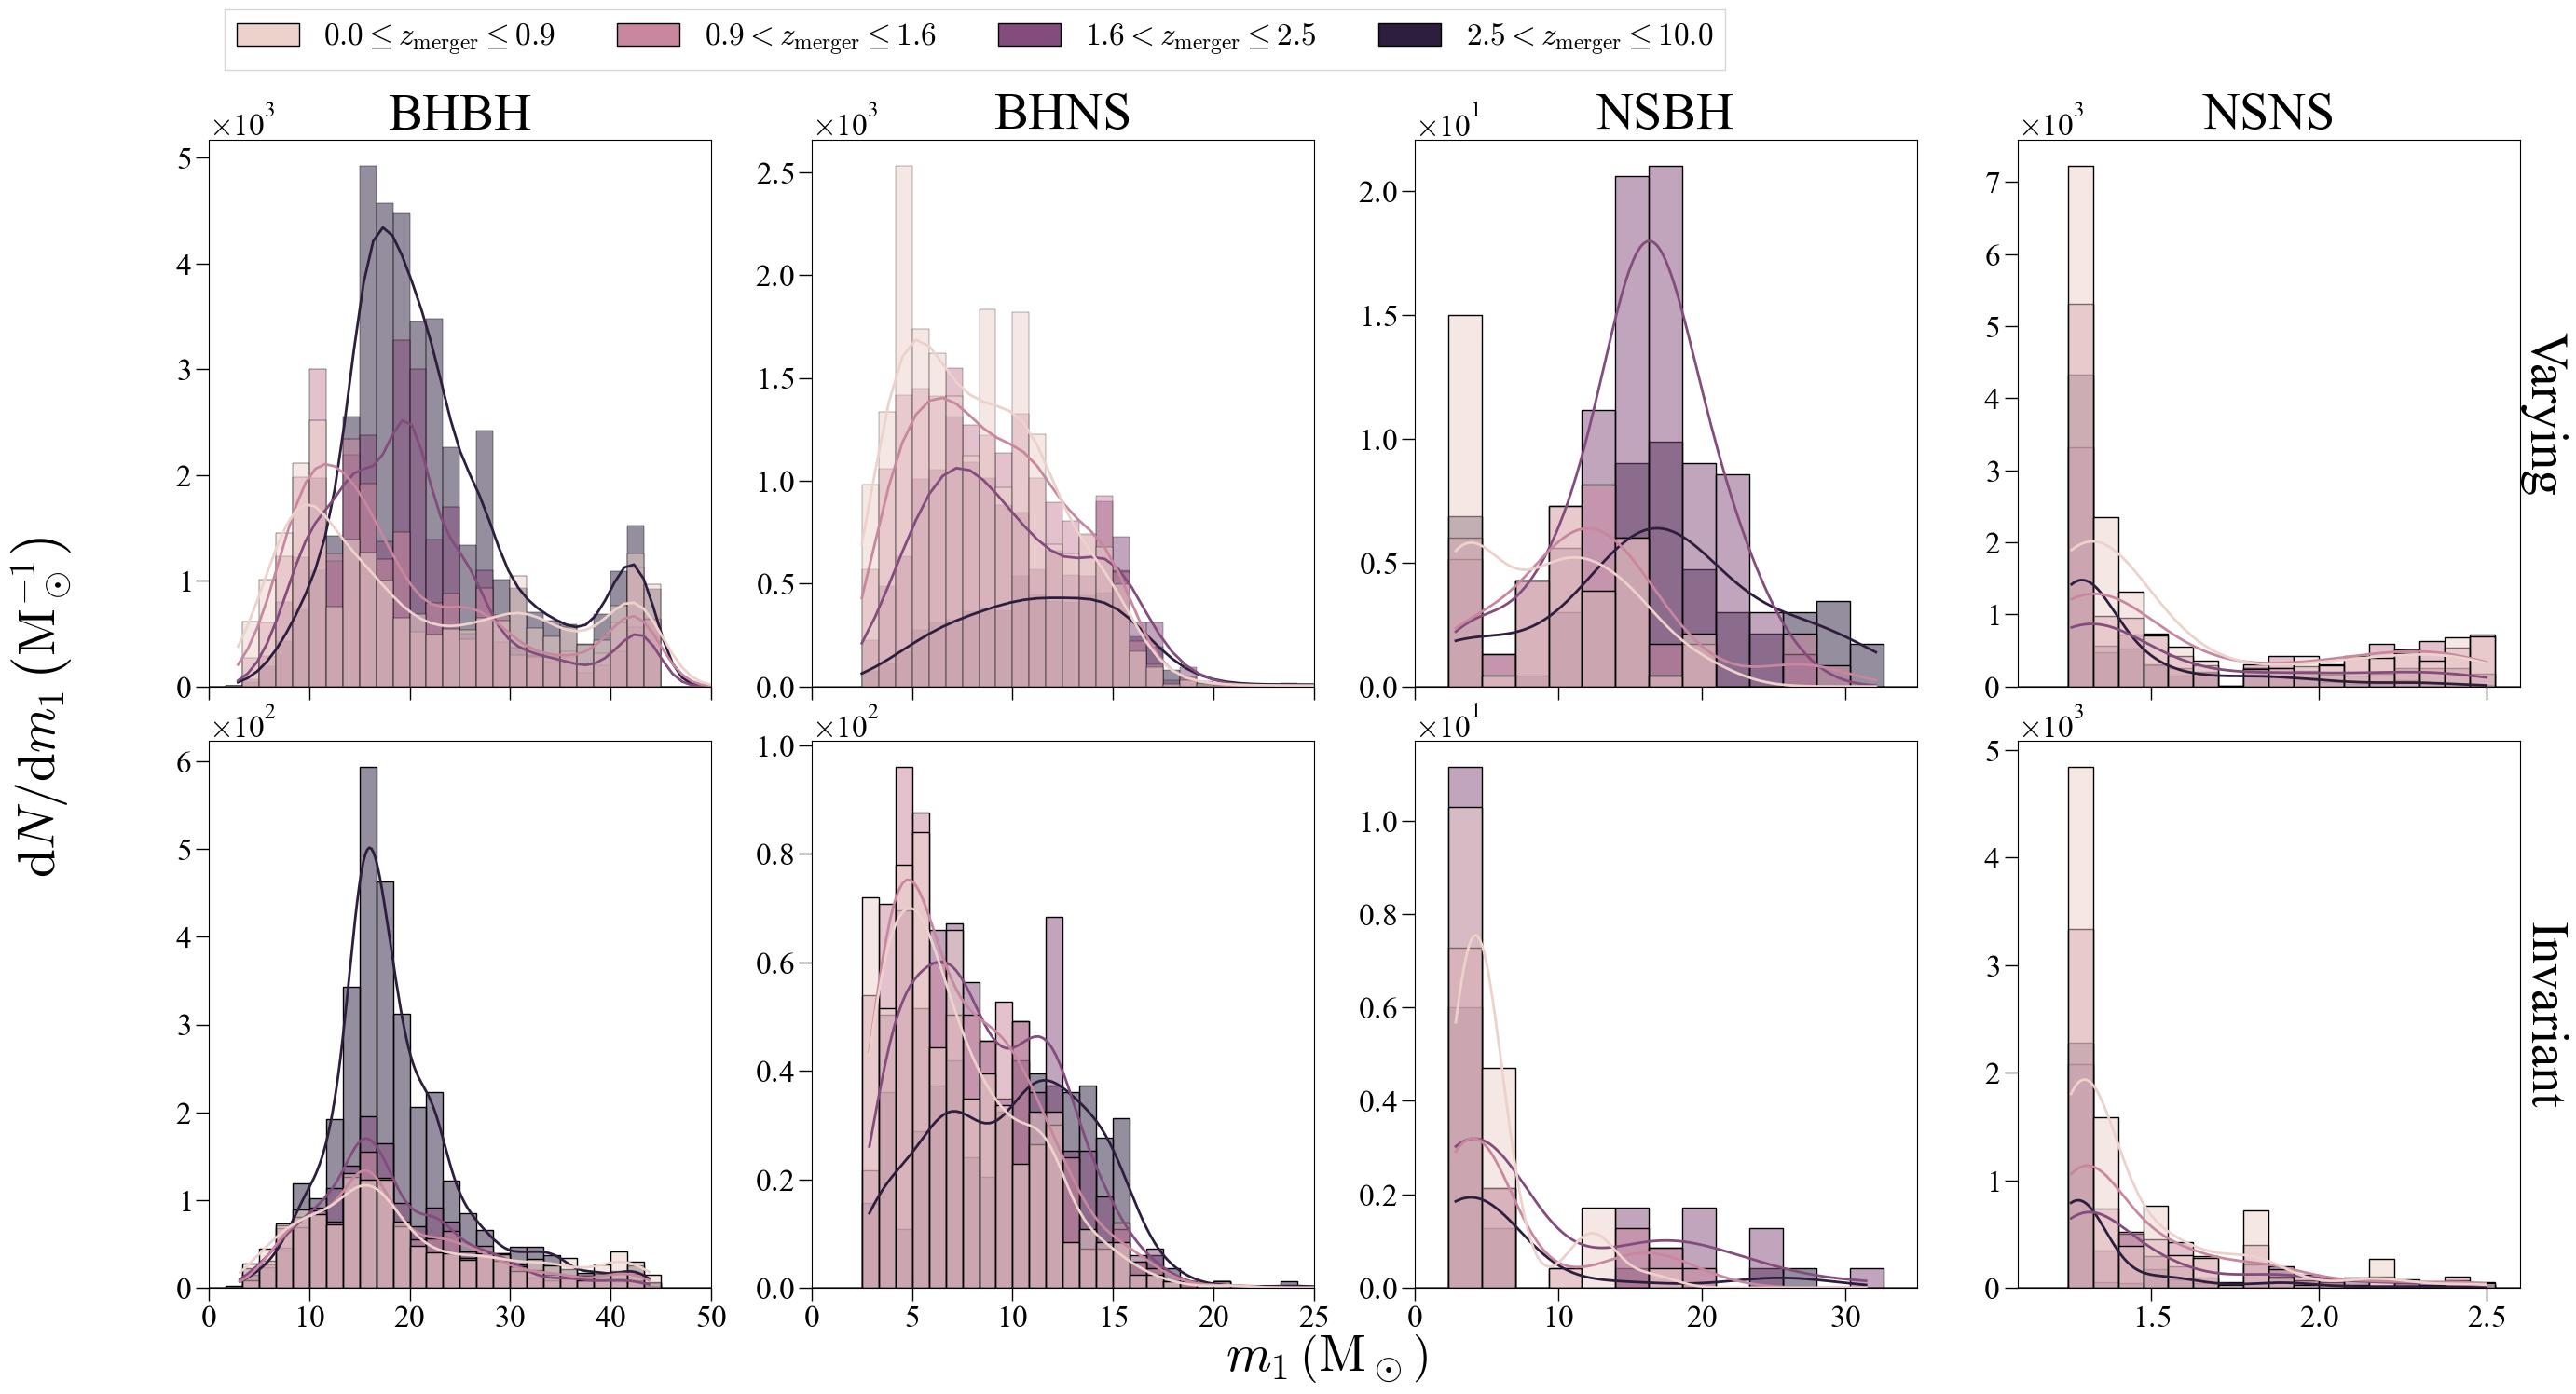

In [46]:
x='mco1'
hue='zmerger_bin'

fig, axes = plt.subplots(2, 4, figsize=(32, 16), sharex='col')
fig.subplots_adjust(hspace=0.1, wspace=0.2)
rect = fig.patch
rect.set_facecolor('white')
[[igimf_bhbh_ax, igimf_bhns_ax, igimf_nsbh_ax, igimf_nsns_ax],
 [canon_bhbh_ax, canon_bhns_ax, canon_nsbh_ax, canon_nsns_ax]] = axes
 
min_mbhbh = 0
max_mbhbh = 50
nbin_bhbh = 31

min_mbhns = 0
max_mbhns = 25
nbin_bhns = 31

min_mnsbh = 0
max_mnsbh = 35
nbin_nsbh = 16

min_mnsns = 1.1
max_mnsns = 2.6
nbin_nsns = 21

hue_order = sorted(np.unique(igimf_bhbh_df.zmerger_bin))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))

histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False,
                     'common_norm': False}

### IGIMF PLOTS ####

sns.histplot(igimf_bhbh_df,
             bins=np.linspace(min_mbhbh, max_mbhbh, nbin_bhbh),
             ax=igimf_bhbh_ax,
             kde_kws= {'bw_method': bhbh_kde_bw},
             **histplot_settings)
igimf_bhbh_ax.set_xlim(min_mbhbh, max_mbhbh)

sns.histplot(igimf_bhns_df,
             bins=np.linspace(min_mbhns, max_mbhns, nbin_bhns),
             ax=igimf_bhns_ax,
             kde_kws= {'bw_method': bhns_kde_bw},
             **histplot_settings)
igimf_bhns_ax.set_xlim(min_mbhns, max_mbhns)

sns.histplot(igimf_nsbh_df,
             bins=np.linspace(min_mnsbh, max_mnsbh, nbin_nsbh),
             ax=igimf_nsbh_ax,
             kde_kws= {'bw_method': nsbh_kde_bw},
             **histplot_settings)
igimf_nsbh_ax.set_xlim(min_mnsbh, max_mnsbh)

sns.histplot(igimf_nsns_df,
             bins=np.linspace(min_mnsns, max_mnsns, nbin_nsns),
             ax=igimf_nsns_ax,
             kde_kws= {'bw_method': nsns_kde_bw},
             **histplot_settings)
igimf_nsns_ax.set_xlim(min_mnsns, max_mnsns)

### CANON PLOTS ###

sns.histplot(canon_bhbh_df,
             bins=np.linspace(min_mbhbh, max_mbhbh, nbin_bhbh),
             ax=canon_bhbh_ax,
             kde_kws= {'bw_method': bhbh_kde_bw},
             **histplot_settings)
canon_bhbh_ax.set_xlim(min_mbhbh, max_mbhbh)

sns.histplot(canon_bhns_df,
             bins=np.linspace(min_mbhns, max_mbhns, nbin_bhns),
             ax=canon_bhns_ax,
             kde_kws= {'bw_method': bhns_kde_bw},
             **histplot_settings)
canon_bhns_ax.set_xlim(min_mbhns, max_mbhns)

sns.histplot(canon_nsbh_df,
             bins=np.linspace(min_mnsbh, max_mnsbh, nbin_nsbh),
             ax=canon_nsbh_ax,
             kde_kws= {'bw_method': nsbh_kde_bw},
             **histplot_settings)
canon_nsbh_ax.set_xlim(min_mnsbh, max_mnsbh)

sns.histplot(canon_nsns_df,
             bins=np.linspace(min_mnsns, max_mnsns, nbin_nsns),
             ax=canon_nsns_ax,
             kde_kws= {'bw_method': nsns_kde_bw},
             **histplot_settings)
canon_nsns_ax.set_xlim(min_mnsns, max_mnsns)

### DECORATION ###

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(which='both', axis='both', labelsize=24)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.ticklabel_format(axis='both', useMathText=True)
    
    
handles = []
for hue, color in zip(hue_order, palette):
    llim, ulim = zmerger_lims[hue:hue+2]
    if llim == 0.0:
        label = f'${llim:.1f}\\leq z_\\mathrm{{merger}}\\leq{ulim:.1f}$'
    else:
        label = f'${llim:.1f}< z_\\mathrm{{merger}}\\leq{ulim:.1f}$'
    handle = Patch(facecolor=color, edgecolor='k', fill=True,
                   label=label)
    handles.append(handle)
igimf_bhbh_ax.legend(handles=handles,
                     loc='lower left',
                     bbox_to_anchor=(0,1.1),
                     fancybox=False,
                     frameon=True,
                     ncol=6,
                     fontsize=24)

fig.text(0.08, 0.5, '$\\mathrm{d}N/\\mathrm{d}m_1\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$', rotation=90, va='center', ha='right', transform=fig.transFigure, fontsize=40)
fig.text(0.5, 0.08, '$m_1\\,\\left(\\mathrm{M}_\\odot\\right)$', ha='center', va='top', transform=fig.transFigure, fontsize=40)

igimf_bhbh_ax.text(0.5, 1, 'BHBH', ha='center', va='bottom', transform=igimf_bhbh_ax.transAxes, fontsize=40)
igimf_bhns_ax.text(0.5, 1, 'BHNS', ha='center', va='bottom', transform=igimf_bhns_ax.transAxes, fontsize=40)
igimf_nsbh_ax.text(0.5, 1, 'NSBH', ha='center', va='bottom', transform=igimf_nsbh_ax.transAxes, fontsize=40)
igimf_nsns_ax.text(0.5, 1, 'NSNS', ha='center', va='bottom', transform=igimf_nsns_ax.transAxes, fontsize=40)

igimf_nsns_ax.text(1, 0.5, 'Varying', rotation=-90, ha='left', va='center', transform=igimf_nsns_ax.transAxes, fontsize=40)
canon_nsns_ax.text(1, 0.5, 'Invariant', rotation=-90, ha='left', va='center', transform=canon_nsns_ax.transAxes, fontsize=40)

#for ax in axes.flatten():
    #ax.vlines(18, 0, 1)

plt.savefig(FIGURE_FOLDER/'zmerger_mco1.png', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'zmerger_mco1.pdf', bbox_inches='tight')

Figure 7 of the paper.

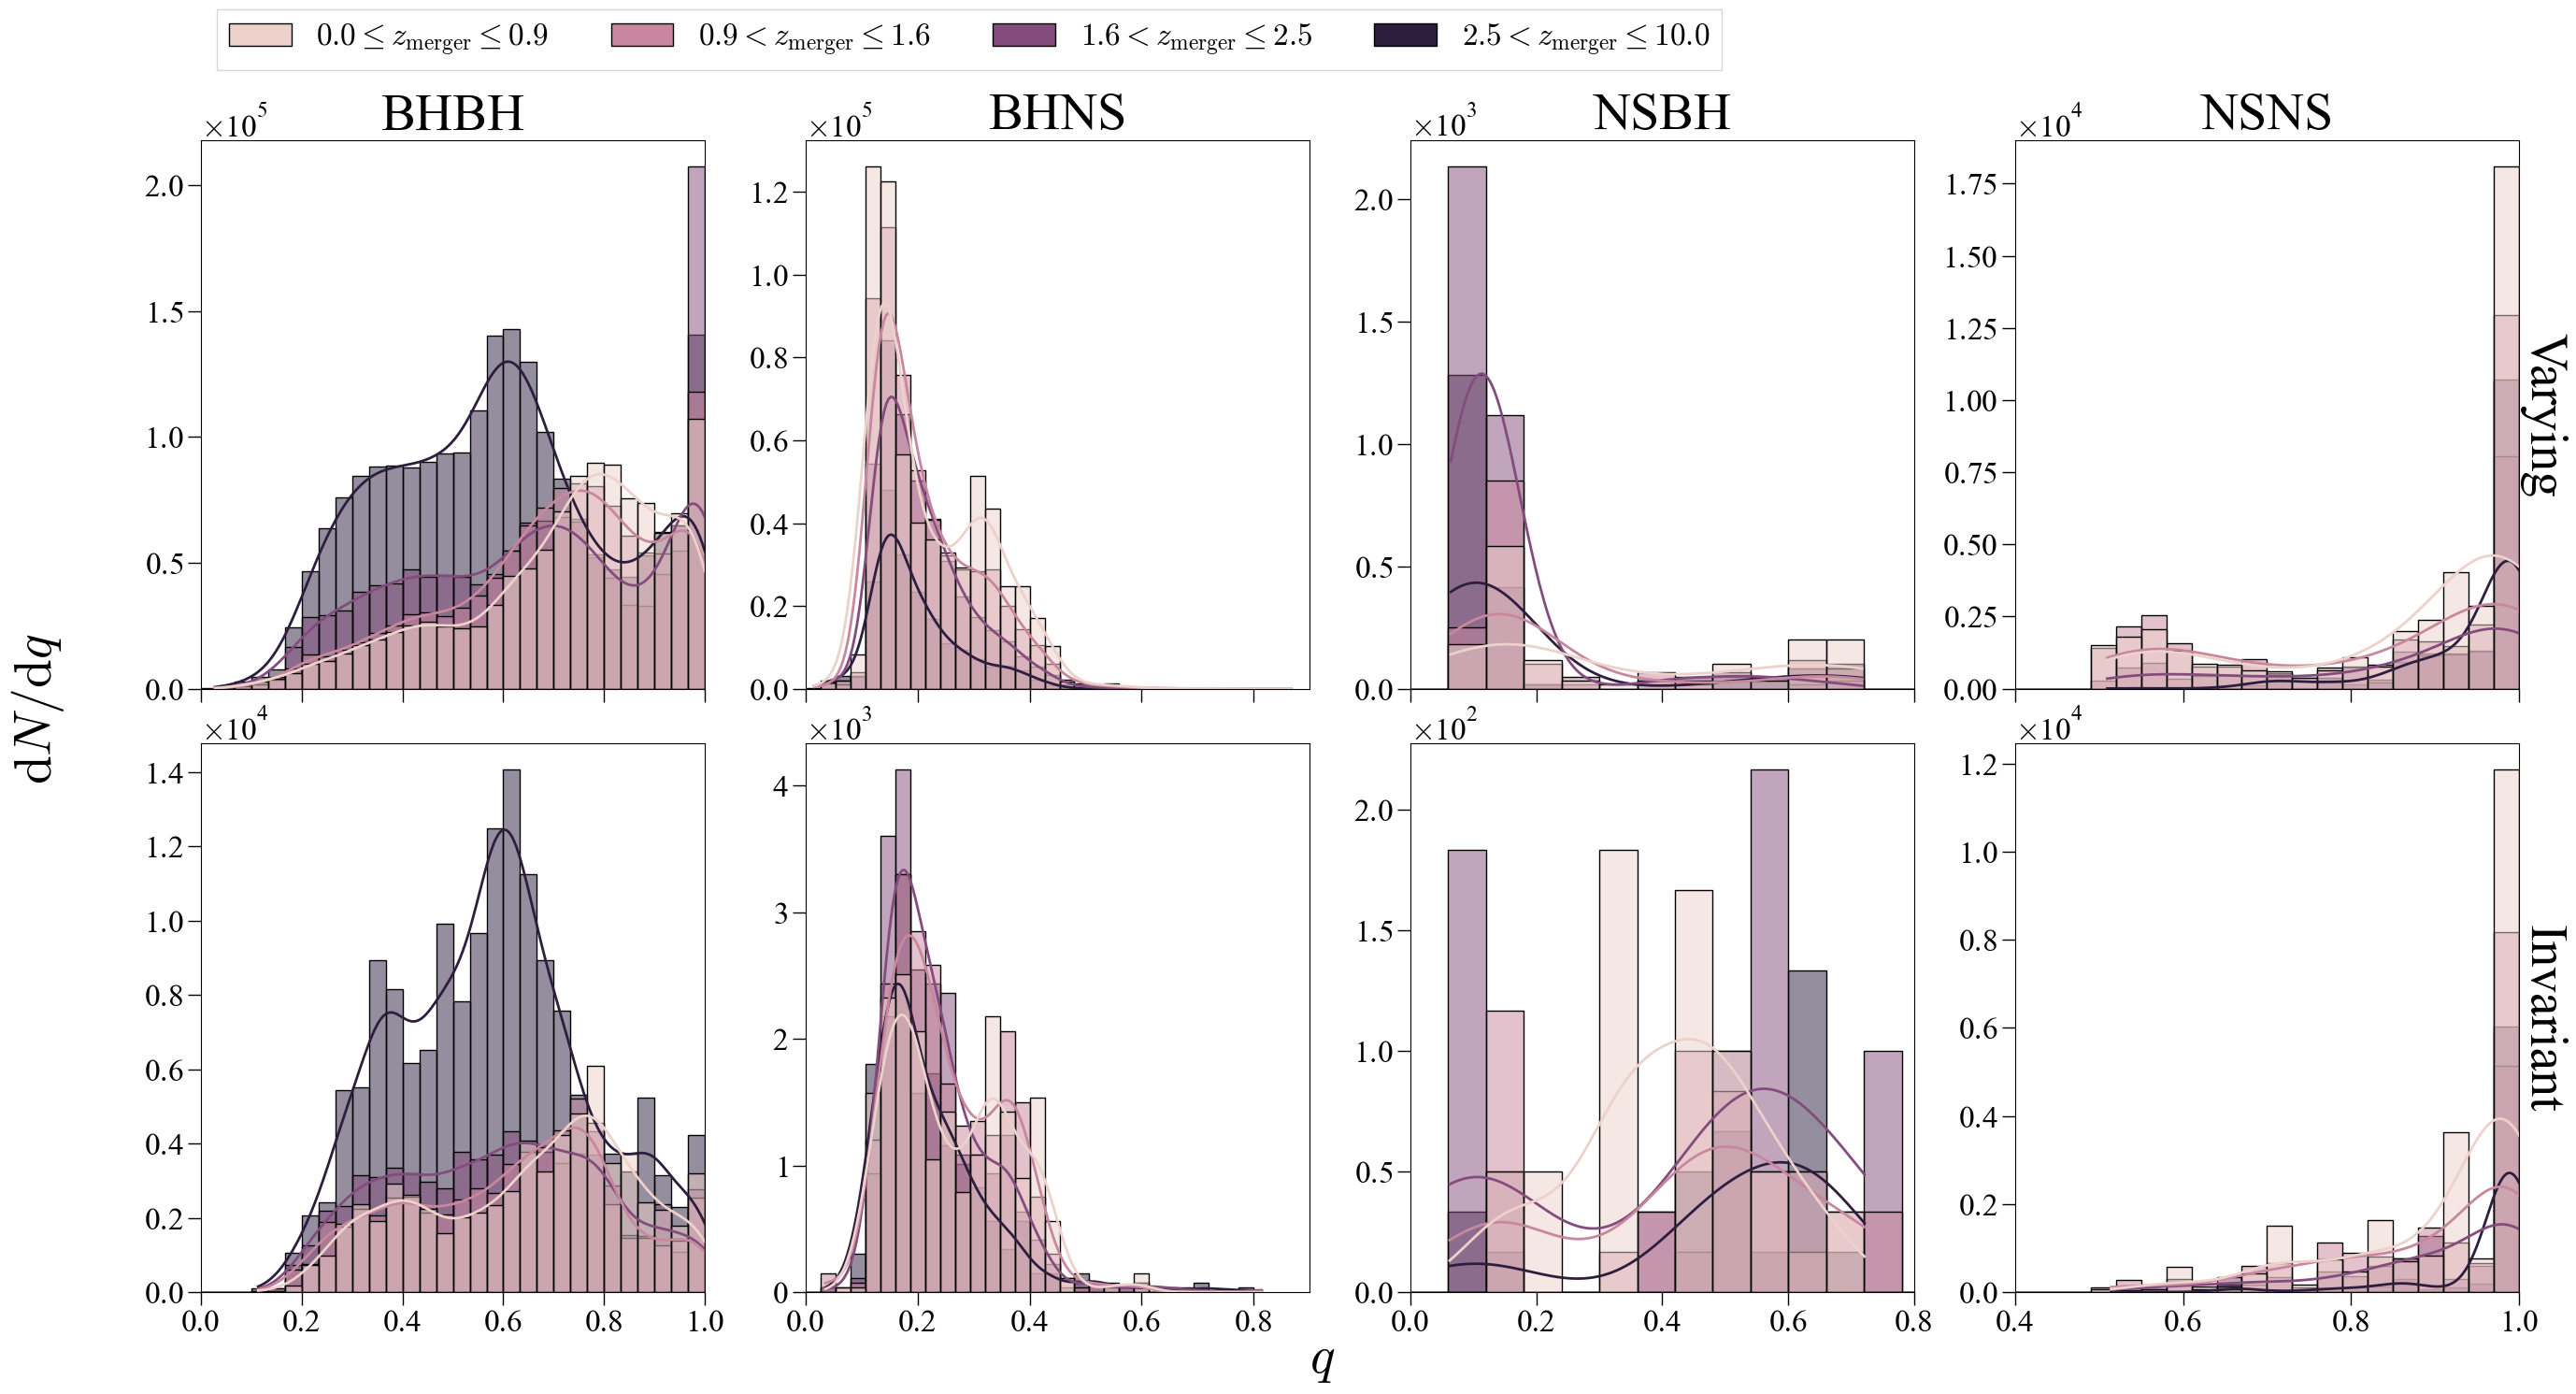

In [48]:
x='q'
hue='zmerger_bin'

fig, axes = plt.subplots(2, 4, figsize=(32, 16), sharex='col')
fig.subplots_adjust(hspace=0.1, wspace=0.2)
rect = fig.patch
rect.set_facecolor('white')
[[igimf_bhbh_ax, igimf_bhns_ax, igimf_nsbh_ax, igimf_nsns_ax],
 [canon_bhbh_ax, canon_bhns_ax, canon_nsbh_ax, canon_nsns_ax]] = axes
 
bhbh_min, bhbh_max = (0, 1)
bhns_min, bhns_max = (0, 0.9)
nsbh_min, nsbh_max = (0, 0.8)
nsns_min, nsns_max = (0.4, 1)

bhbh_bins = np.linspace(bhbh_min, bhbh_max, 31)
nsbh_bins = np.linspace(bhns_min, bhns_max, 16)
bhns_bins = np.linspace(nsbh_min, nsbh_max, 31)
nsns_bins = np.linspace(nsns_min, nsns_max, 21)

for ax in axes[1]:
    ax.set_xticks(np.arange(0, 1.2, 0.2))
    ax.set_xticklabels([f'{x:.1f}' for x in np.arange(0, 1.2, 0.2)])

hue_order = sorted(np.unique(igimf_bhbh_df.zmerger_bin))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))

histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False,
                     'log_scale' : False,
                     'common_norm': False}

### IGIMF PLOTS ####

sns.histplot(igimf_bhbh_df,
             bins=bhbh_bins,
             ax=igimf_bhbh_ax,
             kde_kws={'bw_method': bhbh_kde_bw},
             **histplot_settings)
igimf_bhbh_ax.set_xlim(bhbh_min, bhbh_max)

sns.histplot(igimf_bhns_df,
             bins=bhns_bins,
             ax=igimf_bhns_ax,
             kde_kws={'bw_method': bhns_kde_bw},
             **histplot_settings)
igimf_bhns_ax.set_xlim(bhns_min, bhns_max)

sns.histplot(igimf_nsbh_df,
             bins=nsbh_bins,
             ax=igimf_nsbh_ax,
             kde_kws={'bw_method': nsbh_kde_bw},
             **histplot_settings)
igimf_nsbh_ax.set_xlim(nsbh_min, nsbh_max)

sns.histplot(igimf_nsns_df,
             bins=nsns_bins,
             ax=igimf_nsns_ax,
             kde_kws={'bw_method': nsns_kde_bw},
             **histplot_settings)
igimf_nsns_ax.set_xlim(nsns_min, nsns_max)

### CANON PLOTS ###

sns.histplot(canon_bhbh_df,
             bins=bhbh_bins,
             ax=canon_bhbh_ax,
             kde_kws={'bw_method': bhbh_kde_bw},
             **histplot_settings)
canon_bhbh_ax.set_xlim(bhbh_min, bhbh_max)

sns.histplot(canon_bhns_df,
             bins=bhns_bins,
             ax=canon_bhns_ax,
             kde_kws={'bw_method': bhns_kde_bw},
             **histplot_settings)
canon_bhns_ax.set_xlim(bhns_min, bhns_max)

sns.histplot(canon_nsbh_df,
             bins=nsbh_bins,
             ax=canon_nsbh_ax,
             kde_kws={'bw_method': nsbh_kde_bw},
             **histplot_settings)
canon_nsbh_ax.set_xlim(nsbh_min, nsbh_max)

sns.histplot(canon_nsns_df,
             bins=nsns_bins,
             ax=canon_nsns_ax,
             kde_kws={'bw_method': nsns_kde_bw},
             **histplot_settings)
canon_nsns_ax.set_xlim(nsns_min, nsns_max)



### DECORATION ###

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.tick_params(which='both', axis='both', labelsize=24)
    ax.ticklabel_format(axis='y', useMathText=True)

handles = []
for hue, color in zip(hue_order, palette):
    llim, ulim = zmerger_lims[hue:hue+2]
    if llim == 0.0:
        label = f'${llim:.1f}\\leq z_\\mathrm{{merger}}\\leq{ulim:.1f}$'
    else:
        label = f'${llim:.1f}< z_\\mathrm{{merger}}\\leq{ulim:.1f}$'
    handle = Patch(facecolor=color, edgecolor='k', fill=True,
                   label=label)
    handles.append(handle)
    
igimf_bhbh_ax.legend(handles=handles,
                     loc='lower left',
                     bbox_to_anchor=(0,1.1),
                     fancybox=False,
                     frameon=True,
                     ncol=6,
                     fontsize=24)

fig.text(0.08, 0.5, '$\\mathrm{d}N/\\mathrm{d}q$', rotation=90, va='center', ha='right', transform=fig.transFigure, fontsize=40)
fig.text(0.5, 0.08, '$q$', ha='center', va='top', transform=fig.transFigure, fontsize=40)

igimf_bhbh_ax.text(0.5, 1, 'BHBH', ha='center', va='bottom', transform=igimf_bhbh_ax.transAxes, fontsize=40)
igimf_bhns_ax.text(0.5, 1, 'BHNS', ha='center', va='bottom', transform=igimf_bhns_ax.transAxes, fontsize=40)
igimf_nsbh_ax.text(0.5, 1, 'NSBH', ha='center', va='bottom', transform=igimf_nsbh_ax.transAxes, fontsize=40)
igimf_nsns_ax.text(0.5, 1, 'NSNS', ha='center', va='bottom', transform=igimf_nsns_ax.transAxes, fontsize=40)

igimf_nsns_ax.text(1, 0.5, 'Varying', rotation=-90, ha='left', va='center', transform=igimf_nsns_ax.transAxes, fontsize=40)
canon_nsns_ax.text(1, 0.5, 'Invariant', rotation=-90, ha='left', va='center', transform=canon_nsns_ax.transAxes, fontsize=40)

plt.savefig(FIGURE_FOLDER/'zmerger_q.png', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'zmerger_q.pdf', bbox_inches='tight')

Figure 11 of the paper.

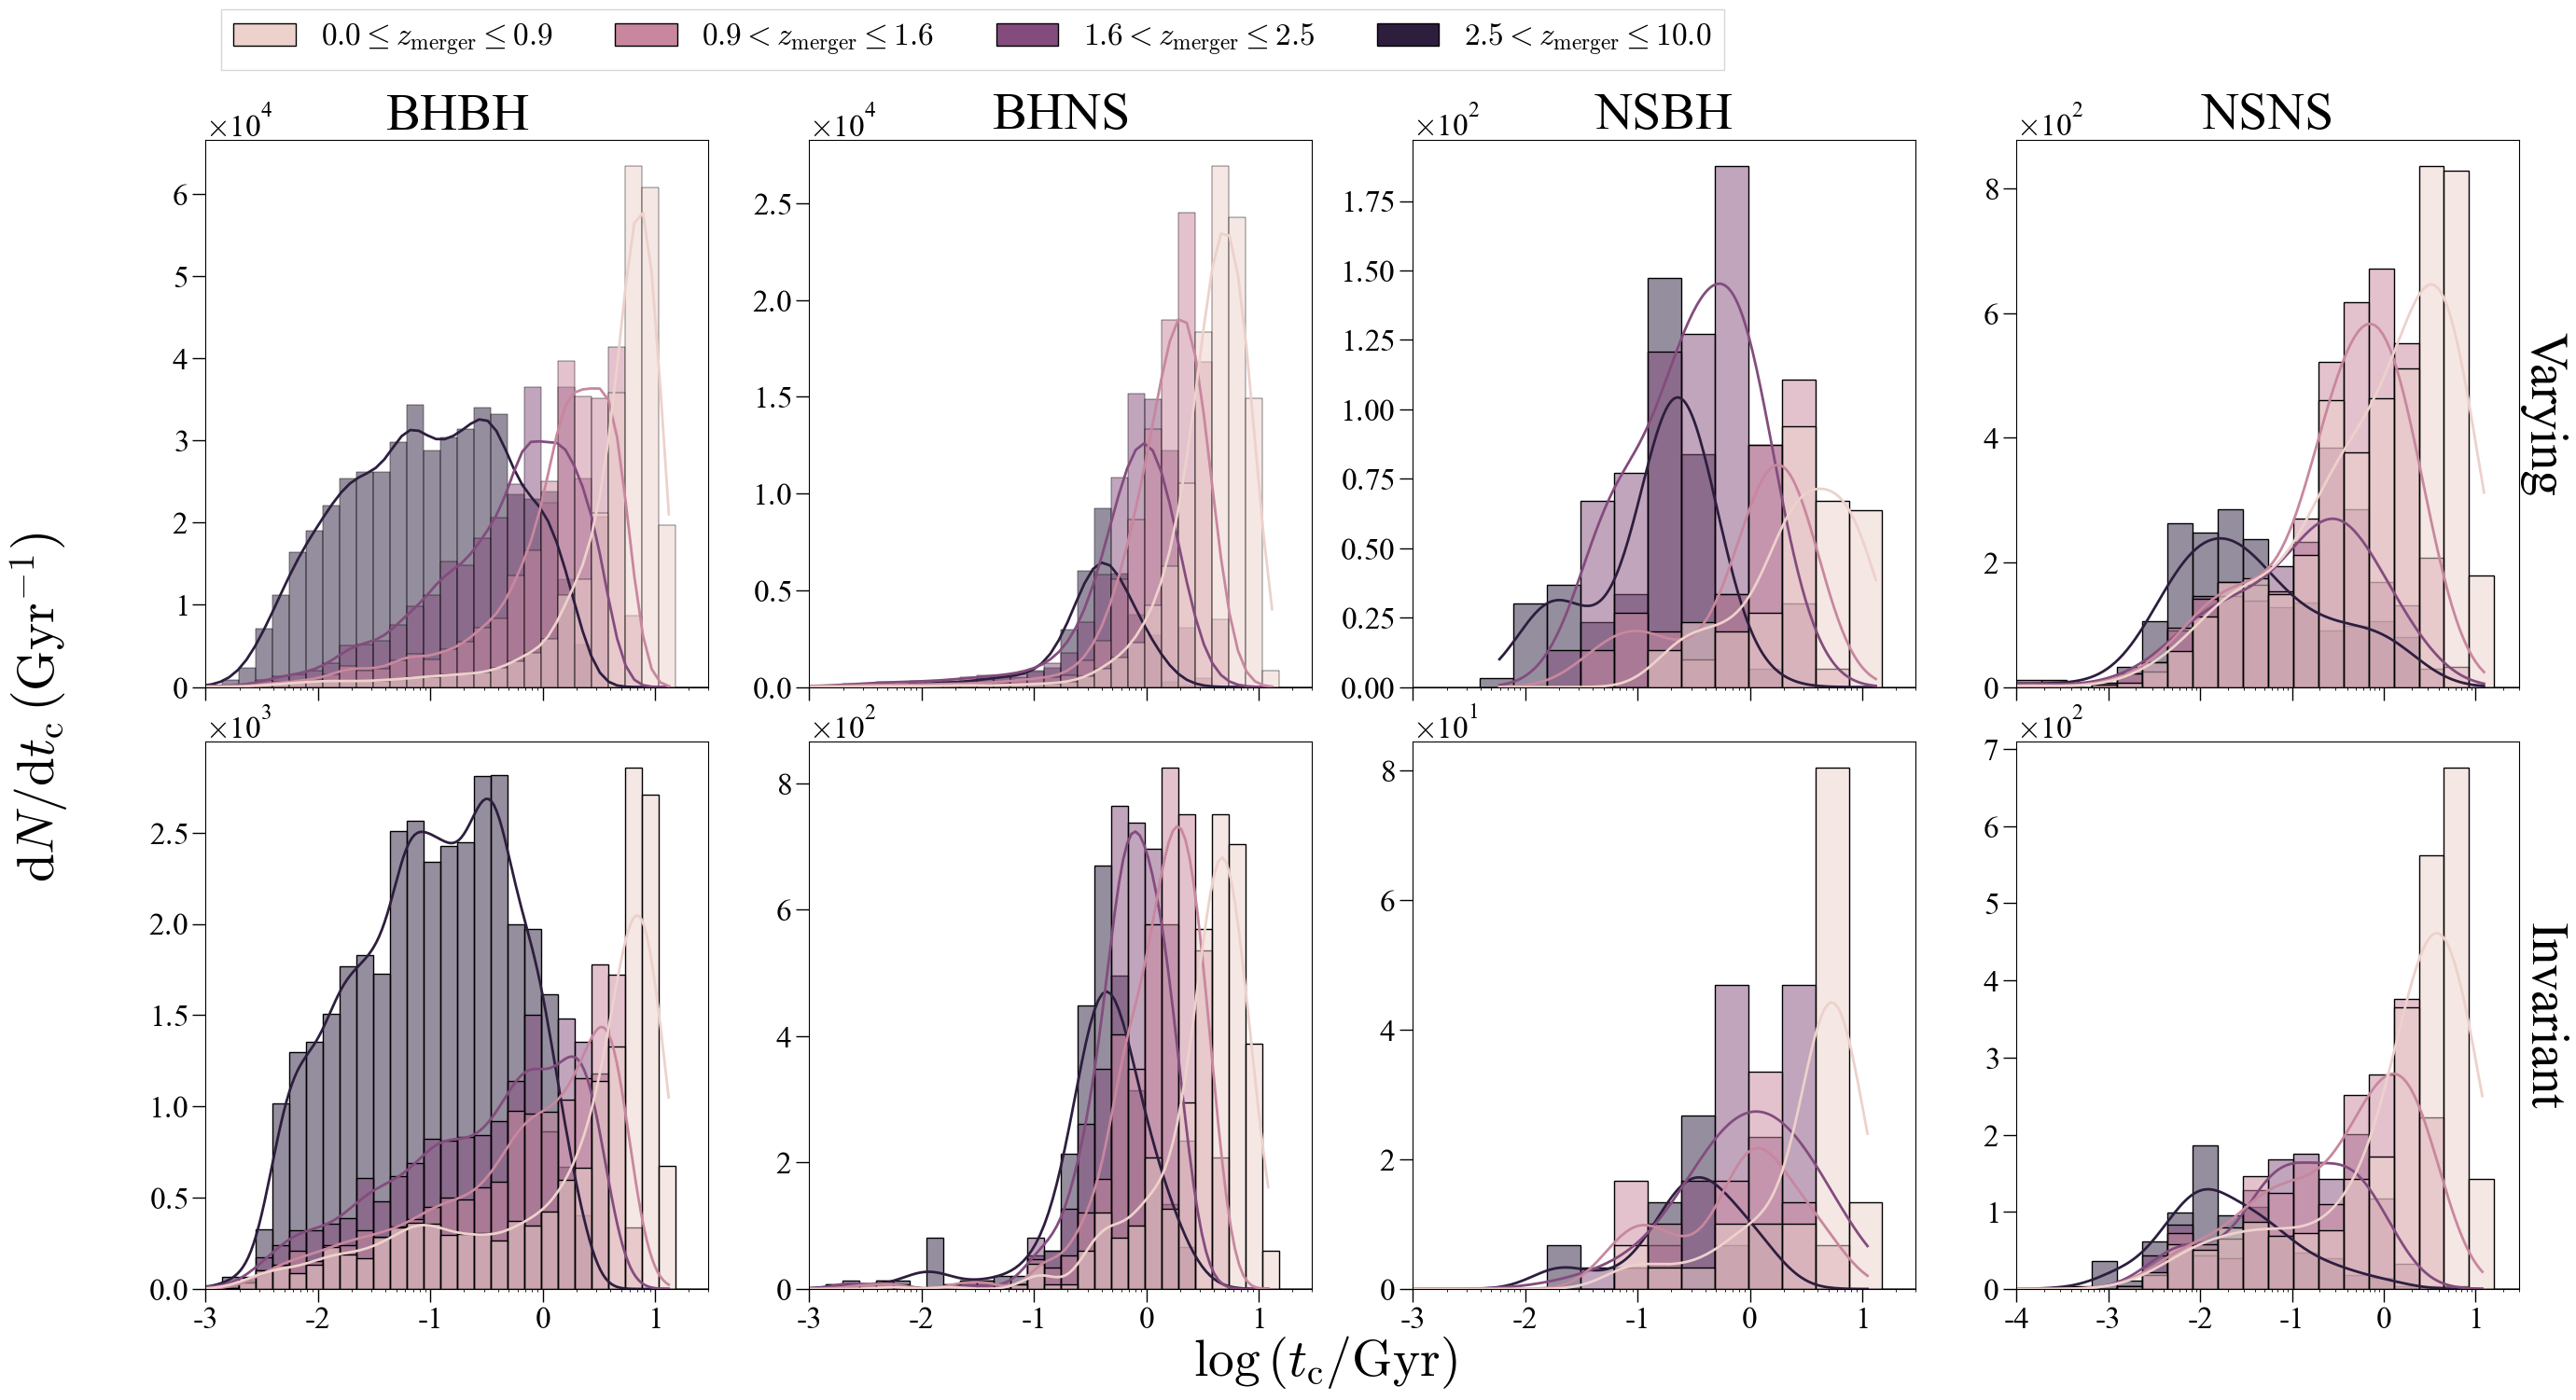

In [49]:
x='Coalescence_Time'
hue='zmerger_bin'

fig, axes = plt.subplots(2, 4, figsize=(32, 16), sharex='col')
fig.subplots_adjust(hspace=0.1, wspace=0.2)
rect = fig.patch
rect.set_facecolor('white')
[[igimf_bhbh_ax, igimf_bhns_ax, igimf_nsbh_ax, igimf_nsns_ax],
 [canon_bhbh_ax, canon_bhns_ax, canon_nsbh_ax, canon_nsns_ax]] = axes
 
bh_bins = np.linspace(-3, np.log10(3e1), 31)
bhns_bins = np.linspace(-3, np.log10(3e1), 31)
ns_bins = np.linspace(-4, np.log10(3e1), 21)
nsbh_bins = np.linspace(-3, np.log10(3e1), 16)
min_logt = 1e-3
max_logt= 3e1

hue_order = sorted(np.unique(igimf_bhbh_df.zmerger_bin))
palette = list(cm_cubehelix(np.linspace(0, 1, len(hue_order))))

histplot_settings = {'x': x,
                     'hue': hue,
                     'hue_order': hue_order,
                     'stat': 'frequency',
                     'palette': palette,
                     'kde': True,
                     'legend': False,
                     'log_scale' : True,
                     'common_norm': False}

### IGIMF PLOTS ####

sns.histplot(igimf_bhbh_df,
             bins=bh_bins,
             ax=igimf_bhbh_ax,
             kde_kws={'bw_method': bhbh_kde_bw},
             **histplot_settings)
igimf_bhbh_ax.set_xlim(min_logt, max_logt)

sns.histplot(igimf_bhns_df,
             bins=bhns_bins,
             ax=igimf_bhns_ax,
             kde_kws={'bw_method': bhns_kde_bw},
             **histplot_settings)
igimf_bhns_ax.set_xlim(min_logt, max_logt)

sns.histplot(igimf_nsbh_df,
             bins=nsbh_bins,
             ax=igimf_nsbh_ax,
             kde_kws={'bw_method': nsbh_kde_bw},
             **histplot_settings)
igimf_nsbh_ax.set_xlim(min_logt, max_logt)

sns.histplot(igimf_nsns_df,
             bins=ns_bins,
             ax=igimf_nsns_ax,
             kde_kws={'bw_method': nsns_kde_bw},
             **histplot_settings)
igimf_nsns_ax.set_xlim(1e-4, max_logt)

### CANON PLOTS ###

sns.histplot(canon_bhbh_df,
             bins=bh_bins,
             ax=canon_bhbh_ax,
             kde_kws={'bw_method': bhbh_kde_bw},
             **histplot_settings)
canon_bhbh_ax.set_xlim(min_logt, max_logt)

sns.histplot(canon_bhns_df,
             bins=bhns_bins,
             ax=canon_bhns_ax,
             kde_kws={'bw_method': bhns_kde_bw},
             **histplot_settings)
canon_bhns_ax.set_xlim(min_logt, max_logt)

sns.histplot(canon_nsbh_df,
             bins=nsbh_bins,
             ax=canon_nsbh_ax,
             kde_kws={'bw_method': nsbh_kde_bw},
             **histplot_settings)
canon_nsbh_ax.set_xlim(min_logt, max_logt)

sns.histplot(canon_nsns_df,
             bins=ns_bins,
             ax=canon_nsns_ax,
             kde_kws={'bw_method': nsns_kde_bw},
             **histplot_settings)
canon_nsns_ax.set_xlim(1e-4, max_logt)

### DECORATION ###

for ax in axes.flatten():
    ax.set_ylim(0)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.tick_params(which='both', axis='both', labelsize=24)
    ax.ticklabel_format(axis='y', useMathText=True)

for ax in axes[1]:
    ax.set_xticks([1e-3,1e-2,1e-1,1e0,1e1])
    ax.set_xticklabels([str(x) for x in [-3,-2,-1,0,1]])
    
axes[1,-1].set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1])
axes[1,-1].set_xticklabels([str(x) for x  in np.arange(-4, 2, 1)])
    
    
handles = []
for hue, color in zip(hue_order, palette):
    llim, ulim = zmerger_lims[hue:hue+2]
    if llim == 0.0:
        label = f'${llim:.1f}\\leq z_\\mathrm{{merger}}\\leq{ulim:.1f}$'
    else:
        label = f'${llim:.1f}< z_\\mathrm{{merger}}\\leq{ulim:.1f}$'
    handle = Patch(facecolor=color, edgecolor='k', fill=True,
                   label=label)
    handles.append(handle)
igimf_bhbh_ax.legend(handles=handles,
                     loc='lower left',
                     bbox_to_anchor=(0,1.1),
                     fancybox=False,
                     frameon=True,
                     ncol=6,
                     fontsize=24)

fig.text(0.08, 0.5, '$\\mathrm{d}N/\\mathrm{d}t_\\mathrm{c}\\,\\left(\\mathrm{Gyr}^{-1}\\right)$', rotation=90, va='center', ha='right', transform=fig.transFigure, fontsize=40)
fig.text(0.5, 0.08, '$\\log\\left(t_\\mathrm{c}/\\mathrm{Gyr}\\right)$', ha='center', va='top', transform=fig.transFigure, fontsize=40)

igimf_bhbh_ax.text(0.5, 1, 'BHBH', ha='center', va='bottom', transform=igimf_bhbh_ax.transAxes, fontsize=40)
igimf_bhns_ax.text(0.5, 1, 'BHNS', ha='center', va='bottom', transform=igimf_bhns_ax.transAxes, fontsize=40)
igimf_nsbh_ax.text(0.5, 1, 'NSBH', ha='center', va='bottom', transform=igimf_nsbh_ax.transAxes, fontsize=40)
igimf_nsns_ax.text(0.5, 1, 'NSNS', ha='center', va='bottom', transform=igimf_nsns_ax.transAxes, fontsize=40)

igimf_nsns_ax.text(1, 0.5, 'Varying', rotation=-90, ha='left', va='center', transform=igimf_nsns_ax.transAxes, fontsize=40)
canon_nsns_ax.text(1, 0.5, 'Invariant', rotation=-90, ha='left', va='center', transform=canon_nsns_ax.transAxes, fontsize=40)

plt.savefig(FIGURE_FOLDER/'zmerger_tcoal.png', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'zmerger_tcoal.pdf', bbox_inches='tight')

# Final x ZAMS properties

#### The $z_\mathrm{ZAMS}=10$ NSNS sample

In [70]:
igimf_nsns_df[igimf_nsns_df.Redshift_ZAMS == 10].describe()

m_psn1      m_psn2  Redshift_Merger  Coalescence_Time         FeH  \
count  235.000000  235.000000       235.000000        235.000000  235.000000   
mean     1.334014    1.393730         7.508240          0.983573   -3.177915   
std      0.196986    0.250966         3.287503          2.188247    0.586013   
min      1.260000    1.271043         0.070499          0.000017   -4.578000   
25%      1.260202    1.277583         4.554299          0.012574   -3.235000   
50%      1.277603    1.277583         9.509592          0.034007   -2.995000   
75%      1.277639    1.378225         9.812116          0.856561   -2.799000   
max      2.458247    2.467550         9.999735         12.343410   -2.621000   

           LogSFR      mzams1      mzams2   logp_zams      e_zams  SystemMass  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     0.877672    9.922663    9.020715    3.007684    0.501808   18.943377   
std      0.718901    2.046797    2.351978    1.424935    0.392835    4.229406   
min     -0.775000    6.902306    6.511881    0.944824    0.000000   13.428631   
25%      0.737000    8.679639    7.706710    1.206055    0.000000   17.114114   
50%      1.056000    9.895637    8.546586    3.259766    0.580581   17.596031   
75%      1.358000    9.895637    9.098544    3.843750    0.879880   18.742809   
max      1.700000   18.226641   18.206955    6.335938    0.991992   36.433594   

             mco1        mco2           q       qzams       logtc  \
count  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     1.405699    1.322044    0.951823    0.909801   -1.122716   
std      0.269117    0.166252    0.077760    0.123184    1.085703   
min      1.271685    1.260000    0.574446    0.616251   -4.760841   
25%      1.277583    1.260202    0.935703    0.778799   -1.900736   
50%      1.277623    1.277583    0.986366    0.998470   -1.468434   
75%      1.398987    1.277634    0.999948    0.998830   -0.067265   
max      2.467550    2.118000    1.000000    0.999280    1.091435   

            feh_dev  
count  2.350000e+02  
mean   8.546826e-04  
std    5.797630e-04  
min    3.667978e-08  
25%    3.572616e-04  
50%    4.368570e-04  
75%    1.468420e-03  
max    1.669487e-03

In [71]:
canon_nsns_df[canon_nsns_df.Redshift_ZAMS == 10].Coalescence_Time.value_counts()

Coalescence_Time
0.012241    20
0.034743    10
0.001206    10
0.025936    10
0.006299    10
Name: count, dtype: int64

In [72]:
canon_nsns_df[canon_nsns_df.Redshift_ZAMS == 10].mzams1.value_counts()

mzams1
9.895637     40
12.510977    10
9.085790     10
Name: count, dtype: int64

In [73]:
igimf_nsns_df[igimf_nsns_df.Redshift_ZAMS == 10].mzams1.value_counts()

mzams1
9.895637     65
10.177803    24
8.563543     22
9.085790     17
9.379636     17
8.202661     12
8.342242      8
7.965127      8
8.795734      8
8.993654      8
10.866422     5
7.769849      5
14.660910     4
10.347973     3
17.396336     3
12.778876     3
15.883780     3
9.650743      3
16.533298     2
14.188208     2
12.119000     2
17.028500     2
7.363456      2
11.769077     2
13.734359     1
18.226641     1
7.201336      1
16.759930     1
6.902306      1
Name: count, dtype: int64

In [74]:
canon_nsns_df[canon_nsns_df.Redshift_ZAMS == 10].logp_zams.value_counts()

logp_zams
1.014648    20
1.125000    20
3.115234    10
2.548828    10
Name: count, dtype: int64

Figure 9 of the paper.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


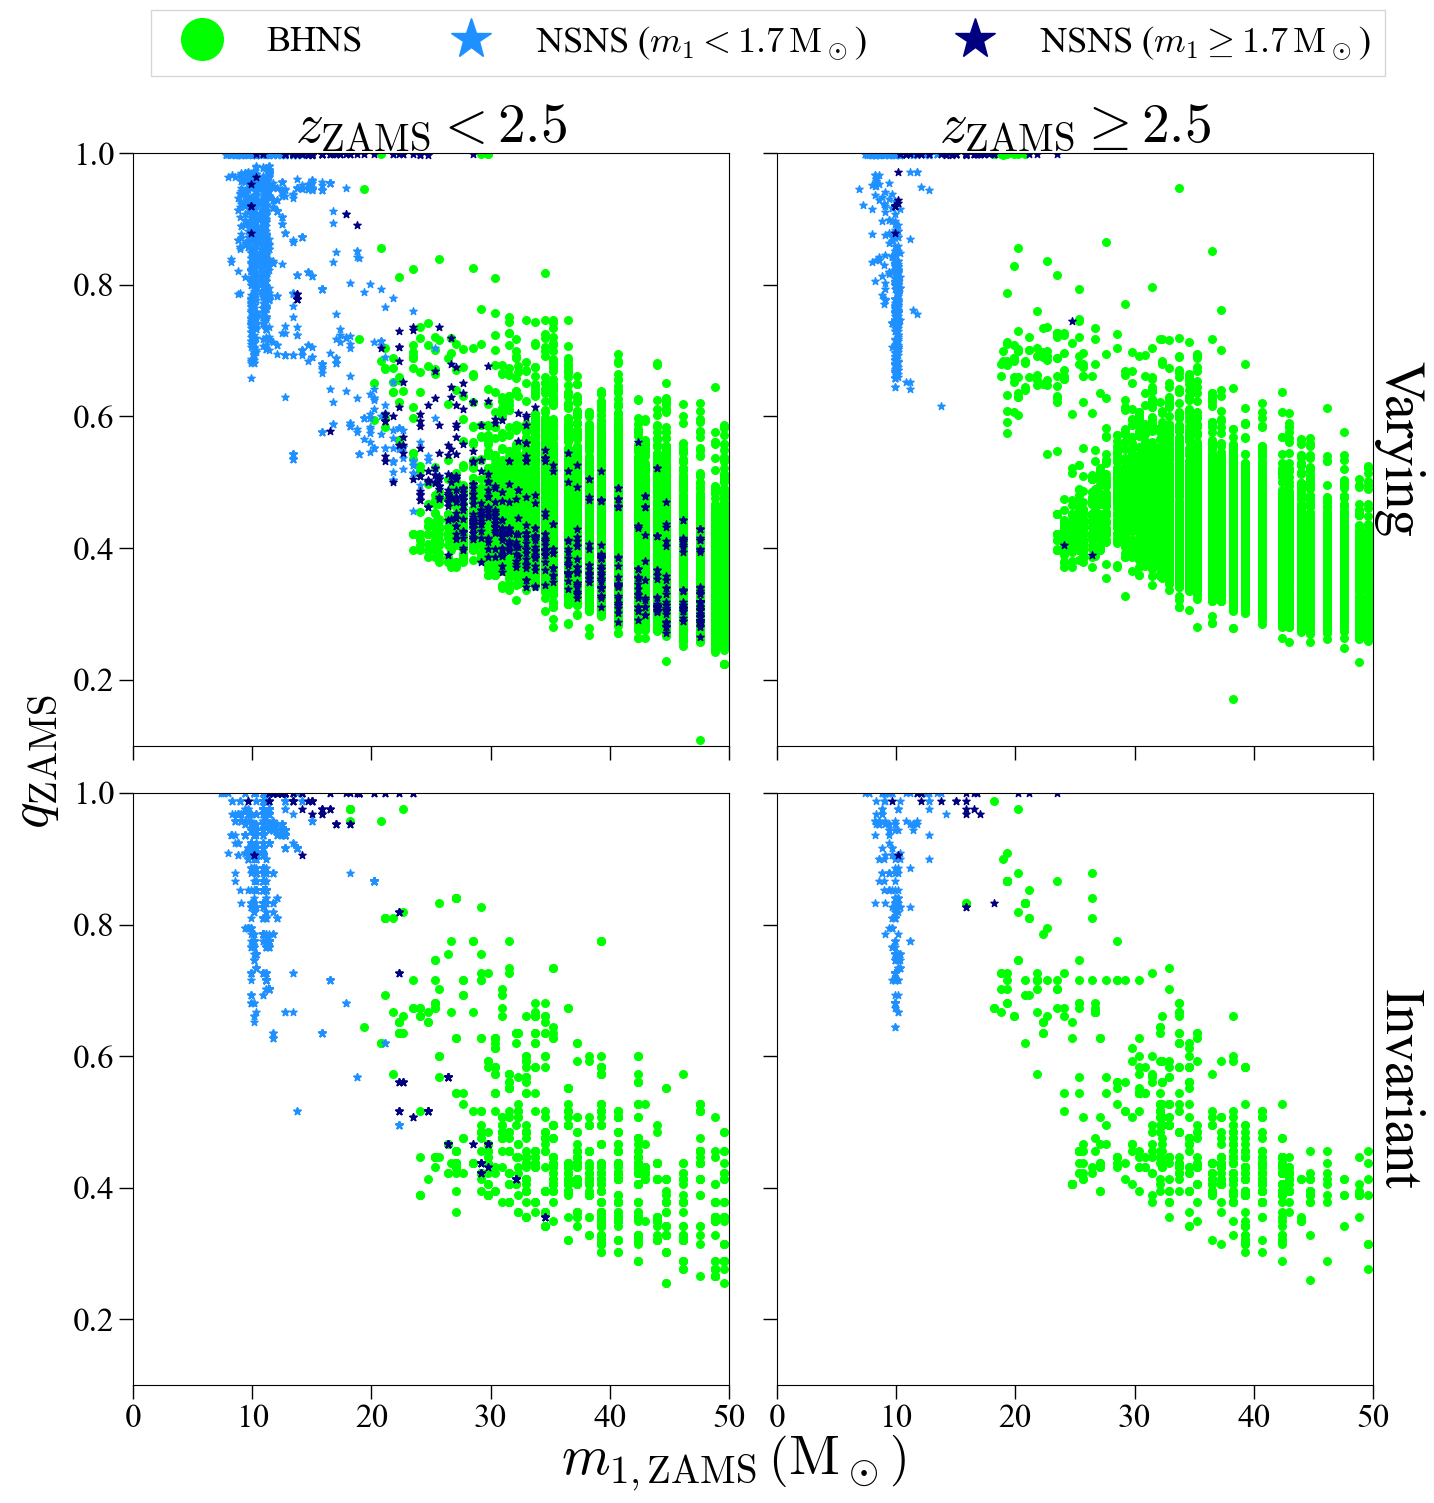

In [50]:
x = 'mzams1'
y = 'qzams'

fig, axes_ = plt.subplots(2, 2, figsize=(16,16), sharey=True, sharex=True)
axes_igimf, axes_canon = axes_
plt.subplots_adjust(wspace=0.08, hspace=0.08)

s = 30
s2 = 30
a = 1
m = 'o'
m2 = '*'
rasterized = True

#### IGIMF ####
axes = axes_igimf

df = igimf_bhns_df
df.Redshift_ZAMS = df.Redshift_ZAMS.astype('float16')
c = 'lime'
df[df.Redshift_ZAMS < 2.5].plot.scatter(x=x, y=y, ax=axes[0], s=s, c=c, alpha=a, marker=m, rasterized=rasterized)
df[df.Redshift_ZAMS >= 2.5].plot.scatter(x=x, y=y, ax=axes[1], s=s, c=c, alpha=a, marker=m, rasterized=rasterized)

df = igimf_nsns_df
df.Redshift_ZAMS = df.Redshift_ZAMS.astype('float16')
c = 'dodgerblue'
c2 = 'navy'
subdf = df[df.Redshift_ZAMS < 2.5]
subdf[subdf.mco1 < 1.7].plot.scatter(x=x, y=y, ax=axes[0], s=s2, c=c, alpha=a, marker=m2, rasterized=rasterized)
subdf[subdf.mco1 >= 1.7].plot.scatter(x=x, y=y, ax=axes[0], s=s2, c=c2, alpha=a, marker=m2, rasterized=rasterized)
subdf = df[df.Redshift_ZAMS >= 2.5]
subdf[subdf.mco1 < 1.7].plot.scatter(x=x, y=y, ax=axes[1], s=s2, c=c, alpha=a, marker=m2, rasterized=rasterized)
subdf[subdf.mco1 >= 1.7].plot.scatter(x=x, y=y, ax=axes[1], s=s2, c=c2, alpha=a, marker=m2, rasterized=rasterized)

#### CANONICAL ####
axes = axes_canon

df = canon_bhns_df
df.Redshift_ZAMS = df.Redshift_ZAMS.astype('float16')
c = 'lime'
df[df.Redshift_ZAMS < 2.5].plot.scatter(x=x, y=y, ax=axes[0], s=s, c=c, alpha=a, marker=m, rasterized=rasterized)
df[df.Redshift_ZAMS >= 2.5].plot.scatter(x=x, y=y, ax=axes[1], s=s, c=c, alpha=a, marker=m, rasterized=rasterized)

df = canon_nsns_df
df.Redshift_ZAMS = df.Redshift_ZAMS.astype('float16')
c = 'dodgerblue'
c2 = 'navy'
subdf = df[df.Redshift_ZAMS < 2.5]
subdf[subdf.mco1 < 1.7].plot.scatter(x=x, y=y, ax=axes[0], s=s2, c=c, alpha=a, marker=m2, rasterized=rasterized)
subdf[subdf.mco1 >= 1.7].plot.scatter(x=x, y=y, ax=axes[0], s=s2, c=c2, alpha=a, marker=m2, rasterized=rasterized)
subdf = df[df.Redshift_ZAMS >= 2.5]
subdf[subdf.mco1 < 1.7].plot.scatter(x=x, y=y, ax=axes[1], s=s2, c=c, alpha=a, marker=m2, rasterized=rasterized)
subdf[subdf.mco1 >= 1.7].plot.scatter(x=x, y=y, ax=axes[1], s=s2, c=c2, alpha=a, marker=m2, rasterized=rasterized)

    
for ax in axes_canon:
    ax.set_xlabel('')
    ax.set_xlim(0, 50)
    
for ax in axes_[:,0]:
    ax.set_ylabel('')
    ax.set_ylim(.1, 1)
        
fig.text(0.08, 0.5, '$q_\\mathrm{ZAMS}$', rotation=90, ha='right', va='center', transform=fig.transFigure, fontsize=40)
fig.text(0.5, 0.08, '$m_{1,\\mathrm{ZAMS}}\\,\\left(\\mathrm{M}_\\odot\\right)$', ha='center', va='top', transform=fig.transFigure, fontsize=40)
    
axes_igimf[0].text(0.5, 1, '$z_\\mathrm{ZAMS}<2.5$', ha='center', va='bottom', transform=axes_igimf[0].transAxes, fontsize=40)
axes_igimf[1].text(0.5, 1, '$z_\\mathrm{ZAMS}\\geq2.5$', ha='center', va='bottom', transform=axes_igimf[1].transAxes, fontsize=40)
    
axes_igimf[-1].text(1, 0.5, 'Varying', rotation=-90, ha='left', va='center', transform=axes_igimf[-1].transAxes, fontsize=40)
axes_canon[-1].text(1, 0.5, 'Invariant', rotation=-90, ha='left', va='center', transform=axes_canon[-1].transAxes, fontsize=40)

handle1 = Line2D([1], [2], c='lime', marker='o', linestyle='', label='BHNS', markersize=s)
handle2 = Line2D([1], [2], c='dodgerblue', marker=m2, linestyle='', label='NSNS ($m_1<1.7\\,\\mathrm{M}_\\odot$)', markersize=s2)
handle3 = Line2D([1], [2], c='navy', marker=m2, linestyle='', label='NSNS ($m_1\\geq1.7\\,\\mathrm{M}_\\odot$)', markersize=s2)
handles = [handle1, handle2, handle3]

axes_igimf[0].legend(handles=handles,
                    loc='lower left',
                    bbox_to_anchor=(0,1.1),
                    frameon=True,
                    fancybox=False,
                    ncol=3,
                    fontsize=26)

plt.savefig(FIGURE_FOLDER/'nsns_scatter_mzams1_qzams_m1.pdf', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'nsns_scatter_mzams1_qzams_m1.eps', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'nsns_scatter_mzams1_qzams_m1.png', bbox_inches='tight')

## 2D histograms

In [51]:
igimf_bhbh_df.Redshift_ZAMS = igimf_bhbh_df.Redshift_ZAMS.astype('float16')
igimf_bhns_df.Redshift_ZAMS = igimf_bhns_df.Redshift_ZAMS.astype('float16')
igimf_nsbh_df.Redshift_ZAMS = igimf_nsbh_df.Redshift_ZAMS.astype('float16')
igimf_nsns_df.Redshift_ZAMS = igimf_nsns_df.Redshift_ZAMS.astype('float16')

canon_bhbh_df.Redshift_ZAMS = canon_bhbh_df.Redshift_ZAMS.astype('float16')
canon_bhns_df.Redshift_ZAMS = canon_bhns_df.Redshift_ZAMS.astype('float16')
canon_nsbh_df.Redshift_ZAMS = canon_nsbh_df.Redshift_ZAMS.astype('float16')
canon_nsns_df.Redshift_ZAMS = canon_nsns_df.Redshift_ZAMS.astype('float16')

In [52]:
def min_log10(x, min_=1e-1):
    if x < min_:
        return np.log10(min_)
    else:
        return np.log10(x)
    

def frequency_2d_histplot(df, x, y, xbins, ybins, logscale=False):
    hist = np.zeros((len(ybins)-1, len(xbins)-1), np.float64)
    
    for x_i, (x0, x1) in enumerate(zip(xbins[:-1], xbins[1:])):
        dx = x1 - x0
        subdf = df[(df[x] >= x0) & (df[x] < x1)]
        for y_i, (y0, y1) in enumerate(zip(ybins[:-1], ybins[1:])):
            dy = y1 - y0
            subsubdf = subdf[(subdf[y] >= y0) & (subdf[y] < y1)]
            dn = len(subsubdf)
            freq = dn / (dx*dy)
            hist[y_i, x_i] = freq
            
    if logscale:
        min_log10_ = np.vectorize(lambda x: min_log10(x, min_=hist[np.nonzero(hist)].min()))
        hist = min_log10_(hist)
        
    return hist

Figure 5 of the paper.

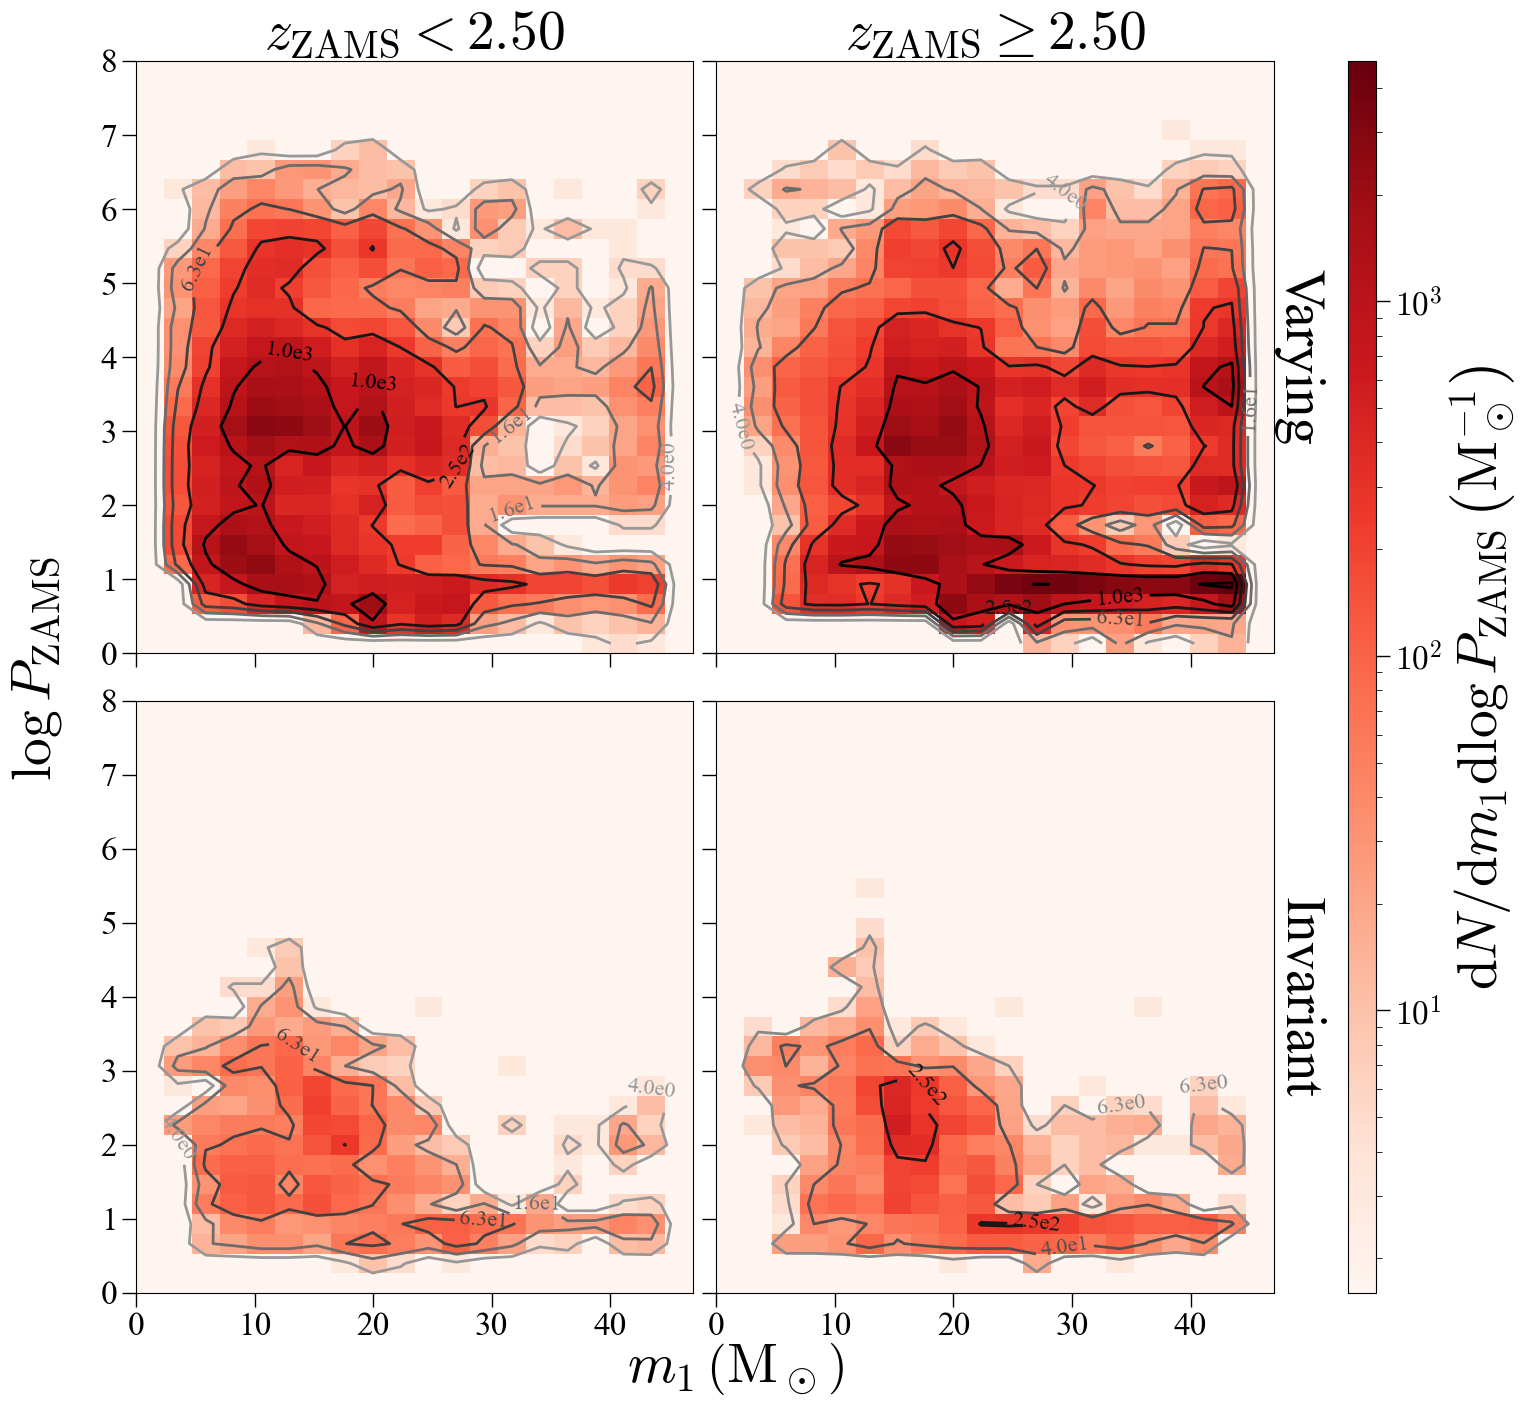

In [53]:
### FREQUENCY 2D HISTOGRAM + CONTOURS PLOT ###
### One merger class, two models, two redshift ranges, one x ###


## SETTINGS ##

# DATA #
df0 = igimf_bhbh_df
df1 = canon_bhbh_df
z_threshold = 2.5
log_freqs = True

# COLUMNS #
x = 'mco1'
y = 'logp_zams'

x_nbins = 20
x_binmax = 47
x_binmin = 0

y_nbins = 30
y_binmax = 8
y_binmin = 0

# PLOT #
df0_label = 'Varying'
df1_label = 'Invariant'
x_label = '$m_1\\,\\left(\\mathrm{M}_\\odot\\right)$'
y_label = '$\\log P_\\mathrm{ZAMS}$'
cbar_label = '$\\mathrm{d}N/\\mathrm{d}m_1\\mathrm{d}\\log P_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$'

figsize = (16, 16)
subplots_wspace = 0.08
subplots_hspace = 0.08
hist_cmap = 'Reds'
contour_cmap = truncate_colormap(plt.get_cmap('binary'), minval=0.3, maxval=1.0)
base_fontsize = 40
n_contours0 = 5
n_contours1 = 3

## SETUP ##

# HISTOGRAMS #
xbins = np.linspace(x_binmin, x_binmax, x_nbins+1)
xcenters = np.array([(x0+x1)/2 for x0, x1 in zip(xbins[:-1], xbins[1:])])
ybins = np.linspace(y_binmin, y_binmax, y_nbins+1)
ycenters = np.array([(y0+y1)/2 for y0, y1 in zip(ybins[:-1], ybins[1:])])

temp_df = df0[df0.Redshift_ZAMS < z_threshold].copy()
hist0_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df0[df0.Redshift_ZAMS >= z_threshold].copy()
hist0_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS < z_threshold].copy()
hist1_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS >= z_threshold].copy()
hist1_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

del temp_df

# setting the baseline bg value
bg_min = np.concatenate((hist0_lowz, hist0_highz, hist1_lowz, hist1_highz)).min()
hist0_lowz[hist0_lowz == hist0_lowz.min()] = bg_min
hist0_highz[hist0_highz == hist0_highz.min()] = bg_min
hist1_lowz[hist1_lowz == hist1_lowz.min()] = bg_min
hist1_highz[hist1_highz == hist1_highz.min()] = bg_min

# Colorbar #
vmin0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmin0 = vmin0[np.isfinite(vmin0)].min()
vmin1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmin1 = vmin1[np.isfinite(vmin1)].min()
vmax0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmax0 = vmax0[np.isfinite(vmax0)].max()
vmax1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmax1 = vmax1[np.isfinite(vmax1)].max()
vmin = min(vmin0, vmin1)
vmax = max(vmax0, vmax1)


## PLOT ##

# SETUP #
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 0.05, 0.05])
gs.update(wspace=subplots_wspace, hspace=subplots_hspace)

ax0_lowz = plt.subplot(gs[0, 0])
ax0_highz = plt.subplot(gs[0, 1])
ax1_lowz = plt.subplot(gs[1, 0])
ax1_highz = plt.subplot(gs[1, 1])
axes = np.array([[ax0_lowz, ax0_highz], [ax1_lowz, ax1_highz]])

# HISTOGRAMS #
hist_args = (xbins, ybins)
hist_kwargs = {'cmap': hist_cmap, 'vmin': vmin, 'vmax': vmax, 'rasterized': True}

ax0_lowz.pcolormesh(*hist_args, hist0_lowz, **hist_kwargs)
ax0_highz.pcolormesh(*hist_args, hist0_highz, **hist_kwargs)
ax1_lowz.pcolormesh(*hist_args, hist1_lowz, **hist_kwargs)
ax1_highz.pcolormesh(*hist_args, hist1_highz, **hist_kwargs)

# CONTOURS #
contour_args = (xcenters, ycenters)
contour0_kwargs = {'levels': n_contours0, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}
contour1_kwargs = {'levels': n_contours1, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}

c0_lowz = ax0_lowz.contour(*contour_args, hist0_lowz, **contour0_kwargs)
c0_highz = ax0_highz.contour(*contour_args, hist0_highz, **contour0_kwargs)
c1_lowz = ax1_lowz.contour(*contour_args, hist1_lowz, **contour1_kwargs)
c1_highz = ax1_highz.contour(*contour_args, hist1_highz, **contour1_kwargs)

def clabel_fmt(s): 
    ss = f'{10.**s:.1e}'.split('e')
    es = f'{ss[0]}e{int(ss[1])}'
    return es
clabel_kwargs = {'inline':True, 'fmt': clabel_fmt, 'fontsize': 0.4*base_fontsize}

ax0_lowz.clabel(c0_lowz, c0_lowz.levels, **clabel_kwargs)
ax0_highz.clabel(c0_highz, c0_highz.levels, **clabel_kwargs)
ax1_lowz.clabel(c1_lowz, c1_lowz.levels, **clabel_kwargs)
ax1_highz.clabel(c1_highz, c1_highz.levels, **clabel_kwargs)

# AXES #
fig.text(0.5, 0.08, x_label, ha='center', va='top', transform=fig.transFigure, fontsize=base_fontsize)
fig.text(0.08, 0.5, y_label, rotation=90, ha='right', va='center', transform=fig.transFigure, fontsize=base_fontsize)
ax0_lowz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}<{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_lowz.transAxes, fontsize=base_fontsize)
ax0_highz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}\\geq{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax0_highz.text(1, 0.5, df0_label, rotation=-90, ha='left', va='center', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax1_highz.text(1, 0.5, df1_label, rotation=-90, ha='left', va='center', transform=ax1_highz.transAxes, fontsize=base_fontsize)

for ax in axes[0,:]:
    ax.set_xticklabels([])
for ax in axes[:,1]:
    ax.set_yticklabels([])

# COLORBAR #
cbar_ax = plt.subplot(gs[:,-1])

sm = ScalarMappable(cmap=hist_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb = plt.colorbar(sm, cax=cbar_ax)

major_ytick_locs = np.arange(np.floor(vmin), np.ceil(vmax)+1, 1)
minor_ytick_locs = np.log10(np.outer(np.arange(1, 10, 1), 10.**major_ytick_locs).flatten())
cbar_ax.set_yticks(major_ytick_locs, minor=False)
cbar_ax.set_yticks(minor_ytick_locs, minor=True)
cbar_ax.set_yticklabels([f'$10^{{{loc:.0f}}}$' for loc in major_ytick_locs], minor=False)
cbar_ax.set_yticklabels([], minor=True)
cbar_ax.tick_params(which='minor', length=4)
cbar_ax.set_ylim(vmin, vmax)
cbar_ax.set_ylabel(cbar_label, fontsize=base_fontsize)


plt.savefig(FIGURE_FOLDER/'bhbh_contours_mco1_pzams.pdf', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'bhbh_contours_mco1_pzams.png', bbox_inches='tight')

Text(0, 0.5, '$\\mathrm{d}N/\\mathrm{d}m_1\\mathrm{d}\\log P_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$')

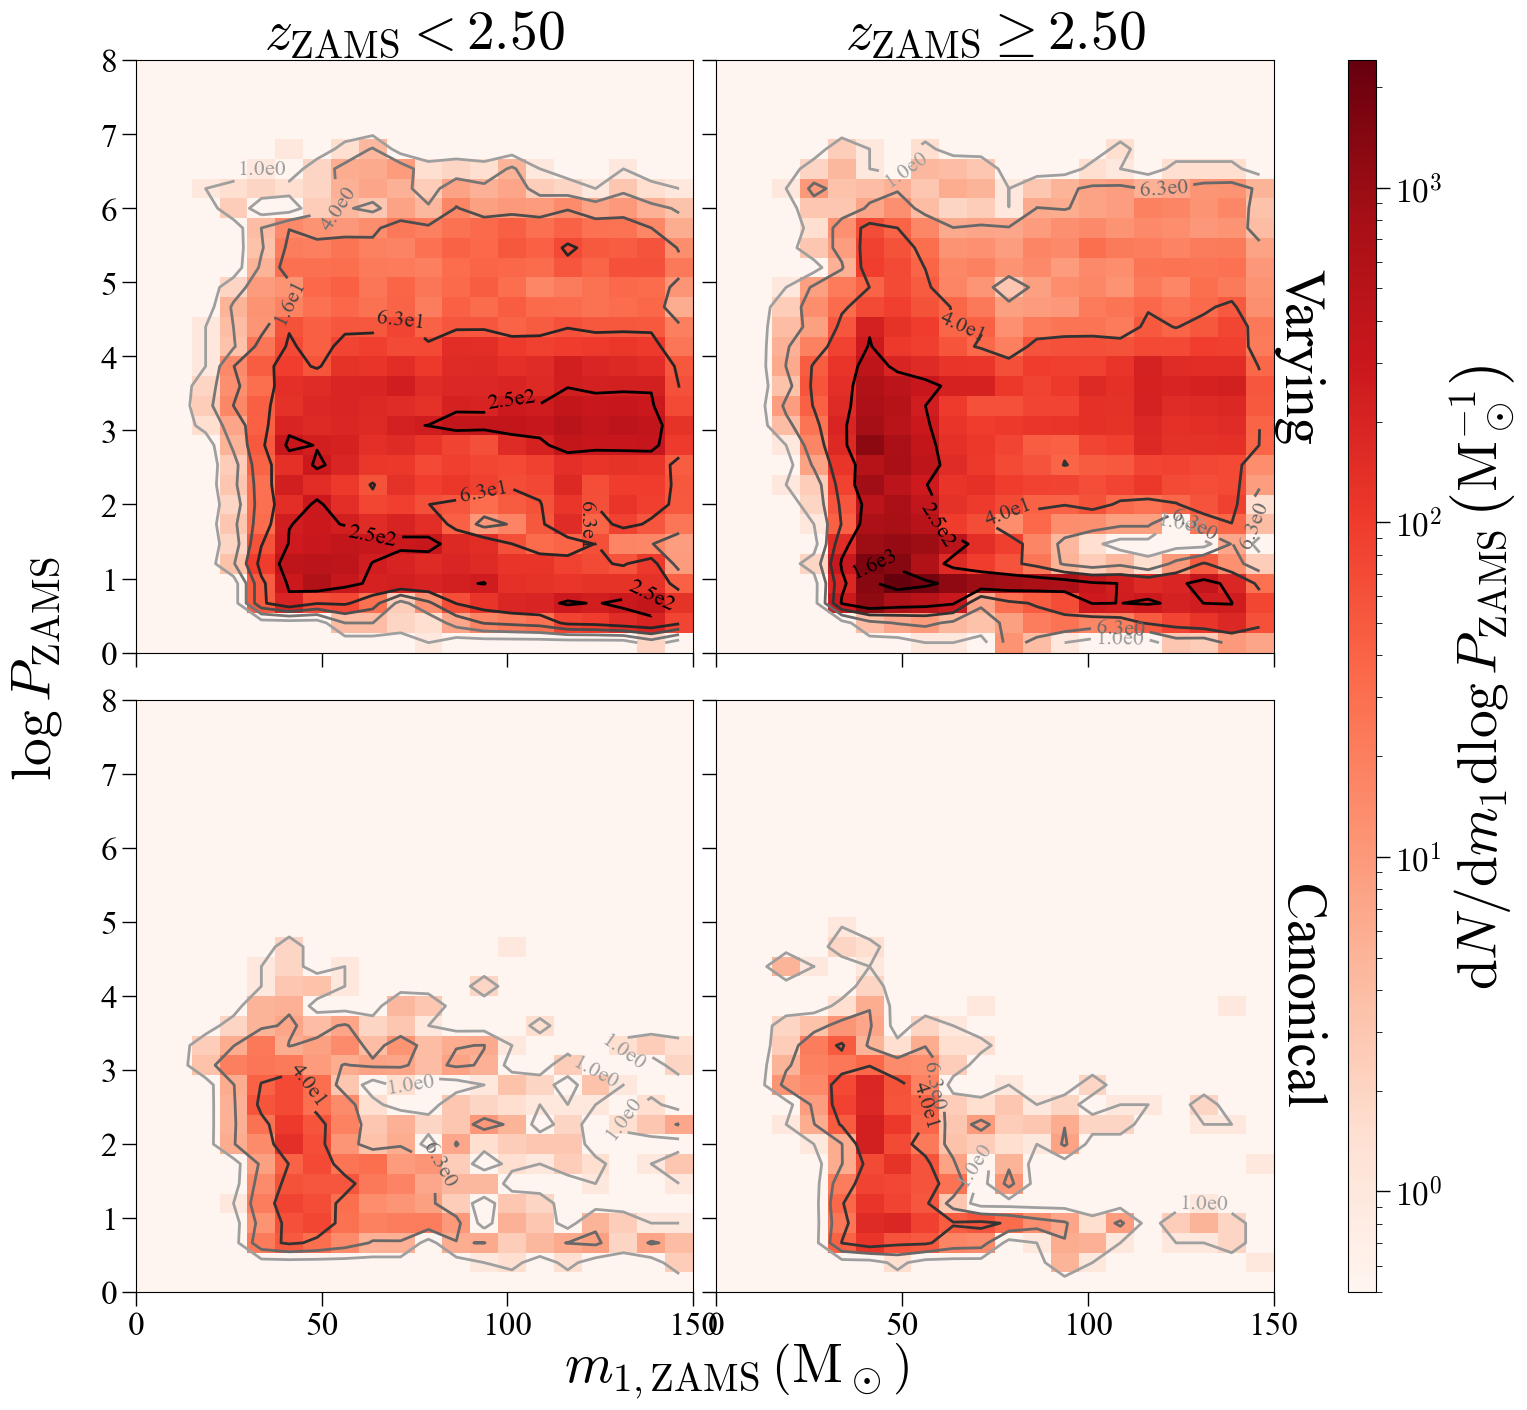

In [54]:
### FREQUENCY 2D HISTOGRAM + CONTOURS PLOT ###
### One merger class, two models, two redshift ranges, one x ###


## SETTINGS ##

# DATA #
df0 = igimf_bhbh_df
df1 = canon_bhbh_df
z_threshold = 2.5
log_freqs = True

# COLUMNS #
x = 'mzams1'
y = 'logp_zams'

x_nbins = 20
x_binmax = 150
x_binmin = 0

y_nbins = 30
y_binmax = 8
y_binmin = 0

# PLOT #
df0_label = 'Varying'
df1_label = 'Canonical'
x_label = '$m_{1,\\mathrm{ZAMS}}\\,\\left(\\mathrm{M}_\\odot\\right)$'
y_label = '$\\log P_\\mathrm{ZAMS}$'
cbar_label = '$\\mathrm{d}N/\\mathrm{d}m_1\\mathrm{d}\\log P_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$'

figsize = (16, 16)
subplots_wspace = 0.08
subplots_hspace = 0.08
hist_cmap = 'Reds'
contour_cmap = truncate_colormap(plt.get_cmap('binary'), minval=0.3, maxval=1.0)
base_fontsize = 40
n_contours0 = 5
n_contours1 = 3

## SETUP ##

# HISTOGRAMS #
xbins = np.linspace(x_binmin, x_binmax, x_nbins+1)
xcenters = np.array([(x0+x1)/2 for x0, x1 in zip(xbins[:-1], xbins[1:])])
ybins = np.linspace(y_binmin, y_binmax, y_nbins+1)
ycenters = np.array([(y0+y1)/2 for y0, y1 in zip(ybins[:-1], ybins[1:])])

temp_df = df0[df0.Redshift_ZAMS < z_threshold].copy()
hist0_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df0[df0.Redshift_ZAMS >= z_threshold].copy()
hist0_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS < z_threshold].copy()
hist1_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS >= z_threshold].copy()
hist1_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

del temp_df

# setting the baseline bg value
bg_min = np.concatenate((hist0_lowz, hist0_highz, hist1_lowz, hist1_highz)).min()
hist0_lowz[hist0_lowz == hist0_lowz.min()] = bg_min
hist0_highz[hist0_highz == hist0_highz.min()] = bg_min
hist1_lowz[hist1_lowz == hist1_lowz.min()] = bg_min
hist1_highz[hist1_highz == hist1_highz.min()] = bg_min

# Colorbar #
vmin0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmin0 = vmin0[np.isfinite(vmin0)].min()
vmin1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmin1 = vmin1[np.isfinite(vmin1)].min()
vmax0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmax0 = vmax0[np.isfinite(vmax0)].max()
vmax1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmax1 = vmax1[np.isfinite(vmax1)].max()
vmin = min(vmin0, vmin1)
vmax = max(vmax0, vmax1)


## PLOT ##

# SETUP #
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 0.05, 0.05])
gs.update(wspace=subplots_wspace, hspace=subplots_hspace)

ax0_lowz = plt.subplot(gs[0, 0])
ax0_highz = plt.subplot(gs[0, 1])
ax1_lowz = plt.subplot(gs[1, 0])
ax1_highz = plt.subplot(gs[1, 1])
axes = np.array([[ax0_lowz, ax0_highz], [ax1_lowz, ax1_highz]])

# HISTOGRAMS #
hist_args = (xbins, ybins)
hist_kwargs = {'cmap': hist_cmap, 'vmin': vmin, 'vmax': vmax, 'rasterized': True}

ax0_lowz.pcolormesh(*hist_args, hist0_lowz, **hist_kwargs)
ax0_highz.pcolormesh(*hist_args, hist0_highz, **hist_kwargs)
ax1_lowz.pcolormesh(*hist_args, hist1_lowz, **hist_kwargs)
ax1_highz.pcolormesh(*hist_args, hist1_highz, **hist_kwargs)

# CONTOURS #
contour_args = (xcenters, ycenters)
contour0_kwargs = {'levels': n_contours0, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}
contour1_kwargs = {'levels': n_contours1, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}

c0_lowz = ax0_lowz.contour(*contour_args, hist0_lowz, **contour0_kwargs)
c0_highz = ax0_highz.contour(*contour_args, hist0_highz, **contour0_kwargs)
c1_lowz = ax1_lowz.contour(*contour_args, hist1_lowz, **contour1_kwargs)
c1_highz = ax1_highz.contour(*contour_args, hist1_highz, **contour1_kwargs)

def clabel_fmt(s): 
    ss = f'{10.**s:.1e}'.split('e')
    es = f'{ss[0]}e{int(ss[1])}'
    return es
clabel_kwargs = {'inline':True, 'fmt': clabel_fmt, 'fontsize': 0.4*base_fontsize}

ax0_lowz.clabel(c0_lowz, c0_lowz.levels, **clabel_kwargs)
ax0_highz.clabel(c0_highz, c0_highz.levels, **clabel_kwargs)
ax1_lowz.clabel(c1_lowz, c1_lowz.levels, **clabel_kwargs)
ax1_highz.clabel(c1_highz, c1_highz.levels, **clabel_kwargs)

# AXES #
fig.text(0.5, 0.08, x_label, ha='center', va='top', transform=fig.transFigure, fontsize=base_fontsize)
fig.text(0.08, 0.5, y_label, rotation=90, ha='right', va='center', transform=fig.transFigure, fontsize=base_fontsize)
ax0_lowz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}<{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_lowz.transAxes, fontsize=base_fontsize)
ax0_highz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}\\geq{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax0_highz.text(1, 0.5, df0_label, rotation=-90, ha='left', va='center', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax1_highz.text(1, 0.5, df1_label, rotation=-90, ha='left', va='center', transform=ax1_highz.transAxes, fontsize=base_fontsize)

for ax in axes[0,:]:
    ax.set_xticklabels([])
for ax in axes[:,1]:
    ax.set_yticklabels([])

# COLORBAR #
cbar_ax = plt.subplot(gs[:,-1])

sm = ScalarMappable(cmap=hist_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb = plt.colorbar(sm, cax=cbar_ax)

major_ytick_locs = np.arange(np.floor(vmin), np.ceil(vmax)+1, 1)
minor_ytick_locs = np.log10(np.outer(np.arange(1, 10, 1), 10.**major_ytick_locs).flatten())
cbar_ax.set_yticks(major_ytick_locs, minor=False)
cbar_ax.set_yticks(minor_ytick_locs, minor=True)
cbar_ax.set_yticklabels([f'$10^{{{loc:.0f}}}$' for loc in major_ytick_locs], minor=False)
cbar_ax.set_yticklabels([], minor=True)
cbar_ax.tick_params(which='minor', length=4)
cbar_ax.set_ylim(vmin, vmax)
cbar_ax.set_ylabel(cbar_label, fontsize=base_fontsize)


#plt.savefig(FIGURE_FOLDER/'bhbh_contours_mco1_pzams.pdf', bbox_inches='tight')
#plt.savefig(FIGURE_FOLDER/'bhbh_contours_mco1_pzams.png', bbox_inches='tight')

Text(0, 0.5, '$\\mathrm{d}N/\\mathrm{d}m_1\\mathrm{d}\\log P_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$')

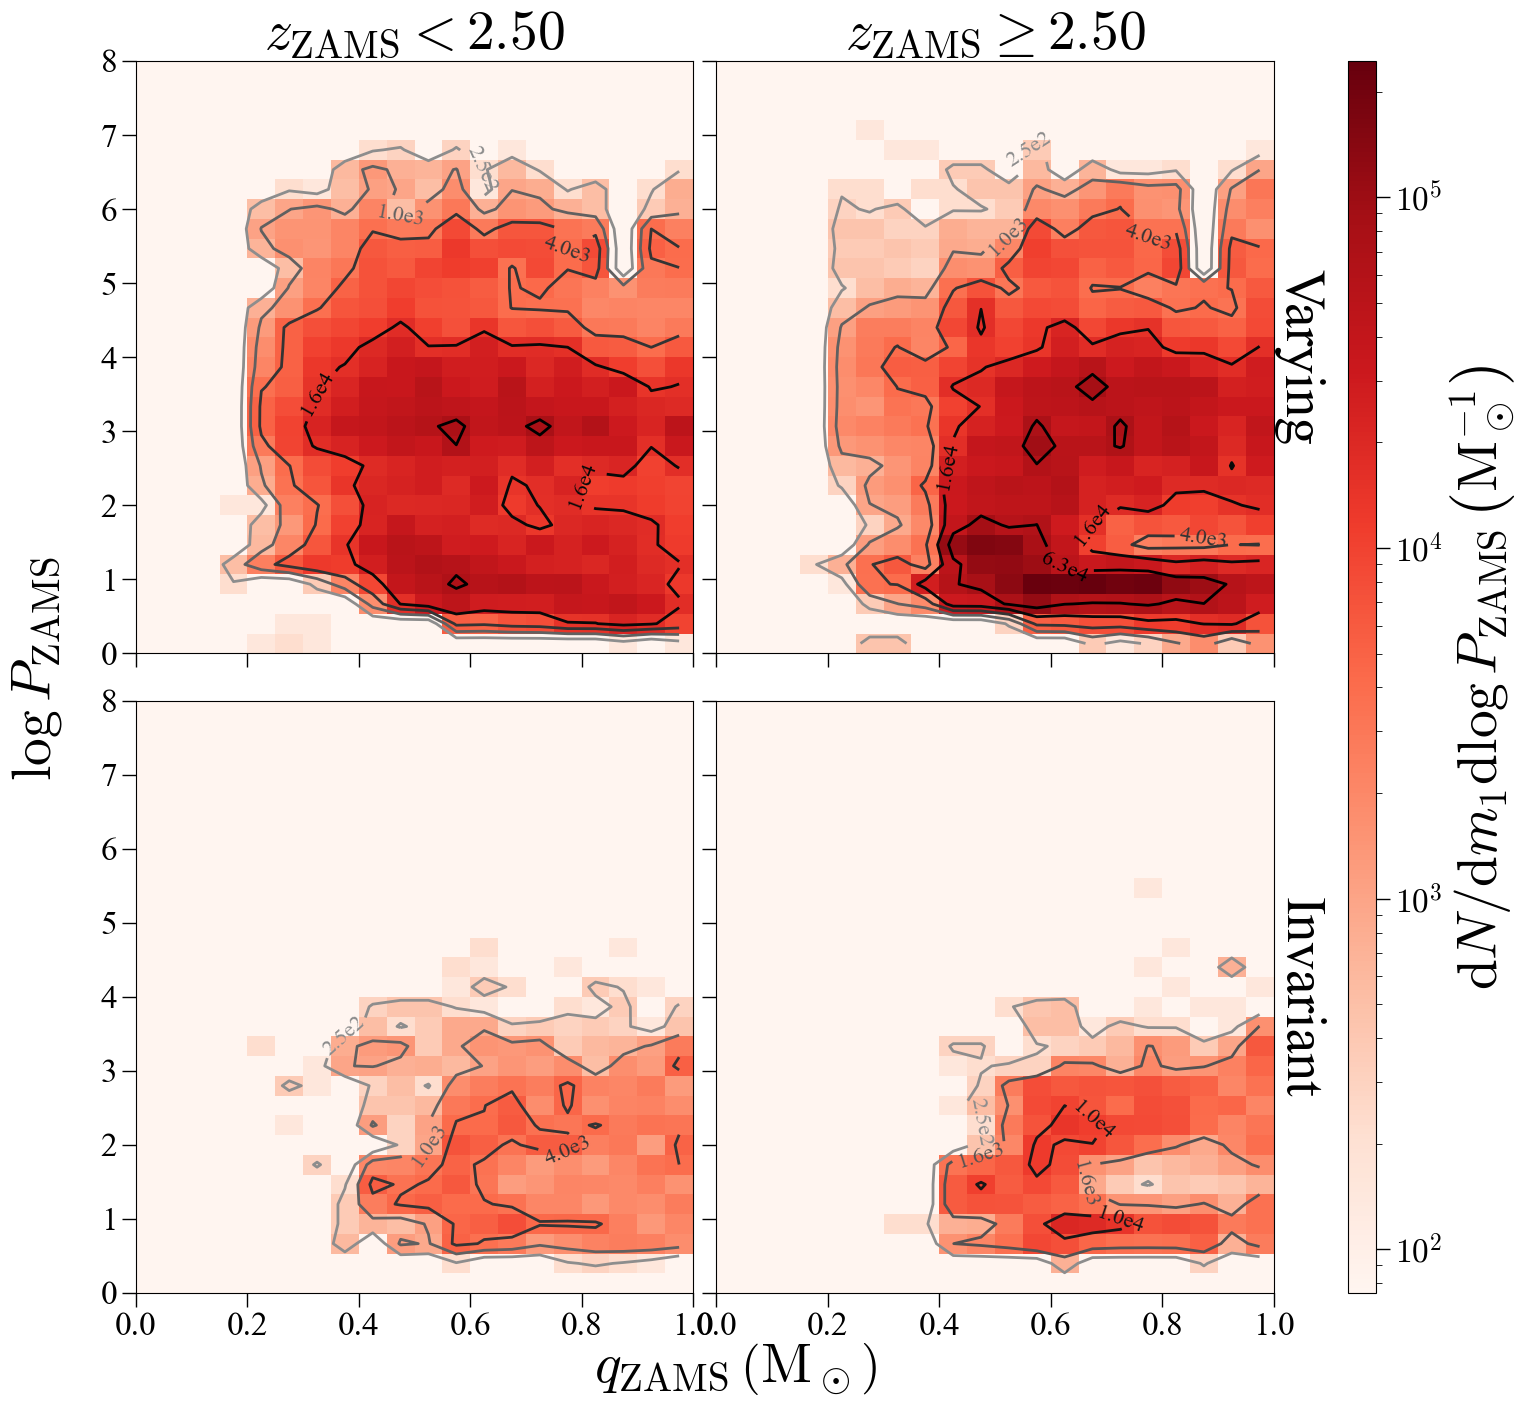

In [55]:
### FREQUENCY 2D HISTOGRAM + CONTOURS PLOT ###
### One merger class, two models, two redshift ranges, one x ###


## SETTINGS ##

# DATA #
df0 = igimf_bhbh_df
df1 = canon_bhbh_df
z_threshold = 2.5
log_freqs = True

# COLUMNS #
x = 'qzams'
y = 'logp_zams'

x_nbins = 20
x_binmax = 1
x_binmin = 0

y_nbins = 30
y_binmax = 8
y_binmin = 0

# PLOT #
df0_label = 'Varying'
df1_label = 'Invariant'
x_label = '$q_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot\\right)$'
y_label = '$\\log P_\\mathrm{ZAMS}$'
cbar_label = '$\\mathrm{d}N/\\mathrm{d}m_1\\mathrm{d}\\log P_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$'

figsize = (16, 16)
subplots_wspace = 0.08
subplots_hspace = 0.08
hist_cmap = 'Reds'
contour_cmap = truncate_colormap(plt.get_cmap('binary'), minval=0.3, maxval=1.0)
base_fontsize = 40
n_contours0 = 5
n_contours1 = 3

## SETUP ##

# HISTOGRAMS #
xbins = np.linspace(x_binmin, x_binmax, x_nbins+1)
xcenters = np.array([(x0+x1)/2 for x0, x1 in zip(xbins[:-1], xbins[1:])])
ybins = np.linspace(y_binmin, y_binmax, y_nbins+1)
ycenters = np.array([(y0+y1)/2 for y0, y1 in zip(ybins[:-1], ybins[1:])])

temp_df = df0[df0.Redshift_ZAMS < z_threshold].copy()
hist0_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df0[df0.Redshift_ZAMS >= z_threshold].copy()
hist0_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS < z_threshold].copy()
hist1_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS >= z_threshold].copy()
hist1_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

del temp_df

# setting the baseline bg value
bg_min = np.concatenate((hist0_lowz, hist0_highz, hist1_lowz, hist1_highz)).min()
hist0_lowz[hist0_lowz == hist0_lowz.min()] = bg_min
hist0_highz[hist0_highz == hist0_highz.min()] = bg_min
hist1_lowz[hist1_lowz == hist1_lowz.min()] = bg_min
hist1_highz[hist1_highz == hist1_highz.min()] = bg_min

# Colorbar #
vmin0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmin0 = vmin0[np.isfinite(vmin0)].min()
vmin1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmin1 = vmin1[np.isfinite(vmin1)].min()
vmax0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmax0 = vmax0[np.isfinite(vmax0)].max()
vmax1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmax1 = vmax1[np.isfinite(vmax1)].max()
vmin = min(vmin0, vmin1)
vmax = max(vmax0, vmax1)


## PLOT ##

# SETUP #
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 0.05, 0.05])
gs.update(wspace=subplots_wspace, hspace=subplots_hspace)

ax0_lowz = plt.subplot(gs[0, 0])
ax0_highz = plt.subplot(gs[0, 1])
ax1_lowz = plt.subplot(gs[1, 0])
ax1_highz = plt.subplot(gs[1, 1])
axes = np.array([[ax0_lowz, ax0_highz], [ax1_lowz, ax1_highz]])

# HISTOGRAMS #
hist_args = (xbins, ybins)
hist_kwargs = {'cmap': hist_cmap, 'vmin': vmin, 'vmax': vmax, 'rasterized': True}

ax0_lowz.pcolormesh(*hist_args, hist0_lowz, **hist_kwargs)
ax0_highz.pcolormesh(*hist_args, hist0_highz, **hist_kwargs)
ax1_lowz.pcolormesh(*hist_args, hist1_lowz, **hist_kwargs)
ax1_highz.pcolormesh(*hist_args, hist1_highz, **hist_kwargs)

# CONTOURS #
contour_args = (xcenters, ycenters)
contour0_kwargs = {'levels': n_contours0, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}
contour1_kwargs = {'levels': n_contours1, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}

c0_lowz = ax0_lowz.contour(*contour_args, hist0_lowz, **contour0_kwargs)
c0_highz = ax0_highz.contour(*contour_args, hist0_highz, **contour0_kwargs)
c1_lowz = ax1_lowz.contour(*contour_args, hist1_lowz, **contour1_kwargs)
c1_highz = ax1_highz.contour(*contour_args, hist1_highz, **contour1_kwargs)

def clabel_fmt(s): 
    ss = f'{10.**s:.1e}'.split('e')
    es = f'{ss[0]}e{int(ss[1])}'
    return es
clabel_kwargs = {'inline':True, 'fmt': clabel_fmt, 'fontsize': 0.4*base_fontsize}

ax0_lowz.clabel(c0_lowz, c0_lowz.levels, **clabel_kwargs)
ax0_highz.clabel(c0_highz, c0_highz.levels, **clabel_kwargs)
ax1_lowz.clabel(c1_lowz, c1_lowz.levels, **clabel_kwargs)
ax1_highz.clabel(c1_highz, c1_highz.levels, **clabel_kwargs)

# AXES #
fig.text(0.5, 0.08, x_label, ha='center', va='top', transform=fig.transFigure, fontsize=base_fontsize)
fig.text(0.08, 0.5, y_label, rotation=90, ha='right', va='center', transform=fig.transFigure, fontsize=base_fontsize)
ax0_lowz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}<{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_lowz.transAxes, fontsize=base_fontsize)
ax0_highz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}\\geq{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax0_highz.text(1, 0.5, df0_label, rotation=-90, ha='left', va='center', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax1_highz.text(1, 0.5, df1_label, rotation=-90, ha='left', va='center', transform=ax1_highz.transAxes, fontsize=base_fontsize)

for ax in axes[0,:]:
    ax.set_xticklabels([])
for ax in axes[:,1]:
    ax.set_yticklabels([])

# COLORBAR #
cbar_ax = plt.subplot(gs[:,-1])

sm = ScalarMappable(cmap=hist_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb = plt.colorbar(sm, cax=cbar_ax)

major_ytick_locs = np.arange(np.floor(vmin), np.ceil(vmax)+1, 1)
minor_ytick_locs = np.log10(np.outer(np.arange(1, 10, 1), 10.**major_ytick_locs).flatten())
cbar_ax.set_yticks(major_ytick_locs, minor=False)
cbar_ax.set_yticks(minor_ytick_locs, minor=True)
cbar_ax.set_yticklabels([f'$10^{{{loc:.0f}}}$' for loc in major_ytick_locs], minor=False)
cbar_ax.set_yticklabels([], minor=True)
cbar_ax.tick_params(which='minor', length=4)
cbar_ax.set_ylim(vmin, vmax)
cbar_ax.set_ylabel(cbar_label, fontsize=base_fontsize)


#plt.savefig(FIGURE_FOLDER/'bhbh_contours_mco1_pzams.pdf', bbox_inches='tight')
#plt.savefig(FIGURE_FOLDER/'bhbh_contours_mco1_pzams.png', bbox_inches='tight')

Text(0, 0.5, '$\\mathrm{d}N/\\mathrm{d}m_1\\mathrm{d}\\log P_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$')

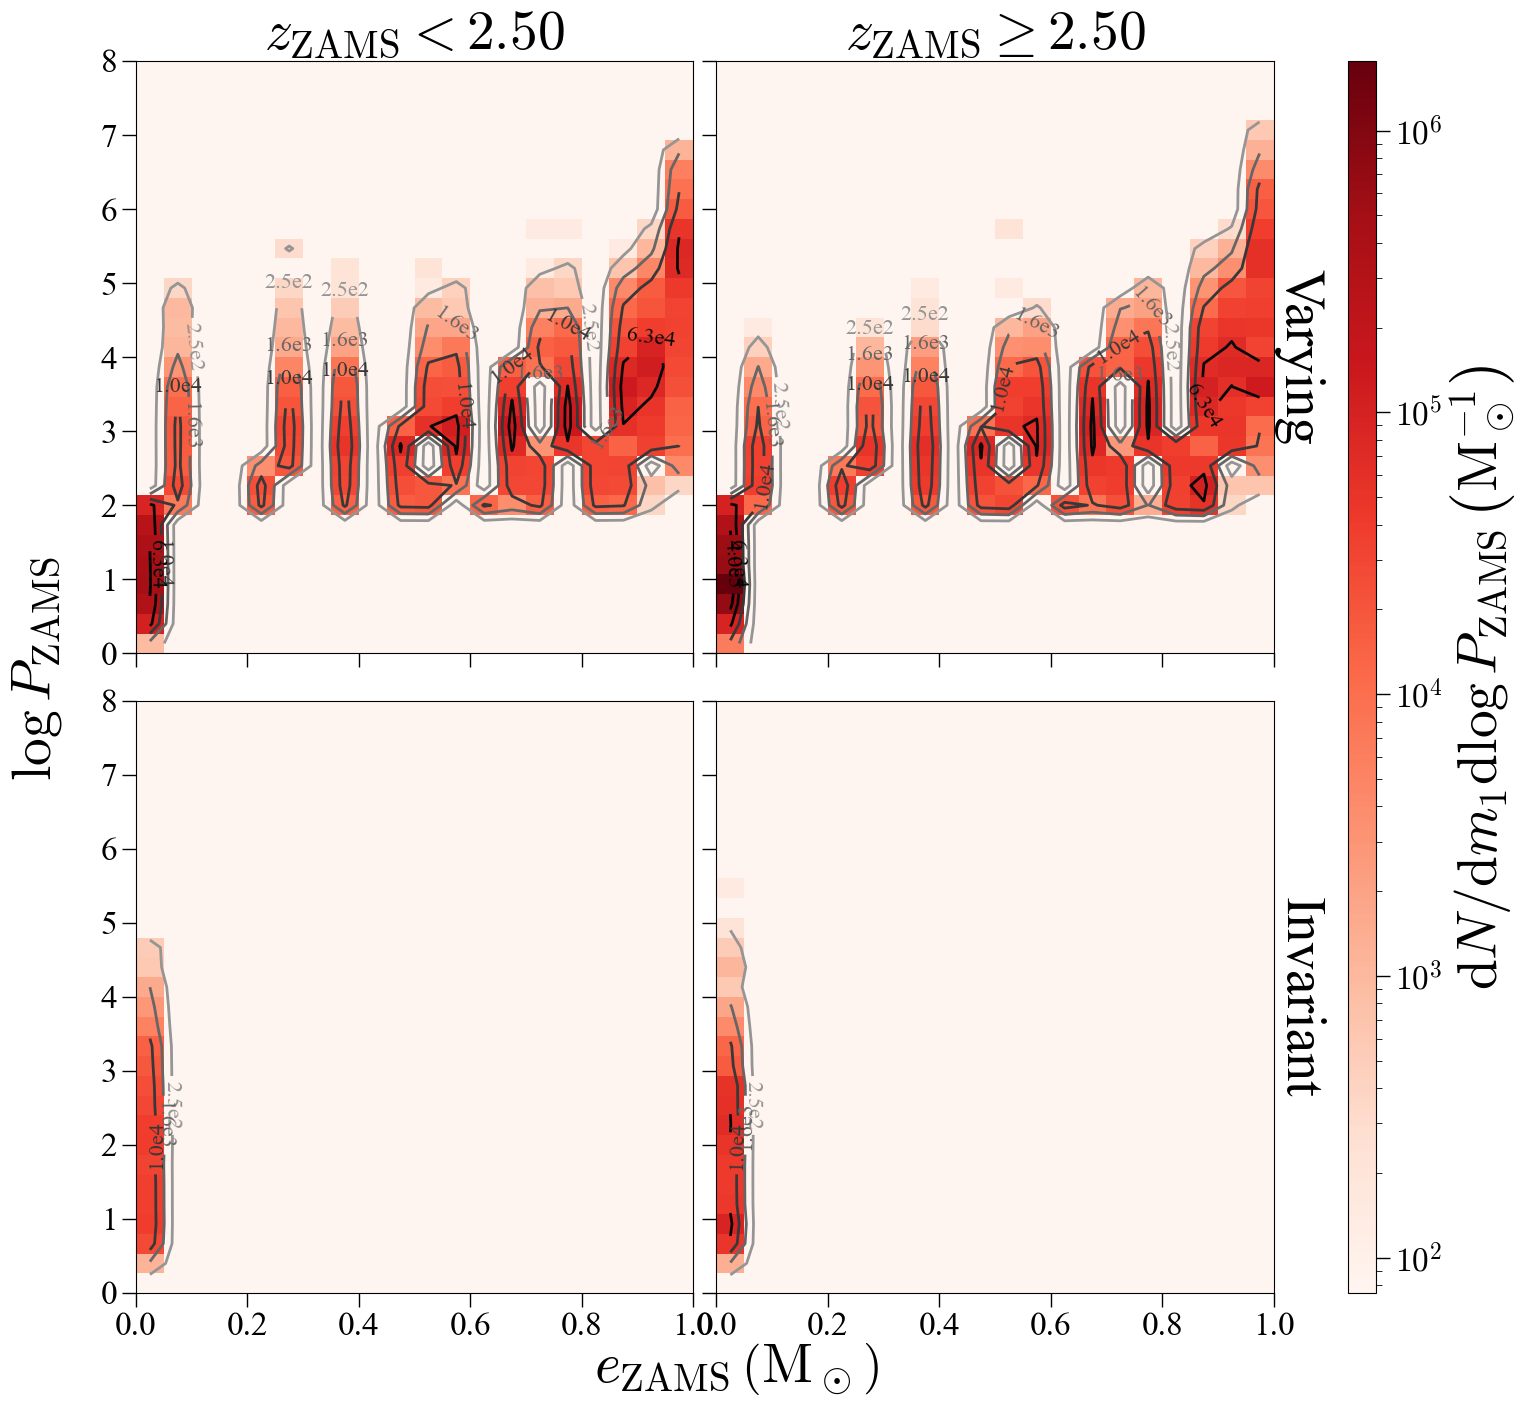

In [57]:
### FREQUENCY 2D HISTOGRAM + CONTOURS PLOT ###
### One merger class, two models, two redshift ranges, one x ###


## SETTINGS ##

# DATA #
df0 = igimf_bhbh_df
df1 = canon_bhbh_df
z_threshold = 2.5
log_freqs = True

# COLUMNS #
x = 'e_zams'
y = 'logp_zams'

x_nbins = 20
x_binmax = 1
x_binmin = 0

y_nbins = 30
y_binmax = 8
y_binmin = 0

# PLOT #
df0_label = 'Varying'
df1_label = 'Invariant'
x_label = '$e_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot\\right)$'
y_label = '$\\log P_\\mathrm{ZAMS}$'
cbar_label = '$\\mathrm{d}N/\\mathrm{d}m_1\\mathrm{d}\\log P_\\mathrm{ZAMS}\\,\\left(\\mathrm{M}_\\odot^{-1}\\right)$'

figsize = (16, 16)
subplots_wspace = 0.08
subplots_hspace = 0.08
hist_cmap = 'Reds'
contour_cmap = truncate_colormap(plt.get_cmap('binary'), minval=0.3, maxval=1.0)
base_fontsize = 40
n_contours0 = 5
n_contours1 = 3

## SETUP ##

# HISTOGRAMS #
xbins = np.linspace(x_binmin, x_binmax, x_nbins+1)
xcenters = np.array([(x0+x1)/2 for x0, x1 in zip(xbins[:-1], xbins[1:])])
ybins = np.linspace(y_binmin, y_binmax, y_nbins+1)
ycenters = np.array([(y0+y1)/2 for y0, y1 in zip(ybins[:-1], ybins[1:])])

temp_df = df0[df0.Redshift_ZAMS < z_threshold].copy()
hist0_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df0[df0.Redshift_ZAMS >= z_threshold].copy()
hist0_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS < z_threshold].copy()
hist1_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS >= z_threshold].copy()
hist1_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

del temp_df

# setting the baseline bg value
bg_min = np.concatenate((hist0_lowz, hist0_highz, hist1_lowz, hist1_highz)).min()
hist0_lowz[hist0_lowz == hist0_lowz.min()] = bg_min
hist0_highz[hist0_highz == hist0_highz.min()] = bg_min
hist1_lowz[hist1_lowz == hist1_lowz.min()] = bg_min
hist1_highz[hist1_highz == hist1_highz.min()] = bg_min

# Colorbar #
vmin0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmin0 = vmin0[np.isfinite(vmin0)].min()
vmin1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmin1 = vmin1[np.isfinite(vmin1)].min()
vmax0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmax0 = vmax0[np.isfinite(vmax0)].max()
vmax1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmax1 = vmax1[np.isfinite(vmax1)].max()
vmin = min(vmin0, vmin1)
vmax = max(vmax0, vmax1)


## PLOT ##

# SETUP #
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 0.05, 0.05])
gs.update(wspace=subplots_wspace, hspace=subplots_hspace)

ax0_lowz = plt.subplot(gs[0, 0])
ax0_highz = plt.subplot(gs[0, 1])
ax1_lowz = plt.subplot(gs[1, 0])
ax1_highz = plt.subplot(gs[1, 1])
axes = np.array([[ax0_lowz, ax0_highz], [ax1_lowz, ax1_highz]])

# HISTOGRAMS #
hist_args = (xbins, ybins)
hist_kwargs = {'cmap': hist_cmap, 'vmin': vmin, 'vmax': vmax, 'rasterized': True}

ax0_lowz.pcolormesh(*hist_args, hist0_lowz, **hist_kwargs)
ax0_highz.pcolormesh(*hist_args, hist0_highz, **hist_kwargs)
ax1_lowz.pcolormesh(*hist_args, hist1_lowz, **hist_kwargs)
ax1_highz.pcolormesh(*hist_args, hist1_highz, **hist_kwargs)

# CONTOURS #
contour_args = (xcenters, ycenters)
contour0_kwargs = {'levels': n_contours0, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}
contour1_kwargs = {'levels': n_contours1, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}

c0_lowz = ax0_lowz.contour(*contour_args, hist0_lowz, **contour0_kwargs)
c0_highz = ax0_highz.contour(*contour_args, hist0_highz, **contour0_kwargs)
c1_lowz = ax1_lowz.contour(*contour_args, hist1_lowz, **contour1_kwargs)
c1_highz = ax1_highz.contour(*contour_args, hist1_highz, **contour1_kwargs)

def clabel_fmt(s): 
    ss = f'{10.**s:.1e}'.split('e')
    es = f'{ss[0]}e{int(ss[1])}'
    return es
clabel_kwargs = {'inline':True, 'fmt': clabel_fmt, 'fontsize': 0.4*base_fontsize}

ax0_lowz.clabel(c0_lowz, c0_lowz.levels, **clabel_kwargs)
ax0_highz.clabel(c0_highz, c0_highz.levels, **clabel_kwargs)
ax1_lowz.clabel(c1_lowz, c1_lowz.levels, **clabel_kwargs)
ax1_highz.clabel(c1_highz, c1_highz.levels, **clabel_kwargs)

# AXES #
fig.text(0.5, 0.08, x_label, ha='center', va='top', transform=fig.transFigure, fontsize=base_fontsize)
fig.text(0.08, 0.5, y_label, rotation=90, ha='right', va='center', transform=fig.transFigure, fontsize=base_fontsize)
ax0_lowz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}<{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_lowz.transAxes, fontsize=base_fontsize)
ax0_highz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}\\geq{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax0_highz.text(1, 0.5, df0_label, rotation=-90, ha='left', va='center', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax1_highz.text(1, 0.5, df1_label, rotation=-90, ha='left', va='center', transform=ax1_highz.transAxes, fontsize=base_fontsize)

for ax in axes[0,:]:
    ax.set_xticklabels([])
for ax in axes[:,1]:
    ax.set_yticklabels([])

# COLORBAR #
cbar_ax = plt.subplot(gs[:,-1])

sm = ScalarMappable(cmap=hist_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb = plt.colorbar(sm, cax=cbar_ax)

major_ytick_locs = np.arange(np.floor(vmin), np.ceil(vmax)+1, 1)
minor_ytick_locs = np.log10(np.outer(np.arange(1, 10, 1), 10.**major_ytick_locs).flatten())
cbar_ax.set_yticks(major_ytick_locs, minor=False)
cbar_ax.set_yticks(minor_ytick_locs, minor=True)
cbar_ax.set_yticklabels([f'$10^{{{loc:.0f}}}$' for loc in major_ytick_locs], minor=False)
cbar_ax.set_yticklabels([], minor=True)
cbar_ax.tick_params(which='minor', length=4)
cbar_ax.set_ylim(vmin, vmax)
cbar_ax.set_ylabel(cbar_label, fontsize=base_fontsize)


#plt.savefig(FIGURE_FOLDER/'bhbh_contours_mco1_pzams.pdf', bbox_inches='tight')
#plt.savefig(FIGURE_FOLDER/'bhbh_contours_mco1_pzams.png', bbox_inches='tight')

In [58]:
temp_df = igimf_bhbh_df[igimf_bhbh_df.logp_zams > 6]


In [59]:
temp_df.mco1.mean()

24.19659

In [60]:
temp_df.mco2.mean()

16.41664

In [61]:
temp_df.e_zams.mean()

0.9906009

In [62]:
temp_df.logp_zams.mean()

6.2655373

In [63]:
temp_df[temp_df.e_zams < 0.9].logp_zams

1224060    6.007812
1269283    6.515625
Name: logp_zams, dtype: float32

Figure 8 of the paper.

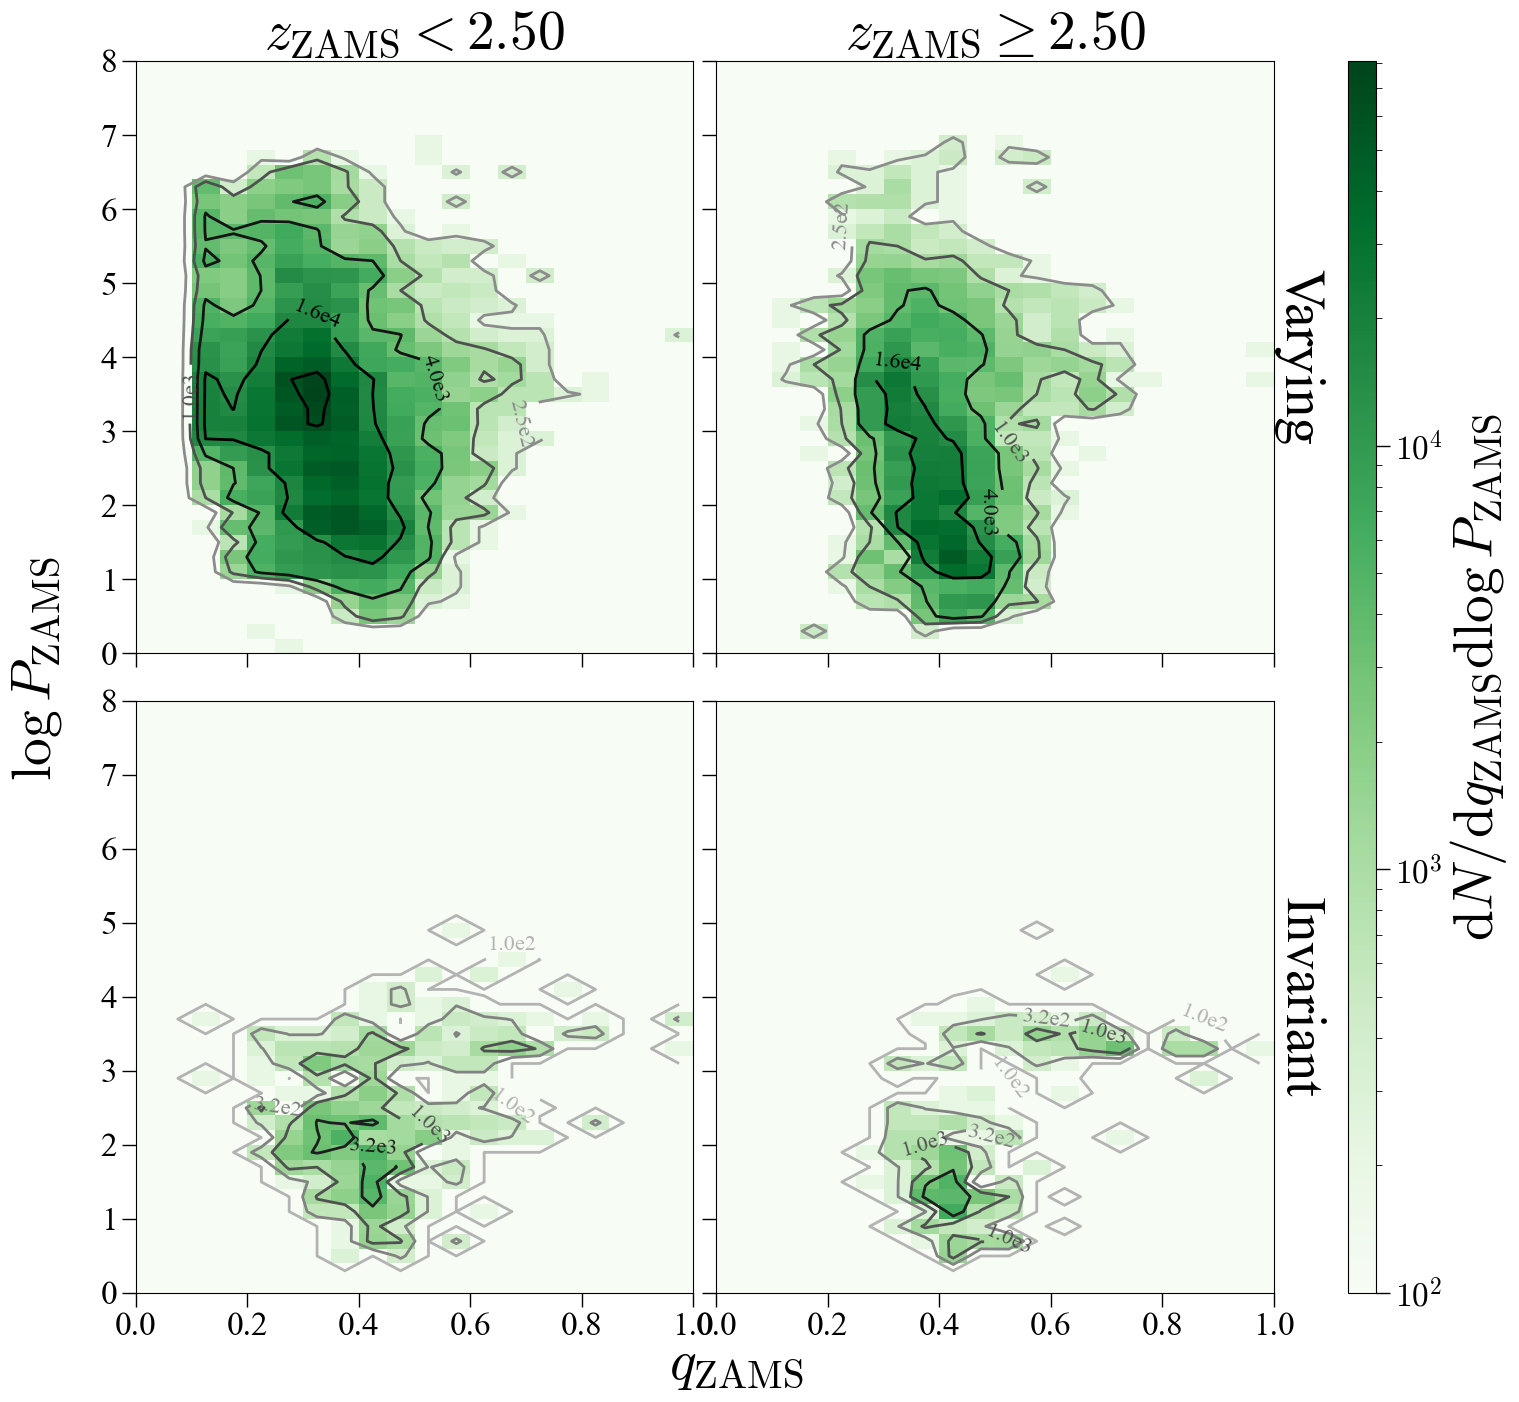

In [64]:
### FREQUENCY 2D HISTOGRAM + CONTOURS PLOT ###
### One merger class, two models, two redshift ranges, one x ###


## SETTINGS ##

# DATA #
df0 = igimf_bhns_df
df1 = canon_bhns_df
z_threshold = 2.5
log_freqs = True

# COLUMNS #
x = 'qzams'
y = 'logp_zams'

x_nbins = 20
x_binmax = 1
x_binmin = 0

y_nbins = 40
y_binmax = 8
y_binmin = 0

# PLOT #
df0_label = 'Varying'
df1_label = 'Invariant'
x_label = '$q_\\mathrm{ZAMS}$'
y_label = '$\\log P_\\mathrm{ZAMS}$'
cbar_label = '$\\mathrm{d}N/\\mathrm{d}q_\\mathrm{ZAMS}\\mathrm{d}\\log P_\\mathrm{ZAMS}$'

figsize = (16, 16)
subplots_wspace = 0.08
subplots_hspace = 0.08
hist_cmap = 'Greens'
contour_cmap = truncate_colormap(plt.get_cmap('binary'), minval=0.3, maxval=1.0)
base_fontsize = 40
n_contours0 = 4
n_contours1 = 3

## SETUP ##

# HISTOGRAMS #
xbins = np.linspace(x_binmin, x_binmax, x_nbins+1)
xcenters = np.array([(x0+x1)/2 for x0, x1 in zip(xbins[:-1], xbins[1:])])
ybins = np.linspace(y_binmin, y_binmax, y_nbins+1)
ycenters = np.array([(y0+y1)/2 for y0, y1 in zip(ybins[:-1], ybins[1:])])

temp_df = df0[df0.Redshift_ZAMS < z_threshold].copy()
hist0_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df0[df0.Redshift_ZAMS >= z_threshold].copy()
hist0_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS < z_threshold].copy()
hist1_lowz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

temp_df = df1[df1.Redshift_ZAMS >= z_threshold].copy()
hist1_highz = frequency_2d_histplot(
    df=temp_df, 
    x=x, 
    y=y, 
    xbins=xbins, 
    ybins=ybins, 
    logscale=log_freqs
)

del temp_df

# setting the baseline bg value
bg_min = np.concatenate((hist0_lowz, hist0_highz, hist1_lowz, hist1_highz)).min()
hist0_lowz[hist0_lowz == hist0_lowz.min()] = bg_min
hist0_highz[hist0_highz == hist0_highz.min()] = bg_min
hist1_lowz[hist1_lowz == hist1_lowz.min()] = bg_min
hist1_highz[hist1_highz == hist1_highz.min()] = bg_min

# Colorbar #
vmin0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmin0 = vmin0[np.isfinite(vmin0)].min()
vmin1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmin1 = vmin1[np.isfinite(vmin1)].min()
vmax0 = np.concatenate((hist0_lowz, hist0_highz)).flatten()
vmax0 = vmax0[np.isfinite(vmax0)].max()
vmax1 = np.concatenate((hist1_lowz, hist1_highz)).flatten()
vmax1 = vmax1[np.isfinite(vmax1)].max()
vmin = min(vmin0, vmin1)
vmax = max(vmax0, vmax1)


## PLOT ##

# SETUP #
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 0.05, 0.05])
gs.update(wspace=subplots_wspace, hspace=subplots_hspace)

ax0_lowz = plt.subplot(gs[0, 0])
ax0_highz = plt.subplot(gs[0, 1])
ax1_lowz = plt.subplot(gs[1, 0])
ax1_highz = plt.subplot(gs[1, 1])
axes = np.array([[ax0_lowz, ax0_highz], [ax1_lowz, ax1_highz]])

# HISTOGRAMS #
hist_args = (xbins, ybins)
hist_kwargs = {'cmap': hist_cmap, 'vmin': vmin, 'vmax': vmax, 'rasterized': True}

ax0_lowz.pcolormesh(*hist_args, hist0_lowz, **hist_kwargs)
ax0_highz.pcolormesh(*hist_args, hist0_highz, **hist_kwargs)
ax1_lowz.pcolormesh(*hist_args, hist1_lowz, **hist_kwargs)
ax1_highz.pcolormesh(*hist_args, hist1_highz, **hist_kwargs)

# CONTOURS #
contour_args = (xcenters, ycenters)
contour0_kwargs = {'levels': n_contours0, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}
contour1_kwargs = {'levels': n_contours1, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}

c0_lowz = ax0_lowz.contour(*contour_args, hist0_lowz, **contour0_kwargs)
c0_highz = ax0_highz.contour(*contour_args, hist0_highz, **contour0_kwargs)
c1_lowz = ax1_lowz.contour(*contour_args, hist1_lowz, **contour1_kwargs)
c1_highz = ax1_highz.contour(*contour_args, hist1_highz, **contour1_kwargs)

def clabel_fmt(s): 
    ss = f'{10.**s:.1e}'.split('e')
    es = f'{ss[0]}e{int(ss[1])}'
    return es
clabel_kwargs = {'inline':True, 'fmt': clabel_fmt, 'fontsize': 0.4*base_fontsize}

ax0_lowz.clabel(c0_lowz, c0_lowz.levels, **clabel_kwargs)
ax0_highz.clabel(c0_highz, c0_highz.levels, **clabel_kwargs)
ax1_lowz.clabel(c1_lowz, c1_lowz.levels, **clabel_kwargs)
ax1_highz.clabel(c1_highz, c1_highz.levels, **clabel_kwargs)

# AXES #
fig.text(0.5, 0.08, x_label, ha='center', va='top', transform=fig.transFigure, fontsize=base_fontsize)
fig.text(0.08, 0.5, y_label, rotation=90, ha='right', va='center', transform=fig.transFigure, fontsize=base_fontsize)
ax0_lowz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}<{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_lowz.transAxes, fontsize=base_fontsize)
ax0_highz.text(0.5, 1, f'$z_\\mathrm{{ZAMS}}\\geq{z_threshold:.2f}$', ha='center', va='bottom', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax0_highz.text(1, 0.5, df0_label, rotation=-90, ha='left', va='center', transform=ax0_highz.transAxes, fontsize=base_fontsize)
ax1_highz.text(1, 0.5, df1_label, rotation=-90, ha='left', va='center', transform=ax1_highz.transAxes, fontsize=base_fontsize)

for ax in axes[0,:]:
    ax.set_xticklabels([])
for ax in axes[:,1]:
    ax.set_yticklabels([])

# COLORBAR #
cbar_ax = plt.subplot(gs[:,-1])

sm = ScalarMappable(cmap=hist_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb = plt.colorbar(sm, cax=cbar_ax)

major_ytick_locs = np.arange(np.floor(vmin), np.ceil(vmax)+1, 1)
minor_ytick_locs = np.log10(np.outer(np.arange(1, 10, 1), 10.**major_ytick_locs).flatten())
cbar_ax.set_yticks(major_ytick_locs, minor=False)
cbar_ax.set_yticks(minor_ytick_locs, minor=True)
cbar_ax.set_yticklabels([f'$10^{{{loc:.0f}}}$' for loc in major_ytick_locs], minor=False)
cbar_ax.set_yticklabels([], minor=True)
cbar_ax.tick_params(which='minor', length=4)
cbar_ax.set_ylim(vmin, vmax)
cbar_ax.set_ylabel(cbar_label, fontsize=base_fontsize)


plt.savefig(FIGURE_FOLDER/'bhns_contours_qzams_pzams.pdf', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'bhns_contours_qzams_pzams.png', bbox_inches='tight')

Figure 12 of the paper.

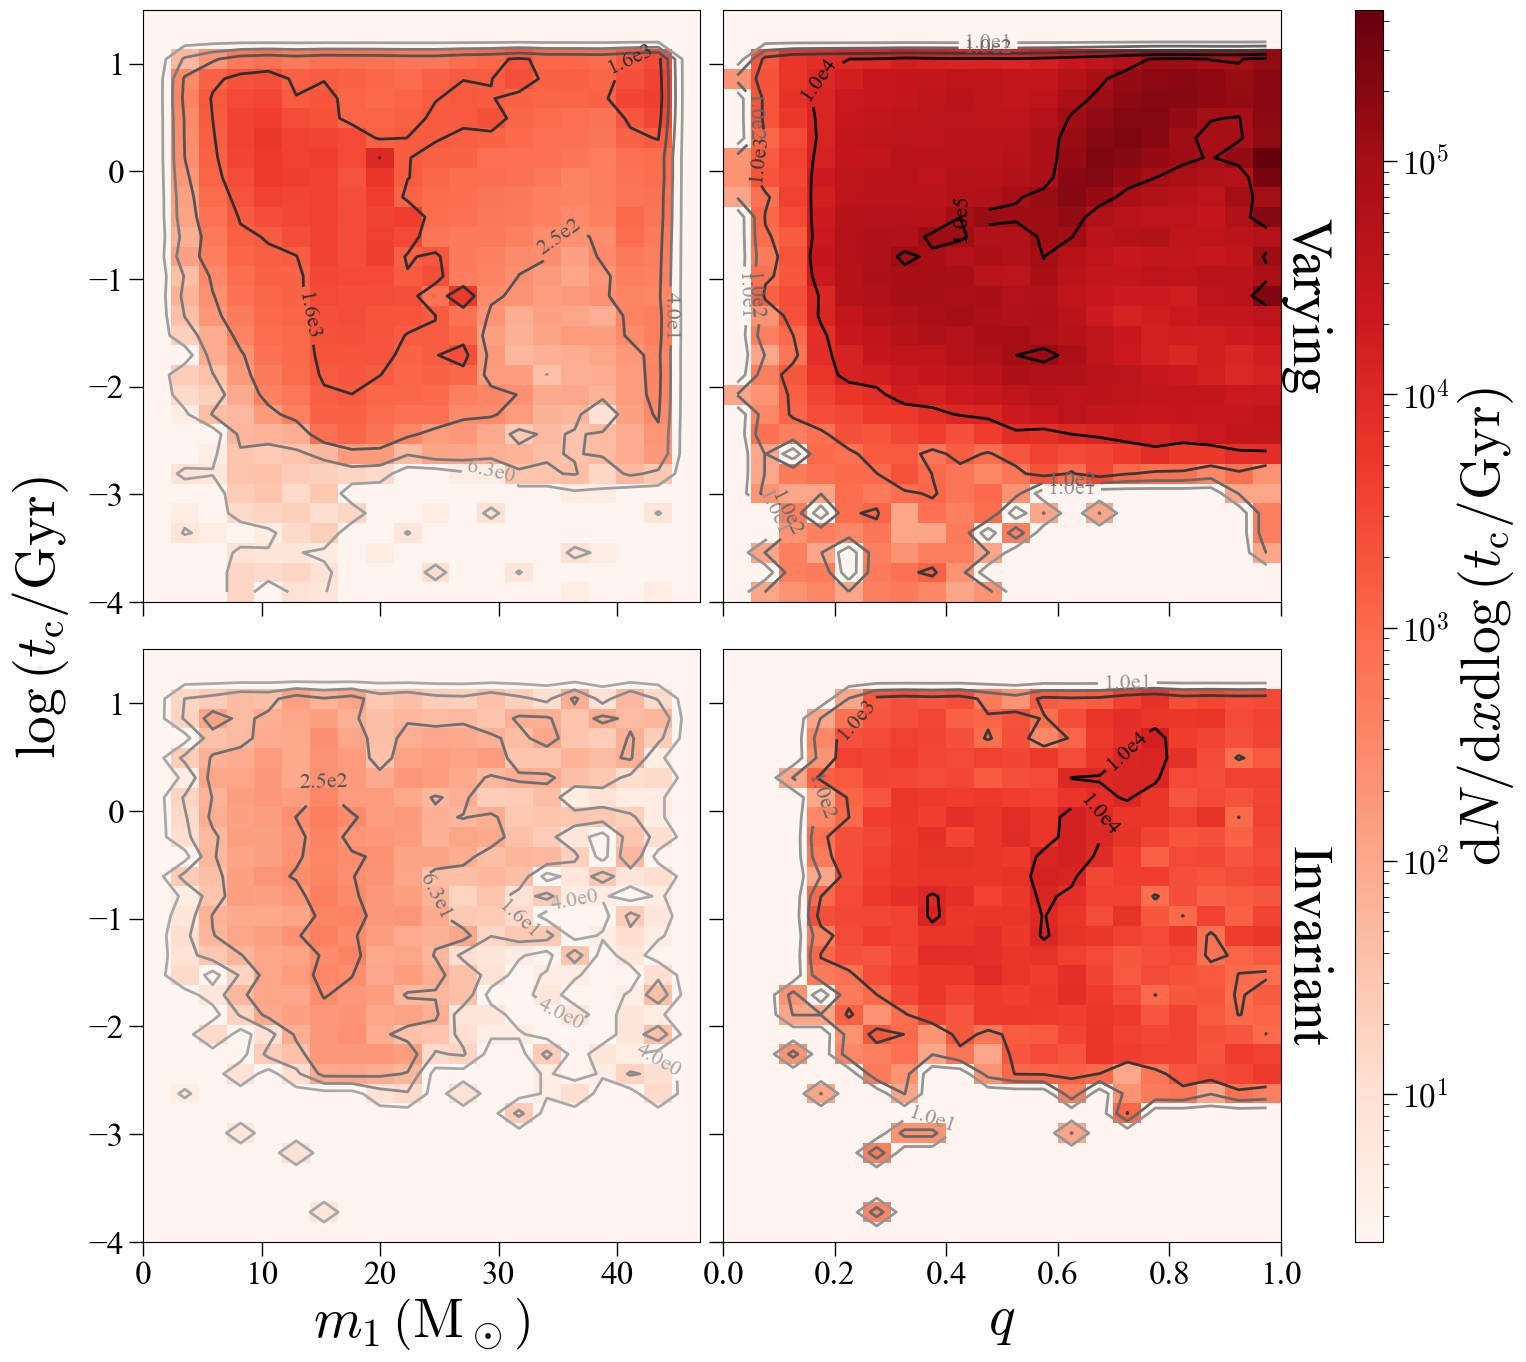

In [65]:
### FREQUENCY 2D HISTOGRAM + CONTOURS PLOT ###
### One merger class, two models,  two x ###


## SETTINGS ##

# DATA #
df0 = igimf_bhbh_df
df1 = canon_bhbh_df
log_freqs = True

# COLUMNS #
x0 = 'mco1'
x1 = 'q'
y = 'logtc'

x0_nbins = 20
x0_binmax = 47
x0_binmin = 0

x1_nbins = 20
x1_binmax = 1
x1_binmin = 0

y_nbins = 30
y_binmax = 1.5
y_binmin = -4

# PLOT #
df0_label = 'Varying'
df1_label = 'Invariant'
x0_label = '$m_1\\,\\left(\\mathrm{M}_\\odot\\right)$'
x1_label = '$q$'
y_label = '$\\log\\left(t_\\mathrm{c}/\\mathrm{Gyr}\\right)$'
cbar_label = '$\\mathrm{d}N/\\mathrm{d}x\\mathrm{d}\\log\\left(t_\\mathrm{c}/\\mathrm{Gyr}\\right)$'

figsize = (16, 16)
subplots_wspace = 0.08
subplots_hspace = 0.08
hist_cmap = 'Reds'
contour_cmap = truncate_colormap(plt.get_cmap('binary'), minval=0.3, maxval=1.0)
base_fontsize = 40
n_contours0 = 5
n_contours1 = 3

## SETUP ##

# HISTOGRAMS #
x0bins = np.linspace(x0_binmin, x0_binmax, x0_nbins+1)
x0centers = np.array([(x0+x1)/2 for x0, x1 in zip(x0bins[:-1], x0bins[1:])])
x1bins = np.linspace(x1_binmin, x1_binmax, x1_nbins+1)
x1centers = np.array([(x0+x1)/2 for x0, x1 in zip(x1bins[:-1], x1bins[1:])])
ybins = np.linspace(y_binmin, y_binmax, y_nbins+1)
ycenters = np.array([(y0+y1)/2 for y0, y1 in zip(ybins[:-1], ybins[1:])])

hist0_x0 = frequency_2d_histplot(
    df=df0, 
    x=x0, 
    y=y, 
    xbins=x0bins, 
    ybins=ybins, 
    logscale=log_freqs
)

hist0_x1 = frequency_2d_histplot(
    df=df0, 
    x=x1, 
    y=y, 
    xbins=x1bins, 
    ybins=ybins, 
    logscale=log_freqs
)

hist1_x0 = frequency_2d_histplot(
    df=df1, 
    x=x0, 
    y=y, 
    xbins=x0bins, 
    ybins=ybins, 
    logscale=log_freqs
)

hist1_x1 = frequency_2d_histplot(
    df=df1, 
    x=x1, 
    y=y, 
    xbins=x1bins, 
    ybins=ybins, 
    logscale=log_freqs
)

# setting the baseline bg value
bg_min = np.concatenate((hist0_x0, hist0_x1, hist1_x0, hist1_x1)).min()
hist0_x0[hist0_x0 == hist0_x0.min()] = bg_min
hist0_x1[hist0_x1 == hist0_x1.min()] = bg_min
hist1_x0[hist1_x0 == hist1_x0.min()] = bg_min
hist1_x1[hist1_x1 == hist1_x1.min()] = bg_min

# COLORBAR #
vmin0 = np.concatenate((hist0_x0, hist0_x1)).flatten()
vmin0 = vmin0[np.isfinite(vmin0)].min()
vmin1 = np.concatenate((hist1_x0, hist1_x1)).flatten()
vmin1 = vmin1[np.isfinite(vmin1)].min()
vmax0 = np.concatenate((hist0_x0, hist0_x1)).flatten()
vmax0 = vmax0[np.isfinite(vmax0)].max()
vmax1 = np.concatenate((hist1_x0, hist1_x1)).flatten()
vmax1 = vmax1[np.isfinite(vmax1)].max()
vmin = min(vmin0, vmin1)
vmax = max(vmax0, vmax1)


## PLOT ##

# SETUP #
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 0.05, 0.05])
gs.update(wspace=subplots_wspace, hspace=subplots_hspace)

ax0_x0 = plt.subplot(gs[0, 0])
ax0_x1 = plt.subplot(gs[0, 1])
ax1_x0 = plt.subplot(gs[1, 0])
ax1_x1 = plt.subplot(gs[1, 1])
axes = np.array([[ax0_x0, ax0_x1], [ax1_x0, ax1_x1]])


# HISTOGRAMS #
hist0_args = (x0bins, ybins)
hist1_args = (x1bins, ybins)
hist_kwargs = {'cmap': hist_cmap, 'vmin': vmin, 'vmax': vmax, 'rasterized': True}

ax0_x0.pcolormesh(*hist0_args, hist0_x0, **hist_kwargs)
ax0_x1.pcolormesh(*hist1_args, hist0_x1, **hist_kwargs)
ax1_x0.pcolormesh(*hist0_args, hist1_x0, **hist_kwargs)
ax1_x1.pcolormesh(*hist1_args, hist1_x1, **hist_kwargs)

# CONTOURS #
contour0_args = (x0centers, ycenters)
contour1_args = (x1centers, ycenters)
contour0_kwargs = {'levels': n_contours0, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}
contour1_kwargs = {'levels': n_contours1, 'cmap': contour_cmap, 'vmin': vmin0, 'vmax': vmax1, 'antialiased': True}

c0_x0 = ax0_x0.contour(*contour0_args, hist0_x0, **contour0_kwargs)
c0_x1 = ax0_x1.contour(*contour1_args, hist0_x1, **contour0_kwargs)
c1_x0 = ax1_x0.contour(*contour0_args, hist1_x0, **contour1_kwargs)
c1_x1 = ax1_x1.contour(*contour1_args, hist1_x1, **contour1_kwargs)

def clabel_fmt(s): 
    ss = f'{10.**s:.1e}'.split('e')
    es = f'{ss[0]}e{int(ss[1])}'
    return es
clabel_kwargs = {'inline':True, 'fmt': clabel_fmt, 'fontsize': 0.4*base_fontsize}

ax0_x0.clabel(c0_x0, c0_x0.levels, **clabel_kwargs)
ax0_x1.clabel(c0_x1, c0_x1.levels, **clabel_kwargs)
ax1_x0.clabel(c1_x0, c1_x0.levels, **clabel_kwargs)
ax1_x1.clabel(c1_x1, c1_x1.levels, **clabel_kwargs)

# AXES #
fig.text(0.08, 0.5, y_label, rotation=90, ha='right', va='center', transform=fig.transFigure, fontsize=base_fontsize)
ax1_x0.set_xlabel(x0_label, fontsize=base_fontsize)
ax1_x1.set_xlabel(x1_label, fontsize=base_fontsize)
ax0_x1.text(1, 0.5, df0_label, rotation=-90, ha='left', va='center', transform=ax0_x1.transAxes, fontsize=base_fontsize)
ax1_x1.text(1, 0.5, df1_label, rotation=-90, ha='left', va='center', transform=ax1_x1.transAxes, fontsize=base_fontsize)

for ax in axes[0,:]:
    ax.set_xticklabels([])
for ax in axes[:,1]:
    ax.set_yticklabels([])

# COLORBAR #
cbar_ax = plt.subplot(gs[:,-1])

sm = ScalarMappable(cmap=hist_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb = plt.colorbar(sm, cax=cbar_ax)

major_ytick_locs = np.arange(np.floor(vmin), np.ceil(vmax)+1, 1)
minor_ytick_locs = np.log10(np.outer(np.arange(1, 10, 1), 10.**major_ytick_locs).flatten())
cbar_ax.set_yticks(major_ytick_locs, minor=False)
cbar_ax.set_yticks(minor_ytick_locs, minor=True)
cbar_ax.set_yticklabels([f'$10^{{{loc:.0f}}}$' for loc in major_ytick_locs], minor=False)
cbar_ax.set_yticklabels([], minor=True)
cbar_ax.tick_params(which='minor', length=4)
cbar_ax.set_ylim(vmin, vmax)
cbar_ax.set_ylabel(cbar_label, fontsize=base_fontsize)


plt.savefig(FIGURE_FOLDER/'bhbh_contours_q_mco1_tc.pdf', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'bhbh_contours_q_mco1_tc.png', bbox_inches='tight')